In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
# Test availability of GPU
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [3]:
# Import Google Drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
#Checking Contents of Google Drive
!ls "/content/gdrive/My Drive/Springboard Projects/Capstone_Three"

Capstone_Three_Modelling_1	  Experiments.csv   group_2  group_5  models
Capstone_Three_Modelling_2	  extracted_images  group_3  group_6
Capstone_Three_Models_Assessment  group_1	    group_4  group_7


### **Data Generator Class**

In [5]:
class datagen:
    """This class generates the training, validation and test data
        given the path of the directory"""
    def __init__(self, path, validation_split, 
                 target_size=(45,45), 
                 color_mode='grayscale', 
                 batch_size=32, 
                 class_mode='categorical'):
        self.path=path
        self.validation_split=validation_split
        self.target_size=target_size
        self.color_mode=color_mode
        self.batch_size=batch_size 
        self.class_mode=class_mode
    

        from tensorflow.keras.preprocessing.image import ImageDataGenerator
        self.train_path = self.path + '/' + 'train'
        self.test_path = self.path + '/' + 'test'

        train_img_data_gen = ImageDataGenerator(validation_split=self.validation_split, rescale=1/255)
        self.train_data = train_img_data_gen.flow_from_directory(self.train_path, 
                                                    target_size=self.target_size,
                                                    color_mode=self.color_mode, 
                                                    batch_size=self.batch_size,  
                                                    class_mode=self.class_mode, 
                                                    subset='training')
        self.valid_data = train_img_data_gen.flow_from_directory(self.train_path, 
                                                    target_size=self.target_size,
                                                    color_mode=self.color_mode, 
                                                    batch_size=self.batch_size,  
                                                    class_mode=self.class_mode, 
                                                    subset='validation')
        test_img_data_gen = ImageDataGenerator(rescale=1/255)
        self.test_data = test_img_data_gen.flow_from_directory(self.test_path, 
                                                  target_size=self.target_size,
                                                    color_mode=self.color_mode, 
                                                    batch_size=self.batch_size,  
                                                    class_mode=self.class_mode)

### **Save and Plot Models**

In [6]:
class save_plot_model:
    """This class saves the model in specified directory as well as plot the
        accuracy and loss plot of model training"""
    def __init__(self, model, model_num, training, group, path):
        self.model=model
        self.model_num=model_num
        self.training=training
        self.group=group
        self.path=path
    def save_model(self):
        self.filename = self.path + '/' + self.model_num + '_' + self.group + '.hf5'
        self.model.save(self.filename)
    def plot_model_hist(self):
        import matplotlib.pyplot as plt
        plt.subplots(figsize=(10,5))
        plt.subplot(1,2,1)
        plt.plot(self.training.history['loss'])
        plt.plot(self.training.history['val_loss'])
        plt.title('Loss Plot for ' + self.model_num + '_' + self.group)
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.legend(['Train', 'Validation'], loc='upper left')
        plt.subplot(1,2,2)
        plt.plot(self.training.history['accuracy'])
        plt.plot(self.training.history['val_accuracy'])
        plt.title('Accuracy Plot for ' + self.model_num + '_' + self.group)
        plt.xlabel('Epochs')
        plt.ylabel('Accuracy')
        plt.legend(['Train', 'Validation'], loc='upper left')
        plt.show()

### **Creating Model**

In [7]:
class model_create:
    """This class creates the convolutional neural network based on the 
        dataframe defined for experiments"""
    def __init__(self, arch, model_num, experiment, input_shape, num_classes):
        self.arch = arch
        self.model_num = model_num
        self.experiment = experiment
        self.input_shape = input_shape
        self.num_classes = num_classes
    def model_generate(self):
        import tensorflow as tf
        if self.arch=='arch_1':
            df = self.experiment[(self.experiment['Model_Number']==self.model_num) & (self.experiment['Architecture']=='arch_1')]
            model = tf.keras.models.Sequential([
                tf.keras.layers.Conv2D(int(df.iloc[0]['Conv1']), kernel_size=int(df.iloc[0]['kernel1']), strides=int(df.iloc[0]['stride1']), 
                                       padding=df.iloc[0]['padding'], activation='relu', input_shape=input_shape),
                tf.keras.layers.MaxPool2D(int(df.iloc[0]['Maxpool'])), 
                tf.keras.layers.Flatten(), 
                tf.keras.layers.Dropout(0.25), 
                tf.keras.layers.Dense(int(df.iloc[0]['Dense1']), activation='relu'), 
                tf.keras.layers.Dense(self.num_classes, activation='softmax')
            ])
        if self.arch=='arch_2':
            df = self.experiment[(self.experiment['Model_Number']==self.model_num) & (self.experiment['Architecture']=='arch_2')]
            model = tf.keras.models.Sequential([
                tf.keras.layers.Conv2D(int(df.iloc[0]['Conv1']), kernel_size=int(df.iloc[0]['kernel1']), strides=int(df.iloc[0]['stride1']), 
                                       padding=df.iloc[0]['padding'], activation='relu', input_shape=input_shape),
                tf.keras.layers.MaxPool2D(int(df.iloc[0]['Maxpool'])), 
                tf.keras.layers.Conv2D(int(df.iloc[0]['Conv2']), kernel_size=int(df.iloc[0]['kernel2']), strides=int(df.iloc[0]['stride2']), 
                                       padding=df.iloc[0]['padding'], activation='relu'),
                tf.keras.layers.MaxPool2D(int(df.iloc[0]['Maxpool'])), 
                tf.keras.layers.Flatten(), 
                tf.keras.layers.Dropout(0.25), 
                tf.keras.layers.Dense(int(df.iloc[0]['Dense1']), activation='relu'), 
                tf.keras.layers.Dense(int(df.iloc[0]['Dense2']), activation='relu'), 
                tf.keras.layers.Dropout(0.25), 
                tf.keras.layers.Dense(self.num_classes, activation='softmax')
            ])
        if self.arch=='arch_3':
            df = self.experiment[(self.experiment['Model_Number']==self.model_num) & (self.experiment['Architecture']=='arch_3')]
            model = tf.keras.models.Sequential([
                tf.keras.layers.Conv2D(int(df.iloc[0]['Conv1']), kernel_size=int(df.iloc[0]['kernel1']), strides=int(df.iloc[0]['stride1']), 
                                       padding=df.iloc[0]['padding'], activation='relu', input_shape=input_shape),
                tf.keras.layers.MaxPool2D(int(df.iloc[0]['Maxpool'])), 
                tf.keras.layers.Conv2D(int(df.iloc[0]['Conv2']), kernel_size=int(df.iloc[0]['kernel2']), strides=int(df.iloc[0]['stride2']), 
                                       padding=df.iloc[0]['padding'], activation='relu'),
                tf.keras.layers.MaxPool2D(int(df.iloc[0]['Maxpool'])), 
                tf.keras.layers.Conv2D(int(df.iloc[0]['Conv3']), kernel_size=int(df.iloc[0]['kernel3']), strides=int(df.iloc[0]['stride3']), 
                                       padding=df.iloc[0]['padding'], activation='relu'),
                tf.keras.layers.MaxPool2D(int(df.iloc[0]['Maxpool'])),
                tf.keras.layers.Flatten(), 
                tf.keras.layers.Dropout(0.25), 
                tf.keras.layers.Dense(int(df.iloc[0]['Dense1']), activation='relu'), 
                tf.keras.layers.Dense(int(df.iloc[0]['Dense2']), activation='relu'), 
                tf.keras.layers.Dense(int(df.iloc[0]['Dense3']), activation='relu'), 
                tf.keras.layers.Dropout(0.25), 
                tf.keras.layers.Dense(self.num_classes, activation='softmax')
            ])
        return model

### **Optimizers, Learning Rates and Callbacks**

In [8]:
# function to define the optimizer and learning rate
def opt_callbacks(optimizer, lr, patience):
    if optimizer=='SGD':
        my_optimizer = tf.keras.optimizers.SGD(lr=lr, momentum=0.8)
    elif optimizer=='Adam':
        my_optimizer = tf.keras.optimizers.Adam(lr=lr)
    from tensorflow.keras.callbacks import EarlyStopping
    early_stopping_monitor = EarlyStopping(patience=patience, restore_best_weights=True)
    return my_optimizer, early_stopping_monitor

In [9]:
# Loading the experiment dataframe containing details of different models
experiments = pd.read_csv('/content/gdrive/My Drive/Springboard Projects/Capstone_Three/Experiments.csv')
print(experiments)

   Architecture Model_Number  Conv1  kernel1  ...  Conv3 kernel3  stride3  Dense3
0        arch_1      model_1     16        3  ...    NaN     NaN      NaN     NaN
1        arch_1      model_2     16        3  ...    NaN     NaN      NaN     NaN
2        arch_1      model_3     16        3  ...    NaN     NaN      NaN     NaN
3        arch_1      model_4     16        5  ...    NaN     NaN      NaN     NaN
4        arch_1      model_5     32        5  ...    NaN     NaN      NaN     NaN
5        arch_1      model_6     64        5  ...    NaN     NaN      NaN     NaN
6        arch_2      model_1      6        5  ...    NaN     NaN      NaN     NaN
7        arch_2      model_2     16        3  ...    NaN     NaN      NaN     NaN
8        arch_3      model_1      6        5  ...   32.0     5.0      1.0    58.0
9        arch_3      model_2     16        5  ...   64.0     5.0      2.0   116.0
10       arch_3      model_3      6        9  ...   16.0     5.0      1.0   144.0

[11 rows x 16 c

## **Main Code for training the models, saving them and plotting the history**

Found 808 images belonging to 11 classes.
Found 202 images belonging to 11 classes.
Found 928 images belonging to 11 classes.
arch_1_model_1_group_1_opt_SGD_lr_0.001
Epoch 1/250
26/26 [==============================] - 162s 6s/step - loss: 2.4192 - accuracy: 0.1094 - val_loss: 2.3922 - val_accuracy: 0.0990
Epoch 2/250
26/26 [==============================] - 1s 45ms/step - loss: 2.4160 - accuracy: 0.0872 - val_loss: 2.3725 - val_accuracy: 0.0743
Epoch 3/250
26/26 [==============================] - 1s 45ms/step - loss: 2.3747 - accuracy: 0.1100 - val_loss: 2.3617 - val_accuracy: 0.1634
Epoch 4/250
26/26 [==============================] - 1s 45ms/step - loss: 2.3790 - accuracy: 0.1271 - val_loss: 2.3533 - val_accuracy: 0.3020
Epoch 5/250
26/26 [==============================] - 1s 45ms/step - loss: 2.3582 - accuracy: 0.1568 - val_loss: 2.3414 - val_accuracy: 0.3069
Epoch 6/250
26/26 [==============================] - 1s 44ms/step - loss: 2.3697 - accuracy: 0.1246 - val_loss: 2.3381 - val

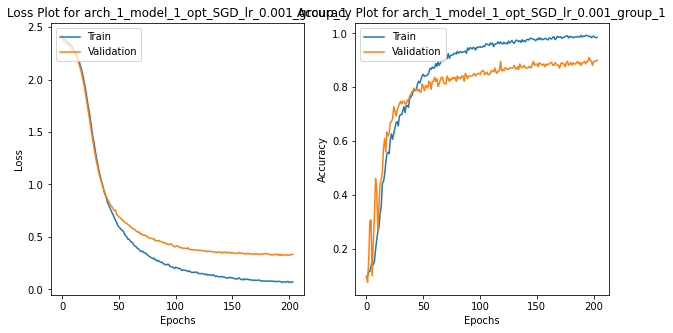

29/29 [==============================] - 150s 5s/step - loss: 0.4510 - accuracy: 0.8664
arch_1_model_1_group_1_opt_SGD_lr_0.01
Epoch 1/250
26/26 [==============================] - 2s 54ms/step - loss: 2.3854 - accuracy: 0.1389 - val_loss: 2.2063 - val_accuracy: 0.5149
Epoch 2/250
26/26 [==============================] - 1s 45ms/step - loss: 2.1085 - accuracy: 0.4906 - val_loss: 1.6859 - val_accuracy: 0.6238
Epoch 3/250
26/26 [==============================] - 1s 44ms/step - loss: 1.5053 - accuracy: 0.6611 - val_loss: 1.0968 - val_accuracy: 0.7030
Epoch 4/250
26/26 [==============================] - 1s 44ms/step - loss: 0.9191 - accuracy: 0.7679 - val_loss: 0.8430 - val_accuracy: 0.7574
Epoch 5/250
26/26 [==============================] - 1s 44ms/step - loss: 0.6954 - accuracy: 0.8166 - val_loss: 0.7250 - val_accuracy: 0.7822
Epoch 6/250
26/26 [==============================] - 1s 43ms/step - loss: 0.5544 - accuracy: 0.8306 - val_loss: 0.6344 - val_accuracy: 0.8020
Epoch 7/250
26/26 [==

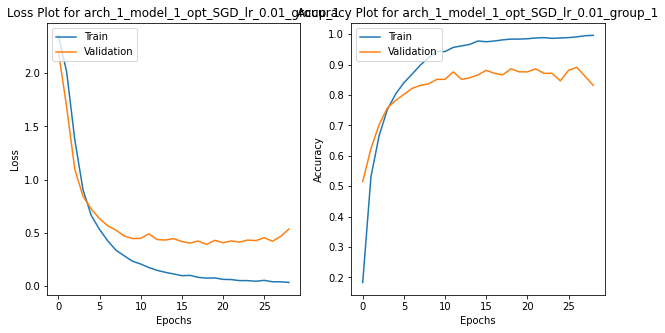

29/29 [==============================] - 1s 36ms/step - loss: 0.4997 - accuracy: 0.8524
arch_1_model_1_group_1_opt_Adam_lr_0.001
Epoch 1/250
26/26 [==============================] - 2s 51ms/step - loss: 2.6109 - accuracy: 0.1076 - val_loss: 2.1447 - val_accuracy: 0.3713
Epoch 2/250
26/26 [==============================] - 1s 45ms/step - loss: 1.9968 - accuracy: 0.3619 - val_loss: 1.5855 - val_accuracy: 0.5941
Epoch 3/250
26/26 [==============================] - 1s 47ms/step - loss: 1.4662 - accuracy: 0.5997 - val_loss: 1.1574 - val_accuracy: 0.7277
Epoch 4/250
26/26 [==============================] - 1s 48ms/step - loss: 1.0518 - accuracy: 0.7572 - val_loss: 0.9426 - val_accuracy: 0.7228
Epoch 5/250
26/26 [==============================] - 1s 46ms/step - loss: 0.8248 - accuracy: 0.8107 - val_loss: 0.8342 - val_accuracy: 0.7673
Epoch 6/250
26/26 [==============================] - 1s 46ms/step - loss: 0.7161 - accuracy: 0.8242 - val_loss: 0.7505 - val_accuracy: 0.7426
Epoch 7/250
26/26 [

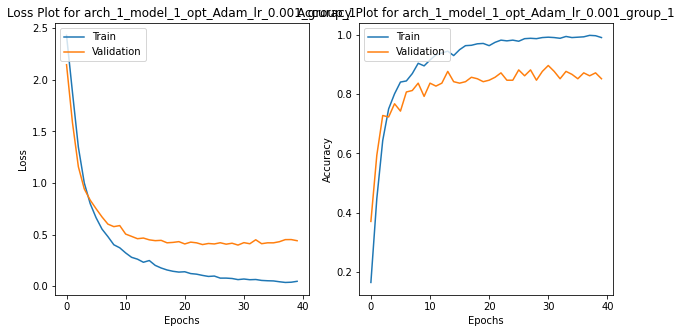

29/29 [==============================] - 1s 36ms/step - loss: 0.4559 - accuracy: 0.8675
arch_1_model_1_group_1_opt_Adam_lr_0.01
Epoch 1/250
26/26 [==============================] - 2s 51ms/step - loss: 5.4162 - accuracy: 0.3244 - val_loss: 0.7207 - val_accuracy: 0.7673
Epoch 2/250
26/26 [==============================] - 1s 46ms/step - loss: 0.5950 - accuracy: 0.8121 - val_loss: 0.4815 - val_accuracy: 0.8515
Epoch 3/250
26/26 [==============================] - 1s 46ms/step - loss: 0.1929 - accuracy: 0.9448 - val_loss: 0.4684 - val_accuracy: 0.8465
Epoch 4/250
26/26 [==============================] - 1s 47ms/step - loss: 0.1038 - accuracy: 0.9783 - val_loss: 0.4877 - val_accuracy: 0.8564
Epoch 5/250
26/26 [==============================] - 1s 46ms/step - loss: 0.0835 - accuracy: 0.9722 - val_loss: 0.5345 - val_accuracy: 0.8663
Epoch 6/250
26/26 [==============================] - 1s 45ms/step - loss: 0.0479 - accuracy: 0.9831 - val_loss: 0.5070 - val_accuracy: 0.8663
Epoch 7/250
26/26 [=

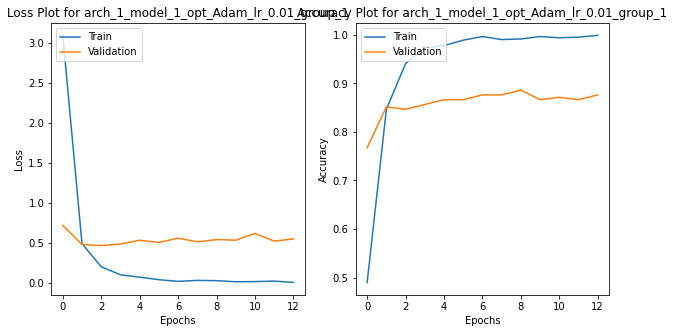

29/29 [==============================] - 1s 37ms/step - loss: 0.5912 - accuracy: 0.8330
arch_1_model_2_group_1_opt_SGD_lr_0.001
Epoch 1/250
26/26 [==============================] - 2s 51ms/step - loss: 2.4085 - accuracy: 0.0977 - val_loss: 2.3760 - val_accuracy: 0.0990
Epoch 2/250
26/26 [==============================] - 1s 45ms/step - loss: 2.3986 - accuracy: 0.1014 - val_loss: 2.3587 - val_accuracy: 0.1584
Epoch 3/250
26/26 [==============================] - 1s 48ms/step - loss: 2.3532 - accuracy: 0.1419 - val_loss: 2.3423 - val_accuracy: 0.2772
Epoch 4/250
26/26 [==============================] - 1s 48ms/step - loss: 2.3345 - accuracy: 0.1902 - val_loss: 2.3207 - val_accuracy: 0.4455
Epoch 5/250
26/26 [==============================] - 1s 46ms/step - loss: 2.3149 - accuracy: 0.2314 - val_loss: 2.2978 - val_accuracy: 0.4109
Epoch 6/250
26/26 [==============================] - 1s 46ms/step - loss: 2.2986 - accuracy: 0.2417 - val_loss: 2.2750 - val_accuracy: 0.4257
Epoch 7/250
26/26 [=

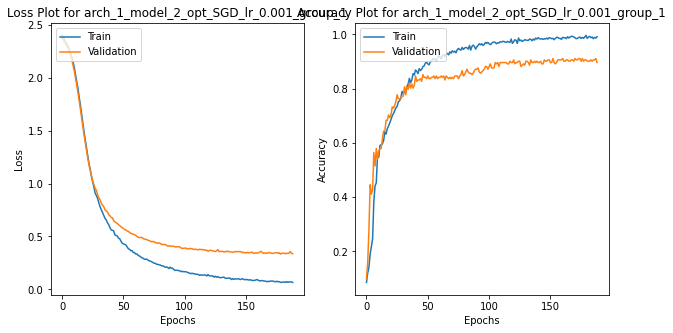

29/29 [==============================] - 1s 37ms/step - loss: 0.4831 - accuracy: 0.8556
arch_1_model_2_group_1_opt_SGD_lr_0.01
Epoch 1/250
26/26 [==============================] - 2s 51ms/step - loss: 2.4217 - accuracy: 0.1010 - val_loss: 2.3348 - val_accuracy: 0.2772
Epoch 2/250
26/26 [==============================] - 1s 46ms/step - loss: 2.2902 - accuracy: 0.3193 - val_loss: 2.1137 - val_accuracy: 0.5545
Epoch 3/250
26/26 [==============================] - 1s 47ms/step - loss: 2.0004 - accuracy: 0.5676 - val_loss: 1.5583 - val_accuracy: 0.6683
Epoch 4/250
26/26 [==============================] - 1s 48ms/step - loss: 1.3907 - accuracy: 0.6541 - val_loss: 1.0475 - val_accuracy: 0.6980
Epoch 5/250
26/26 [==============================] - 1s 47ms/step - loss: 0.9340 - accuracy: 0.7471 - val_loss: 0.7961 - val_accuracy: 0.7822
Epoch 6/250
26/26 [==============================] - 1s 46ms/step - loss: 0.6895 - accuracy: 0.7903 - val_loss: 0.6556 - val_accuracy: 0.8218
Epoch 7/250
26/26 [==

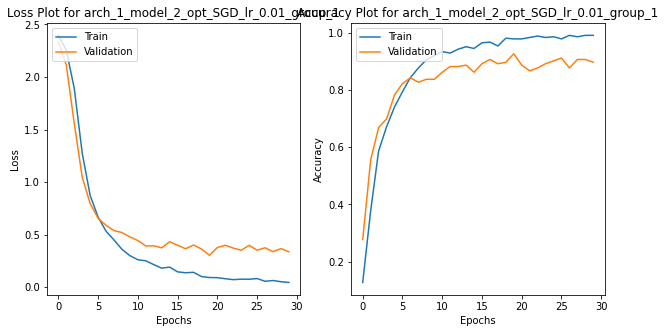

29/29 [==============================] - 1s 36ms/step - loss: 0.4908 - accuracy: 0.8545
arch_1_model_2_group_1_opt_Adam_lr_0.001
Epoch 1/250
26/26 [==============================] - 2s 51ms/step - loss: 2.3421 - accuracy: 0.1671 - val_loss: 1.7519 - val_accuracy: 0.6089
Epoch 2/250
26/26 [==============================] - 1s 46ms/step - loss: 1.5759 - accuracy: 0.6417 - val_loss: 1.1243 - val_accuracy: 0.6634
Epoch 3/250
26/26 [==============================] - 1s 47ms/step - loss: 1.0335 - accuracy: 0.7396 - val_loss: 0.9258 - val_accuracy: 0.7426
Epoch 4/250
26/26 [==============================] - 1s 48ms/step - loss: 0.7004 - accuracy: 0.8043 - val_loss: 0.6754 - val_accuracy: 0.8168
Epoch 5/250
26/26 [==============================] - 1s 46ms/step - loss: 0.5189 - accuracy: 0.8560 - val_loss: 0.5947 - val_accuracy: 0.8218
Epoch 6/250
26/26 [==============================] - 1s 46ms/step - loss: 0.3913 - accuracy: 0.9034 - val_loss: 0.5482 - val_accuracy: 0.8416
Epoch 7/250
26/26 [

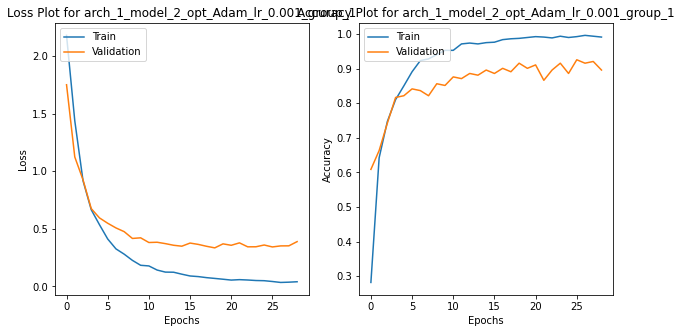

29/29 [==============================] - 1s 36ms/step - loss: 0.5317 - accuracy: 0.8545
arch_1_model_2_group_1_opt_Adam_lr_0.01
Epoch 1/250
26/26 [==============================] - 2s 52ms/step - loss: 5.1833 - accuracy: 0.2874 - val_loss: 0.8534 - val_accuracy: 0.7376
Epoch 2/250
26/26 [==============================] - 1s 46ms/step - loss: 0.7054 - accuracy: 0.7590 - val_loss: 0.6455 - val_accuracy: 0.8168
Epoch 3/250
26/26 [==============================] - 1s 48ms/step - loss: 0.3396 - accuracy: 0.8777 - val_loss: 0.6019 - val_accuracy: 0.8218
Epoch 4/250
26/26 [==============================] - 1s 47ms/step - loss: 0.2701 - accuracy: 0.9080 - val_loss: 0.6820 - val_accuracy: 0.8317
Epoch 5/250
26/26 [==============================] - 1s 47ms/step - loss: 0.1429 - accuracy: 0.9492 - val_loss: 0.6562 - val_accuracy: 0.8416
Epoch 6/250
26/26 [==============================] - 1s 46ms/step - loss: 0.1050 - accuracy: 0.9723 - val_loss: 0.5718 - val_accuracy: 0.8267
Epoch 7/250
26/26 [=

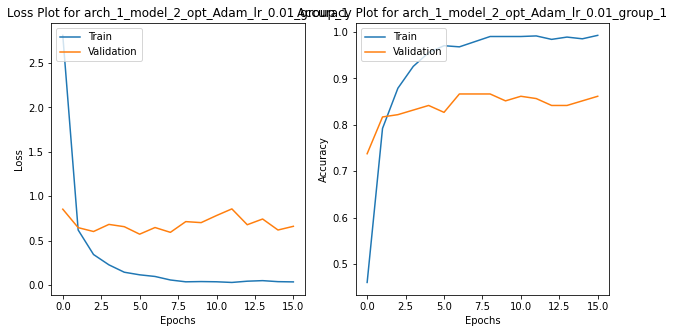

29/29 [==============================] - 1s 37ms/step - loss: 0.7179 - accuracy: 0.8276
arch_1_model_3_group_1_opt_SGD_lr_0.001
Epoch 1/250
26/26 [==============================] - 2s 52ms/step - loss: 2.4580 - accuracy: 0.0636 - val_loss: 2.3868 - val_accuracy: 0.0990
Epoch 2/250
26/26 [==============================] - 1s 45ms/step - loss: 2.4068 - accuracy: 0.0965 - val_loss: 2.3741 - val_accuracy: 0.1188
Epoch 3/250
26/26 [==============================] - 1s 48ms/step - loss: 2.3789 - accuracy: 0.1094 - val_loss: 2.3693 - val_accuracy: 0.1584
Epoch 4/250
26/26 [==============================] - 1s 48ms/step - loss: 2.3874 - accuracy: 0.1033 - val_loss: 2.3678 - val_accuracy: 0.1931
Epoch 5/250
26/26 [==============================] - 1s 47ms/step - loss: 2.3728 - accuracy: 0.1023 - val_loss: 2.3659 - val_accuracy: 0.1238
Epoch 6/250
26/26 [==============================] - 1s 46ms/step - loss: 2.3661 - accuracy: 0.1100 - val_loss: 2.3640 - val_accuracy: 0.1931
Epoch 7/250
26/26 [=

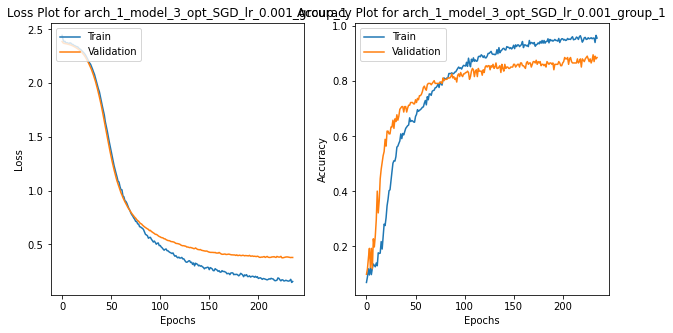

29/29 [==============================] - 1s 38ms/step - loss: 0.4298 - accuracy: 0.8718
arch_1_model_3_group_1_opt_SGD_lr_0.01
Epoch 1/250
26/26 [==============================] - 2s 52ms/step - loss: 2.4150 - accuracy: 0.1091 - val_loss: 2.3514 - val_accuracy: 0.1485
Epoch 2/250
26/26 [==============================] - 1s 46ms/step - loss: 2.3352 - accuracy: 0.2321 - val_loss: 2.2701 - val_accuracy: 0.4604
Epoch 3/250
26/26 [==============================] - 1s 46ms/step - loss: 2.2597 - accuracy: 0.4131 - val_loss: 2.1206 - val_accuracy: 0.5347
Epoch 4/250
26/26 [==============================] - 1s 47ms/step - loss: 2.0987 - accuracy: 0.4686 - val_loss: 1.8477 - val_accuracy: 0.6287
Epoch 5/250
26/26 [==============================] - 1s 47ms/step - loss: 1.7603 - accuracy: 0.5851 - val_loss: 1.4457 - val_accuracy: 0.6980
Epoch 6/250
26/26 [==============================] - 1s 45ms/step - loss: 1.3461 - accuracy: 0.6715 - val_loss: 1.1290 - val_accuracy: 0.6881
Epoch 7/250
26/26 [==

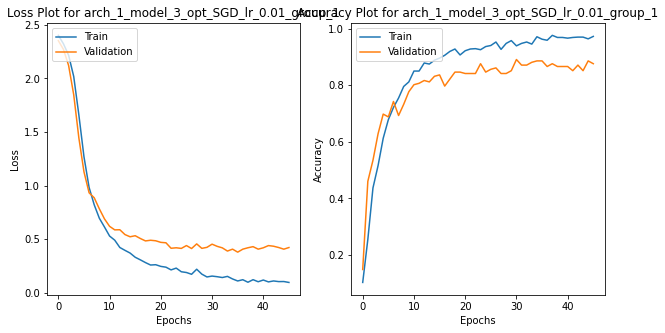

29/29 [==============================] - 1s 37ms/step - loss: 0.4934 - accuracy: 0.8524
arch_1_model_3_group_1_opt_Adam_lr_0.001
Epoch 1/250
26/26 [==============================] - 2s 53ms/step - loss: 2.4146 - accuracy: 0.1183 - val_loss: 2.1416 - val_accuracy: 0.4604
Epoch 2/250
26/26 [==============================] - 1s 47ms/step - loss: 2.0339 - accuracy: 0.4579 - val_loss: 1.5995 - val_accuracy: 0.7277
Epoch 3/250
26/26 [==============================] - 1s 47ms/step - loss: 1.4901 - accuracy: 0.6797 - val_loss: 1.1581 - val_accuracy: 0.7228
Epoch 4/250
26/26 [==============================] - 1s 48ms/step - loss: 1.0812 - accuracy: 0.7037 - val_loss: 0.8690 - val_accuracy: 0.7772
Epoch 5/250
26/26 [==============================] - 1s 47ms/step - loss: 0.8535 - accuracy: 0.7294 - val_loss: 0.7601 - val_accuracy: 0.7624
Epoch 6/250
26/26 [==============================] - 1s 46ms/step - loss: 0.6667 - accuracy: 0.8105 - val_loss: 0.6789 - val_accuracy: 0.7822
Epoch 7/250
26/26 [

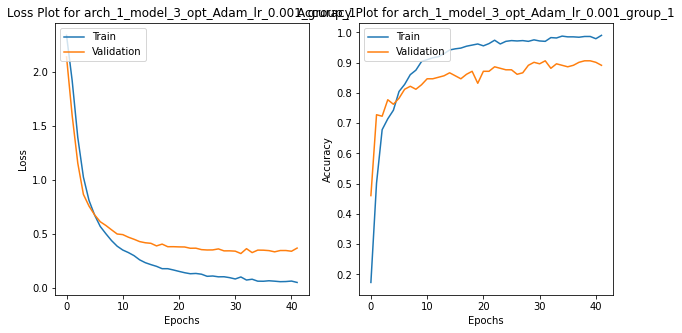

29/29 [==============================] - 1s 37ms/step - loss: 0.4543 - accuracy: 0.8718
arch_1_model_3_group_1_opt_Adam_lr_0.01
Epoch 1/250
26/26 [==============================] - 2s 51ms/step - loss: 2.9655 - accuracy: 0.2047 - val_loss: 1.4018 - val_accuracy: 0.5594
Epoch 2/250
26/26 [==============================] - 1s 45ms/step - loss: 1.1877 - accuracy: 0.6250 - val_loss: 0.8696 - val_accuracy: 0.6782
Epoch 3/250
26/26 [==============================] - 1s 49ms/step - loss: 0.7163 - accuracy: 0.7605 - val_loss: 0.6314 - val_accuracy: 0.8020
Epoch 4/250
26/26 [==============================] - 1s 47ms/step - loss: 0.5013 - accuracy: 0.8294 - val_loss: 0.5335 - val_accuracy: 0.8119
Epoch 5/250
26/26 [==============================] - 1s 48ms/step - loss: 0.3406 - accuracy: 0.8801 - val_loss: 0.4656 - val_accuracy: 0.8465
Epoch 6/250
26/26 [==============================] - 1s 47ms/step - loss: 0.2949 - accuracy: 0.8924 - val_loss: 0.4057 - val_accuracy: 0.8960
Epoch 7/250
26/26 [=

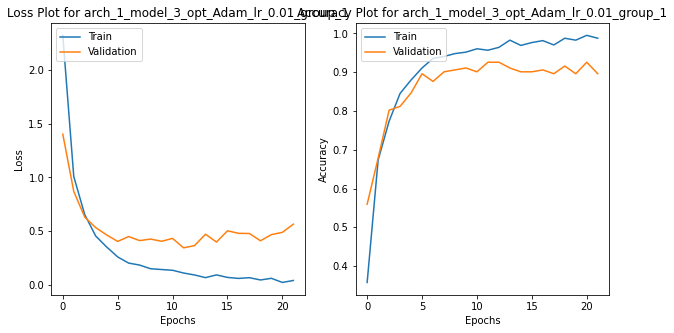

29/29 [==============================] - 1s 36ms/step - loss: 0.6731 - accuracy: 0.8502
arch_1_model_4_group_1_opt_SGD_lr_0.001
Epoch 1/250
26/26 [==============================] - 2s 51ms/step - loss: 2.4476 - accuracy: 0.0891 - val_loss: 2.3721 - val_accuracy: 0.2129
Epoch 2/250
26/26 [==============================] - 1s 46ms/step - loss: 2.3953 - accuracy: 0.0907 - val_loss: 2.3542 - val_accuracy: 0.2772
Epoch 3/250
26/26 [==============================] - 1s 47ms/step - loss: 2.3673 - accuracy: 0.1216 - val_loss: 2.3330 - val_accuracy: 0.2624
Epoch 4/250
26/26 [==============================] - 1s 48ms/step - loss: 2.3411 - accuracy: 0.1739 - val_loss: 2.3106 - val_accuracy: 0.3317
Epoch 5/250
26/26 [==============================] - 1s 47ms/step - loss: 2.3236 - accuracy: 0.2075 - val_loss: 2.2840 - val_accuracy: 0.4554
Epoch 6/250
26/26 [==============================] - 1s 46ms/step - loss: 2.2820 - accuracy: 0.2965 - val_loss: 2.2464 - val_accuracy: 0.4950
Epoch 7/250
26/26 [=

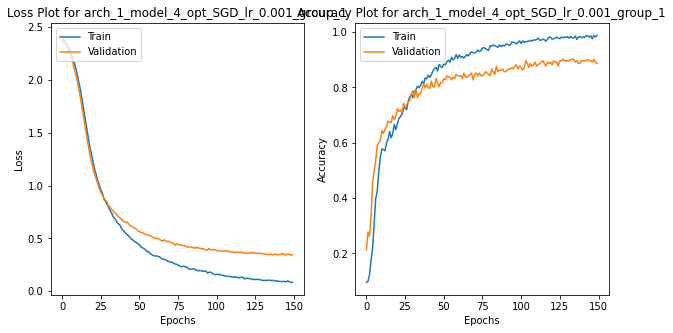

29/29 [==============================] - 1s 37ms/step - loss: 0.4667 - accuracy: 0.8631
arch_1_model_4_group_1_opt_SGD_lr_0.01
Epoch 1/250
26/26 [==============================] - 2s 53ms/step - loss: 2.4414 - accuracy: 0.1300 - val_loss: 2.2309 - val_accuracy: 0.3218
Epoch 2/250
26/26 [==============================] - 1s 47ms/step - loss: 2.1857 - accuracy: 0.3320 - val_loss: 1.7349 - val_accuracy: 0.6040
Epoch 3/250
26/26 [==============================] - 1s 47ms/step - loss: 1.5993 - accuracy: 0.5748 - val_loss: 1.0906 - val_accuracy: 0.6584
Epoch 4/250
26/26 [==============================] - 1s 46ms/step - loss: 1.0606 - accuracy: 0.6534 - val_loss: 0.8805 - val_accuracy: 0.7574
Epoch 5/250
26/26 [==============================] - 1s 45ms/step - loss: 0.8151 - accuracy: 0.7335 - val_loss: 0.7126 - val_accuracy: 0.7772
Epoch 6/250
26/26 [==============================] - 1s 47ms/step - loss: 0.5698 - accuracy: 0.8278 - val_loss: 0.6540 - val_accuracy: 0.7970
Epoch 7/250
26/26 [==

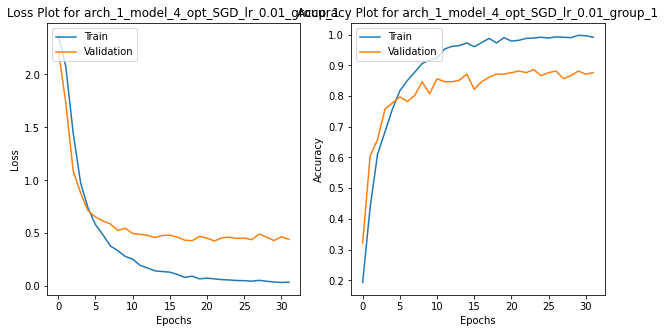

29/29 [==============================] - 1s 37ms/step - loss: 0.5734 - accuracy: 0.8481
arch_1_model_4_group_1_opt_Adam_lr_0.001
Epoch 1/250
26/26 [==============================] - 2s 52ms/step - loss: 2.4250 - accuracy: 0.1673 - val_loss: 1.8184 - val_accuracy: 0.5693
Epoch 2/250
26/26 [==============================] - 1s 45ms/step - loss: 1.6762 - accuracy: 0.5548 - val_loss: 1.2967 - val_accuracy: 0.7129
Epoch 3/250
26/26 [==============================] - 1s 47ms/step - loss: 1.1916 - accuracy: 0.6744 - val_loss: 0.9795 - val_accuracy: 0.6782
Epoch 4/250
26/26 [==============================] - 1s 46ms/step - loss: 0.8937 - accuracy: 0.7039 - val_loss: 0.7979 - val_accuracy: 0.7624
Epoch 5/250
26/26 [==============================] - 1s 47ms/step - loss: 0.6715 - accuracy: 0.8176 - val_loss: 0.7041 - val_accuracy: 0.7871
Epoch 6/250
26/26 [==============================] - 1s 47ms/step - loss: 0.5963 - accuracy: 0.8243 - val_loss: 0.6253 - val_accuracy: 0.8168
Epoch 7/250
26/26 [

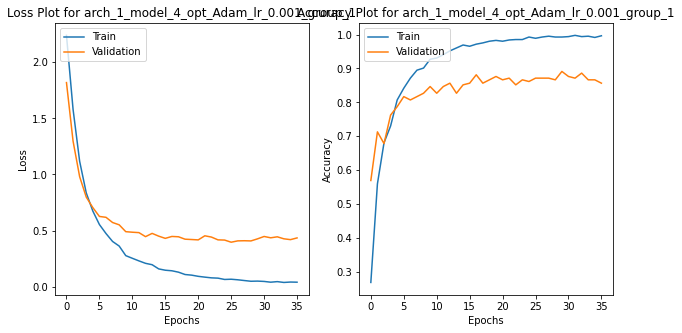

29/29 [==============================] - 1s 39ms/step - loss: 0.5140 - accuracy: 0.8675
arch_1_model_4_group_1_opt_Adam_lr_0.01
Epoch 1/250
26/26 [==============================] - 2s 54ms/step - loss: 5.5953 - accuracy: 0.2962 - val_loss: 1.0174 - val_accuracy: 0.7079
Epoch 2/250
26/26 [==============================] - 1s 46ms/step - loss: 0.8594 - accuracy: 0.7330 - val_loss: 0.7274 - val_accuracy: 0.7921
Epoch 3/250
26/26 [==============================] - 1s 48ms/step - loss: 0.6156 - accuracy: 0.8140 - val_loss: 0.5387 - val_accuracy: 0.8168
Epoch 4/250
26/26 [==============================] - 1s 49ms/step - loss: 0.3383 - accuracy: 0.8832 - val_loss: 0.5585 - val_accuracy: 0.8267
Epoch 5/250
26/26 [==============================] - 1s 47ms/step - loss: 0.3068 - accuracy: 0.9106 - val_loss: 0.4832 - val_accuracy: 0.8713
Epoch 6/250
26/26 [==============================] - 1s 48ms/step - loss: 0.2238 - accuracy: 0.9253 - val_loss: 0.4877 - val_accuracy: 0.8564
Epoch 7/250
26/26 [=

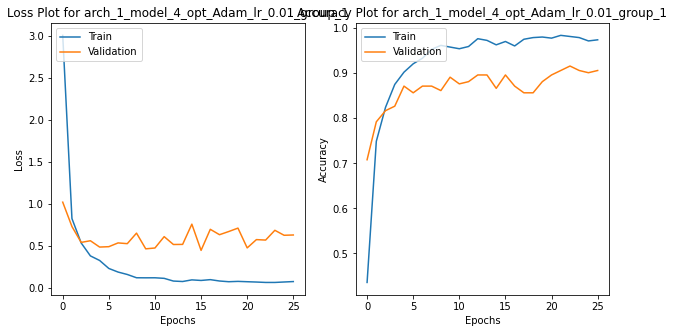

29/29 [==============================] - 1s 37ms/step - loss: 0.7123 - accuracy: 0.8341
arch_1_model_5_group_1_opt_SGD_lr_0.001
Epoch 1/250
26/26 [==============================] - 2s 54ms/step - loss: 2.4328 - accuracy: 0.1100 - val_loss: 2.3650 - val_accuracy: 0.1386
Epoch 2/250
26/26 [==============================] - 1s 48ms/step - loss: 2.3641 - accuracy: 0.1240 - val_loss: 2.3431 - val_accuracy: 0.1980
Epoch 3/250
26/26 [==============================] - 1s 49ms/step - loss: 2.3453 - accuracy: 0.1778 - val_loss: 2.3204 - val_accuracy: 0.2970
Epoch 4/250
26/26 [==============================] - 1s 49ms/step - loss: 2.3172 - accuracy: 0.2153 - val_loss: 2.2954 - val_accuracy: 0.4752
Epoch 5/250
26/26 [==============================] - 1s 47ms/step - loss: 2.2944 - accuracy: 0.3097 - val_loss: 2.2627 - val_accuracy: 0.5099
Epoch 6/250
26/26 [==============================] - 1s 46ms/step - loss: 2.2594 - accuracy: 0.3904 - val_loss: 2.2180 - val_accuracy: 0.6139
Epoch 7/250
26/26 [=

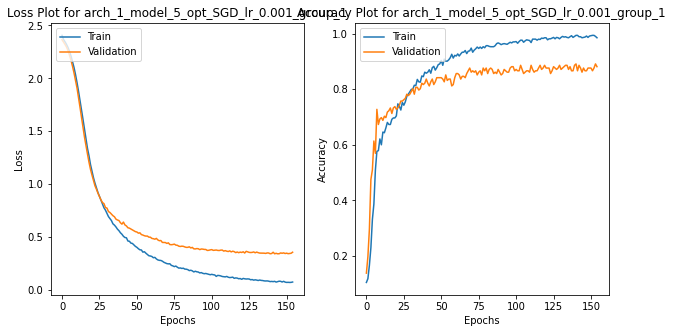

29/29 [==============================] - 1s 38ms/step - loss: 0.4288 - accuracy: 0.8696
arch_1_model_5_group_1_opt_SGD_lr_0.01
Epoch 1/250
26/26 [==============================] - 2s 54ms/step - loss: 2.3868 - accuracy: 0.1454 - val_loss: 2.1981 - val_accuracy: 0.4901
Epoch 2/250
26/26 [==============================] - 1s 47ms/step - loss: 2.0990 - accuracy: 0.4659 - val_loss: 1.6130 - val_accuracy: 0.6238
Epoch 3/250
26/26 [==============================] - 1s 46ms/step - loss: 1.4552 - accuracy: 0.6302 - val_loss: 1.1052 - val_accuracy: 0.7079
Epoch 4/250
26/26 [==============================] - 1s 46ms/step - loss: 0.9384 - accuracy: 0.7173 - val_loss: 0.8729 - val_accuracy: 0.7030
Epoch 5/250
26/26 [==============================] - 1s 47ms/step - loss: 0.7180 - accuracy: 0.7608 - val_loss: 0.7094 - val_accuracy: 0.7822
Epoch 6/250
26/26 [==============================] - 1s 48ms/step - loss: 0.6304 - accuracy: 0.8005 - val_loss: 0.6014 - val_accuracy: 0.8317
Epoch 7/250
26/26 [==

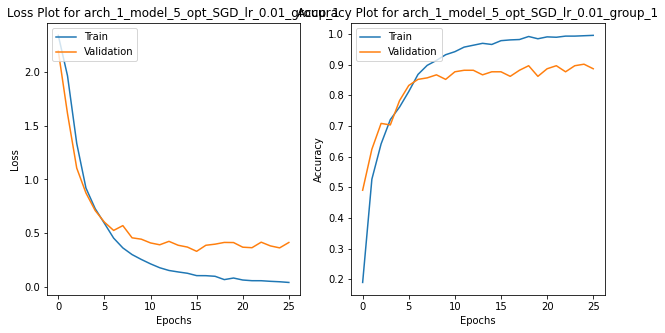

29/29 [==============================] - 1s 37ms/step - loss: 0.4972 - accuracy: 0.8524
arch_1_model_5_group_1_opt_Adam_lr_0.001
Epoch 1/250
26/26 [==============================] - 2s 55ms/step - loss: 2.2383 - accuracy: 0.3067 - val_loss: 1.2123 - val_accuracy: 0.7178
Epoch 2/250
26/26 [==============================] - 1s 46ms/step - loss: 1.0397 - accuracy: 0.6995 - val_loss: 0.8155 - val_accuracy: 0.7822
Epoch 3/250
26/26 [==============================] - 1s 46ms/step - loss: 0.7054 - accuracy: 0.7864 - val_loss: 0.6260 - val_accuracy: 0.8168
Epoch 4/250
26/26 [==============================] - 1s 46ms/step - loss: 0.4988 - accuracy: 0.8551 - val_loss: 0.5608 - val_accuracy: 0.8317
Epoch 5/250
26/26 [==============================] - 1s 47ms/step - loss: 0.3798 - accuracy: 0.9008 - val_loss: 0.5243 - val_accuracy: 0.8020
Epoch 6/250
26/26 [==============================] - 1s 46ms/step - loss: 0.2773 - accuracy: 0.9369 - val_loss: 0.4989 - val_accuracy: 0.8416
Epoch 7/250
26/26 [

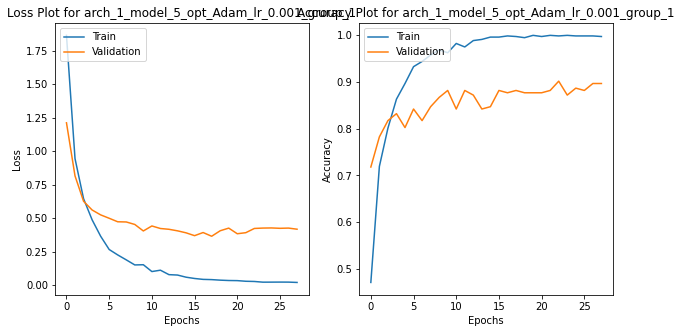

29/29 [==============================] - 1s 39ms/step - loss: 0.5021 - accuracy: 0.8696
arch_1_model_5_group_1_opt_Adam_lr_0.01
Epoch 1/250
26/26 [==============================] - 2s 53ms/step - loss: 4.0350 - accuracy: 0.2093 - val_loss: 2.0190 - val_accuracy: 0.3168
Epoch 2/250
26/26 [==============================] - 1s 48ms/step - loss: 1.8405 - accuracy: 0.3502 - val_loss: 1.0775 - val_accuracy: 0.7574
Epoch 3/250
26/26 [==============================] - 1s 49ms/step - loss: 1.3627 - accuracy: 0.5163 - val_loss: 0.8764 - val_accuracy: 0.7327
Epoch 4/250
26/26 [==============================] - 1s 51ms/step - loss: 1.1159 - accuracy: 0.6181 - val_loss: 0.8103 - val_accuracy: 0.6782
Epoch 5/250
26/26 [==============================] - 1s 47ms/step - loss: 0.7282 - accuracy: 0.7226 - val_loss: 0.5828 - val_accuracy: 0.8366
Epoch 6/250
26/26 [==============================] - 1s 48ms/step - loss: 0.4648 - accuracy: 0.8412 - val_loss: 0.5686 - val_accuracy: 0.8069
Epoch 7/250
26/26 [=

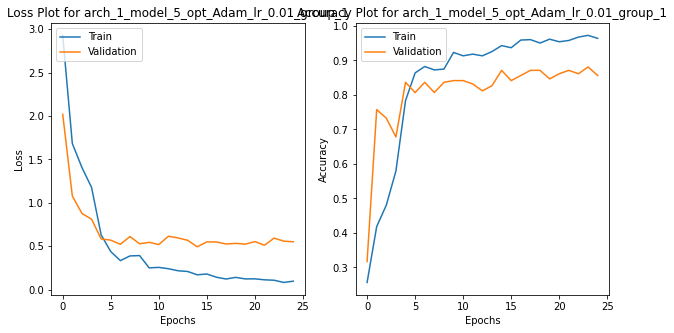

29/29 [==============================] - 1s 39ms/step - loss: 0.6133 - accuracy: 0.8653
arch_1_model_6_group_1_opt_SGD_lr_0.001
Epoch 1/250
26/26 [==============================] - 2s 54ms/step - loss: 2.4027 - accuracy: 0.1072 - val_loss: 2.3633 - val_accuracy: 0.1089
Epoch 2/250
26/26 [==============================] - 1s 49ms/step - loss: 2.3700 - accuracy: 0.1079 - val_loss: 2.3413 - val_accuracy: 0.1733
Epoch 3/250
26/26 [==============================] - 1s 48ms/step - loss: 2.3518 - accuracy: 0.1522 - val_loss: 2.3152 - val_accuracy: 0.3614
Epoch 4/250
26/26 [==============================] - 1s 50ms/step - loss: 2.3166 - accuracy: 0.2005 - val_loss: 2.2830 - val_accuracy: 0.3564
Epoch 5/250
26/26 [==============================] - 1s 48ms/step - loss: 2.2847 - accuracy: 0.3158 - val_loss: 2.2462 - val_accuracy: 0.4703
Epoch 6/250
26/26 [==============================] - 1s 48ms/step - loss: 2.2540 - accuracy: 0.4170 - val_loss: 2.1999 - val_accuracy: 0.5842
Epoch 7/250
26/26 [=

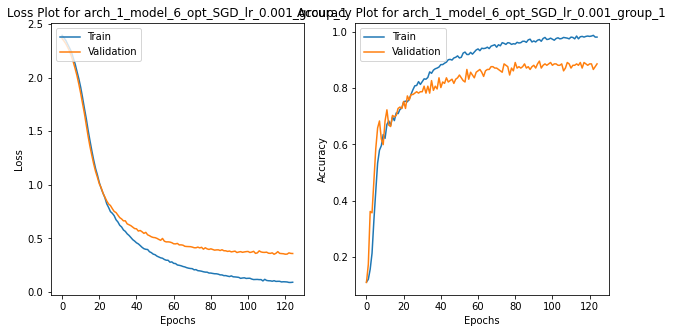

29/29 [==============================] - 1s 36ms/step - loss: 0.4431 - accuracy: 0.8685
arch_1_model_6_group_1_opt_SGD_lr_0.01
Epoch 1/250
26/26 [==============================] - 2s 52ms/step - loss: 2.4083 - accuracy: 0.1270 - val_loss: 2.2731 - val_accuracy: 0.3762
Epoch 2/250
26/26 [==============================] - 1s 46ms/step - loss: 2.2078 - accuracy: 0.4439 - val_loss: 1.8072 - val_accuracy: 0.6584
Epoch 3/250
26/26 [==============================] - 1s 49ms/step - loss: 1.6095 - accuracy: 0.6186 - val_loss: 1.0776 - val_accuracy: 0.6832
Epoch 4/250
26/26 [==============================] - 1s 47ms/step - loss: 0.9575 - accuracy: 0.6958 - val_loss: 0.8330 - val_accuracy: 0.7376
Epoch 5/250
26/26 [==============================] - 1s 48ms/step - loss: 0.7036 - accuracy: 0.7779 - val_loss: 0.6723 - val_accuracy: 0.7822
Epoch 6/250
26/26 [==============================] - 1s 48ms/step - loss: 0.5114 - accuracy: 0.8509 - val_loss: 0.5857 - val_accuracy: 0.8218
Epoch 7/250
26/26 [==

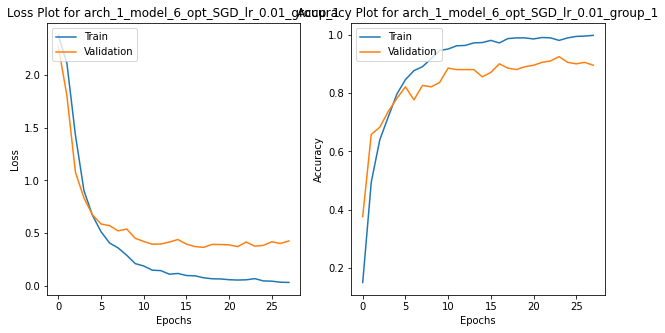

29/29 [==============================] - 1s 37ms/step - loss: 0.5215 - accuracy: 0.8481
arch_1_model_6_group_1_opt_Adam_lr_0.001
Epoch 1/250
26/26 [==============================] - 2s 53ms/step - loss: 2.5326 - accuracy: 0.2809 - val_loss: 1.1920 - val_accuracy: 0.6782
Epoch 2/250
26/26 [==============================] - 1s 48ms/step - loss: 1.0314 - accuracy: 0.7058 - val_loss: 0.7743 - val_accuracy: 0.7228
Epoch 3/250
26/26 [==============================] - 1s 52ms/step - loss: 0.6062 - accuracy: 0.8137 - val_loss: 0.6020 - val_accuracy: 0.7871
Epoch 4/250
26/26 [==============================] - 1s 48ms/step - loss: 0.4010 - accuracy: 0.8869 - val_loss: 0.5748 - val_accuracy: 0.8267
Epoch 5/250
26/26 [==============================] - 1s 48ms/step - loss: 0.2928 - accuracy: 0.9304 - val_loss: 0.4842 - val_accuracy: 0.8663
Epoch 6/250
26/26 [==============================] - 1s 47ms/step - loss: 0.2301 - accuracy: 0.9434 - val_loss: 0.4630 - val_accuracy: 0.8168
Epoch 7/250
26/26 [

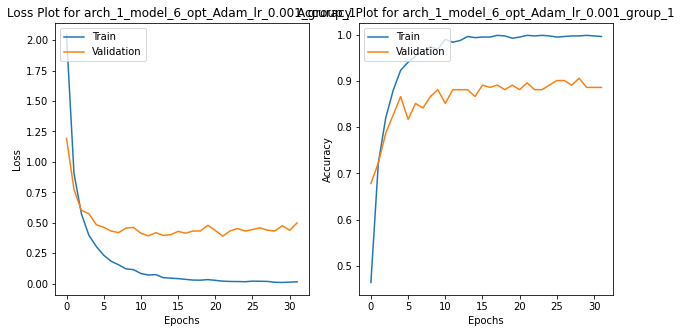

29/29 [==============================] - 1s 39ms/step - loss: 0.6052 - accuracy: 0.8556
arch_1_model_6_group_1_opt_Adam_lr_0.01
Epoch 1/250
26/26 [==============================] - 2s 54ms/step - loss: 8.3607 - accuracy: 0.1227 - val_loss: 2.2416 - val_accuracy: 0.4059
Epoch 2/250
26/26 [==============================] - 1s 51ms/step - loss: 2.3576 - accuracy: 0.1501 - val_loss: 2.3784 - val_accuracy: 0.0990
Epoch 3/250
26/26 [==============================] - 1s 47ms/step - loss: 2.3793 - accuracy: 0.1049 - val_loss: 2.3792 - val_accuracy: 0.0990
Epoch 4/250
26/26 [==============================] - 1s 50ms/step - loss: 2.3785 - accuracy: 0.0801 - val_loss: 2.3787 - val_accuracy: 0.0990
Epoch 5/250
26/26 [==============================] - 1s 48ms/step - loss: 2.3946 - accuracy: 0.1084 - val_loss: 2.3780 - val_accuracy: 0.0990
Epoch 6/250
26/26 [==============================] - 1s 49ms/step - loss: 2.3758 - accuracy: 0.0915 - val_loss: 2.3781 - val_accuracy: 0.0990
Epoch 7/250
26/26 [=

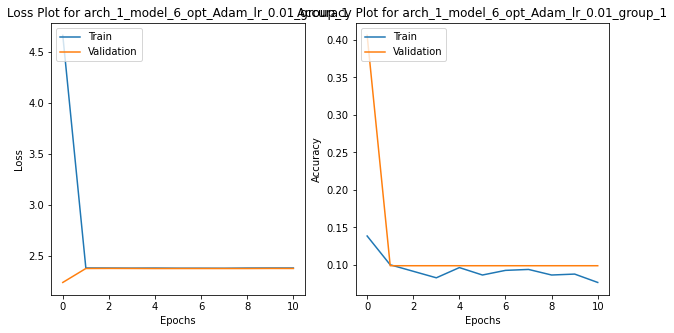

29/29 [==============================] - 1s 37ms/step - loss: 2.2273 - accuracy: 0.4041
arch_2_model_1_group_1_opt_SGD_lr_0.001
Epoch 1/250
26/26 [==============================] - 2s 54ms/step - loss: 2.4473 - accuracy: 0.1154 - val_loss: 2.3833 - val_accuracy: 0.1287
Epoch 2/250
26/26 [==============================] - 1s 47ms/step - loss: 2.3922 - accuracy: 0.1235 - val_loss: 2.3727 - val_accuracy: 0.1535
Epoch 3/250
26/26 [==============================] - 1s 47ms/step - loss: 2.3767 - accuracy: 0.1164 - val_loss: 2.3593 - val_accuracy: 0.1782
Epoch 4/250
26/26 [==============================] - 1s 46ms/step - loss: 2.3769 - accuracy: 0.1325 - val_loss: 2.3507 - val_accuracy: 0.1931
Epoch 5/250
26/26 [==============================] - 1s 52ms/step - loss: 2.3629 - accuracy: 0.1239 - val_loss: 2.3456 - val_accuracy: 0.1881
Epoch 6/250
26/26 [==============================] - 1s 52ms/step - loss: 2.3637 - accuracy: 0.1241 - val_loss: 2.3348 - val_accuracy: 0.2178
Epoch 7/250
26/26 [=

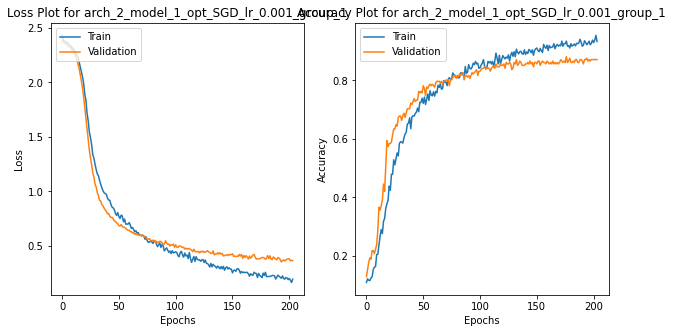

29/29 [==============================] - 1s 38ms/step - loss: 0.4284 - accuracy: 0.8772
arch_2_model_1_group_1_opt_SGD_lr_0.01
Epoch 1/250
26/26 [==============================] - 2s 53ms/step - loss: 2.4402 - accuracy: 0.0766 - val_loss: 2.3793 - val_accuracy: 0.0990
Epoch 2/250
26/26 [==============================] - 1s 52ms/step - loss: 2.3766 - accuracy: 0.1280 - val_loss: 2.3558 - val_accuracy: 0.2228
Epoch 3/250
26/26 [==============================] - 1s 46ms/step - loss: 2.3402 - accuracy: 0.1819 - val_loss: 2.2570 - val_accuracy: 0.2822
Epoch 4/250
26/26 [==============================] - 1s 47ms/step - loss: 2.2530 - accuracy: 0.2354 - val_loss: 1.9647 - val_accuracy: 0.4653
Epoch 5/250
26/26 [==============================] - 1s 47ms/step - loss: 1.8748 - accuracy: 0.4106 - val_loss: 1.4205 - val_accuracy: 0.5693
Epoch 6/250
26/26 [==============================] - 1s 48ms/step - loss: 1.4049 - accuracy: 0.5494 - val_loss: 1.0146 - val_accuracy: 0.6931
Epoch 7/250
26/26 [==

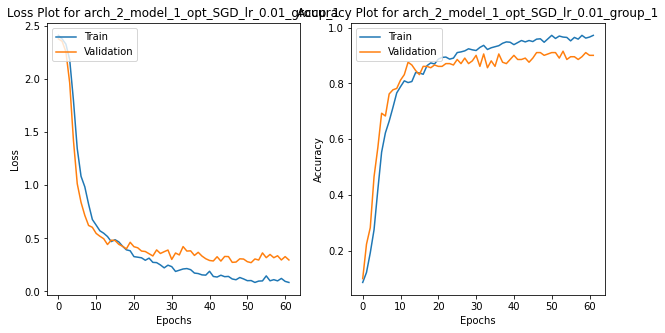

29/29 [==============================] - 1s 37ms/step - loss: 0.4555 - accuracy: 0.8966
arch_2_model_1_group_1_opt_Adam_lr_0.001
Epoch 1/250
26/26 [==============================] - 2s 53ms/step - loss: 2.3322 - accuracy: 0.1788 - val_loss: 1.5875 - val_accuracy: 0.5545
Epoch 2/250
26/26 [==============================] - 1s 48ms/step - loss: 1.4754 - accuracy: 0.5065 - val_loss: 0.9558 - val_accuracy: 0.6436
Epoch 3/250
26/26 [==============================] - 1s 48ms/step - loss: 1.0299 - accuracy: 0.6454 - val_loss: 0.7819 - val_accuracy: 0.7327
Epoch 4/250
26/26 [==============================] - 1s 48ms/step - loss: 0.8413 - accuracy: 0.7076 - val_loss: 0.7379 - val_accuracy: 0.7723
Epoch 5/250
26/26 [==============================] - 1s 49ms/step - loss: 0.7065 - accuracy: 0.7529 - val_loss: 0.7143 - val_accuracy: 0.7426
Epoch 6/250
26/26 [==============================] - 1s 48ms/step - loss: 0.5600 - accuracy: 0.7832 - val_loss: 0.5968 - val_accuracy: 0.8020
Epoch 7/250
26/26 [

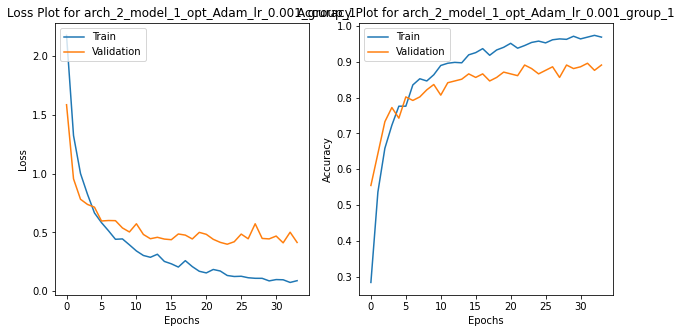

29/29 [==============================] - 1s 37ms/step - loss: 0.5229 - accuracy: 0.8804
arch_2_model_1_group_1_opt_Adam_lr_0.01
Epoch 1/250
26/26 [==============================] - 2s 53ms/step - loss: 2.2037 - accuracy: 0.2379 - val_loss: 1.0062 - val_accuracy: 0.6584
Epoch 2/250
26/26 [==============================] - 1s 47ms/step - loss: 1.0051 - accuracy: 0.6373 - val_loss: 0.8003 - val_accuracy: 0.6535
Epoch 3/250
26/26 [==============================] - 1s 48ms/step - loss: 0.7795 - accuracy: 0.7366 - val_loss: 0.5575 - val_accuracy: 0.8119
Epoch 4/250
26/26 [==============================] - 1s 46ms/step - loss: 0.5059 - accuracy: 0.8109 - val_loss: 0.5351 - val_accuracy: 0.8267
Epoch 5/250
26/26 [==============================] - 1s 47ms/step - loss: 0.4608 - accuracy: 0.8530 - val_loss: 0.5165 - val_accuracy: 0.8515
Epoch 6/250
26/26 [==============================] - 1s 47ms/step - loss: 0.3601 - accuracy: 0.8732 - val_loss: 0.7170 - val_accuracy: 0.7871
Epoch 7/250
26/26 [=

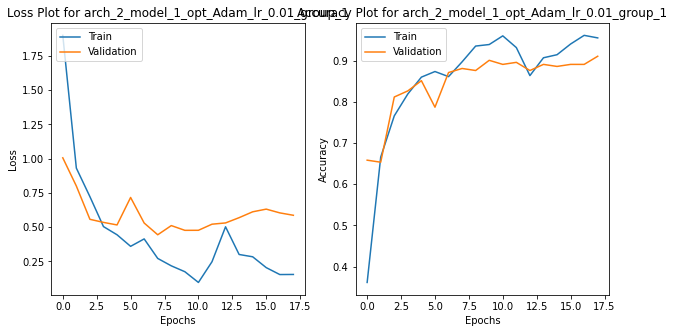

29/29 [==============================] - 1s 36ms/step - loss: 0.4819 - accuracy: 0.8890
arch_2_model_2_group_1_opt_SGD_lr_0.001
Epoch 1/250
26/26 [==============================] - 2s 53ms/step - loss: 2.4027 - accuracy: 0.0797 - val_loss: 2.3959 - val_accuracy: 0.1188
Epoch 2/250
26/26 [==============================] - 1s 52ms/step - loss: 2.3998 - accuracy: 0.0906 - val_loss: 2.3901 - val_accuracy: 0.1436
Epoch 3/250
26/26 [==============================] - 1s 49ms/step - loss: 2.3951 - accuracy: 0.0878 - val_loss: 2.3851 - val_accuracy: 0.1436
Epoch 4/250
26/26 [==============================] - 1s 48ms/step - loss: 2.3891 - accuracy: 0.1120 - val_loss: 2.3813 - val_accuracy: 0.1040
Epoch 5/250
26/26 [==============================] - 1s 46ms/step - loss: 2.3837 - accuracy: 0.1137 - val_loss: 2.3777 - val_accuracy: 0.1485
Epoch 6/250
26/26 [==============================] - 1s 47ms/step - loss: 2.3834 - accuracy: 0.1292 - val_loss: 2.3741 - val_accuracy: 0.1683
Epoch 7/250
26/26 [=

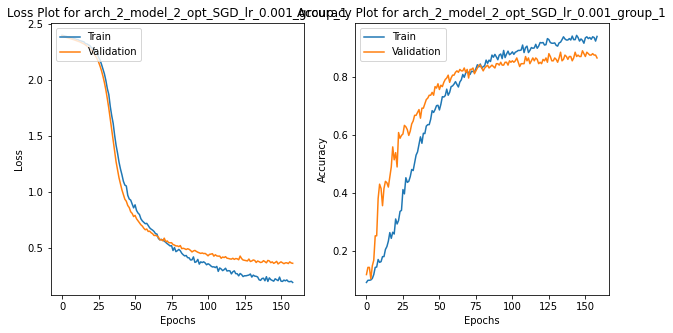

29/29 [==============================] - 1s 37ms/step - loss: 0.4533 - accuracy: 0.8696
arch_2_model_2_group_1_opt_SGD_lr_0.01
Epoch 1/250
26/26 [==============================] - 2s 53ms/step - loss: 2.4039 - accuracy: 0.1079 - val_loss: 2.3482 - val_accuracy: 0.2178
Epoch 2/250
26/26 [==============================] - 1s 48ms/step - loss: 2.3452 - accuracy: 0.1655 - val_loss: 2.2487 - val_accuracy: 0.5396
Epoch 3/250
26/26 [==============================] - 1s 47ms/step - loss: 2.2131 - accuracy: 0.3426 - val_loss: 1.8096 - val_accuracy: 0.6139
Epoch 4/250
26/26 [==============================] - 1s 46ms/step - loss: 1.6833 - accuracy: 0.5481 - val_loss: 1.0664 - val_accuracy: 0.6881
Epoch 5/250
26/26 [==============================] - 1s 48ms/step - loss: 1.1358 - accuracy: 0.6308 - val_loss: 0.9224 - val_accuracy: 0.6683
Epoch 6/250
26/26 [==============================] - 1s 49ms/step - loss: 0.9577 - accuracy: 0.6421 - val_loss: 0.7527 - val_accuracy: 0.7723
Epoch 7/250
26/26 [==

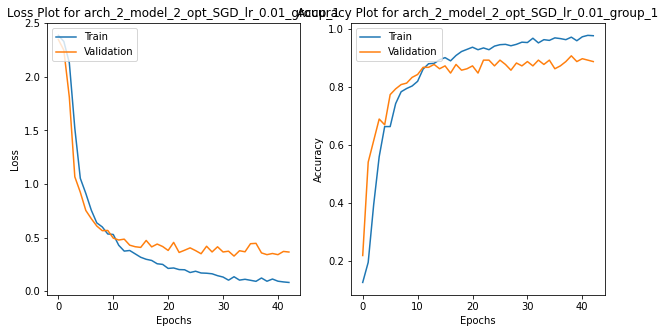

29/29 [==============================] - 1s 37ms/step - loss: 0.4752 - accuracy: 0.8804
arch_2_model_2_group_1_opt_Adam_lr_0.001
Epoch 1/250
26/26 [==============================] - 2s 53ms/step - loss: 2.3676 - accuracy: 0.1409 - val_loss: 1.9025 - val_accuracy: 0.4158
Epoch 2/250
26/26 [==============================] - 1s 46ms/step - loss: 1.6372 - accuracy: 0.5015 - val_loss: 0.9539 - val_accuracy: 0.7079
Epoch 3/250
26/26 [==============================] - 1s 47ms/step - loss: 0.9683 - accuracy: 0.6690 - val_loss: 0.7903 - val_accuracy: 0.7426
Epoch 4/250
26/26 [==============================] - 1s 47ms/step - loss: 0.7966 - accuracy: 0.7337 - val_loss: 0.6793 - val_accuracy: 0.7921
Epoch 5/250
26/26 [==============================] - 1s 49ms/step - loss: 0.5827 - accuracy: 0.8163 - val_loss: 0.6606 - val_accuracy: 0.7970
Epoch 6/250
26/26 [==============================] - 1s 47ms/step - loss: 0.4607 - accuracy: 0.8380 - val_loss: 0.5548 - val_accuracy: 0.8366
Epoch 7/250
26/26 [

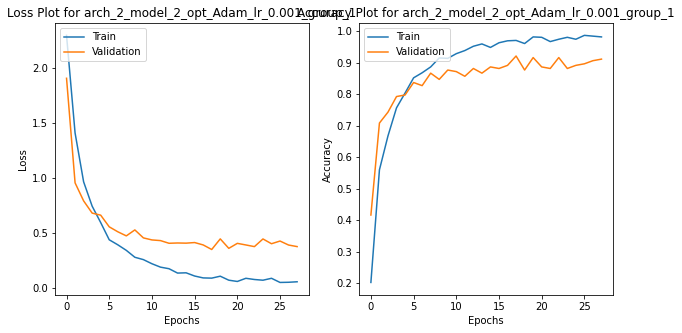

29/29 [==============================] - 1s 38ms/step - loss: 0.5911 - accuracy: 0.8761
arch_2_model_2_group_1_opt_Adam_lr_0.01
Epoch 1/250
26/26 [==============================] - 2s 53ms/step - loss: 3.1520 - accuracy: 0.0791 - val_loss: 2.3801 - val_accuracy: 0.0990
Epoch 2/250
26/26 [==============================] - 1s 48ms/step - loss: 2.3834 - accuracy: 0.1135 - val_loss: 2.3798 - val_accuracy: 0.0990
Epoch 3/250
26/26 [==============================] - 1s 46ms/step - loss: 2.3789 - accuracy: 0.1001 - val_loss: 2.3790 - val_accuracy: 0.0990
Epoch 4/250
26/26 [==============================] - 1s 48ms/step - loss: 2.3789 - accuracy: 0.0973 - val_loss: 2.3784 - val_accuracy: 0.0990
Epoch 5/250
26/26 [==============================] - 1s 48ms/step - loss: 2.3824 - accuracy: 0.0906 - val_loss: 2.3783 - val_accuracy: 0.0990
Epoch 6/250
26/26 [==============================] - 1s 48ms/step - loss: 2.3734 - accuracy: 0.0681 - val_loss: 2.3782 - val_accuracy: 0.0990
Epoch 7/250
26/26 [=

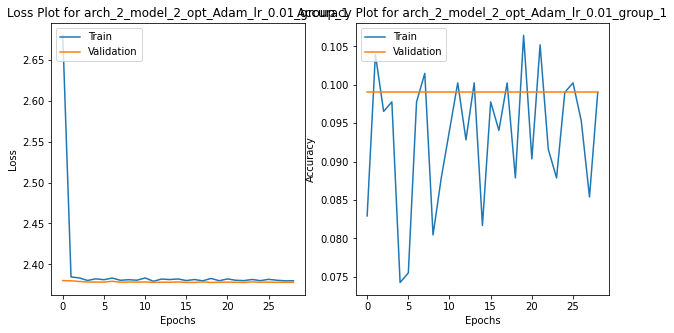

29/29 [==============================] - 1s 37ms/step - loss: 2.3315 - accuracy: 0.1078
arch_3_model_1_group_1_opt_SGD_lr_0.001
Epoch 1/250
26/26 [==============================] - 2s 53ms/step - loss: 2.4076 - accuracy: 0.0967 - val_loss: 2.3971 - val_accuracy: 0.0990
Epoch 2/250
26/26 [==============================] - 1s 48ms/step - loss: 2.4036 - accuracy: 0.0956 - val_loss: 2.3951 - val_accuracy: 0.0990
Epoch 3/250
26/26 [==============================] - 1s 47ms/step - loss: 2.4005 - accuracy: 0.0948 - val_loss: 2.3931 - val_accuracy: 0.0990
Epoch 4/250
26/26 [==============================] - 1s 48ms/step - loss: 2.3901 - accuracy: 0.1113 - val_loss: 2.3915 - val_accuracy: 0.0990
Epoch 5/250
26/26 [==============================] - 1s 47ms/step - loss: 2.3916 - accuracy: 0.1033 - val_loss: 2.3898 - val_accuracy: 0.0990
Epoch 6/250
26/26 [==============================] - 1s 48ms/step - loss: 2.3888 - accuracy: 0.1166 - val_loss: 2.3894 - val_accuracy: 0.0990
Epoch 7/250
26/26 [=

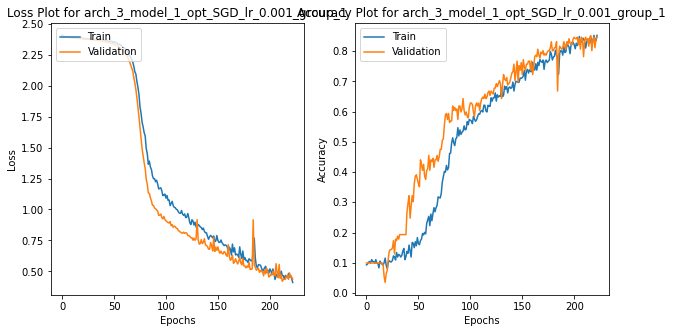

29/29 [==============================] - 1s 38ms/step - loss: 0.4567 - accuracy: 0.8750
arch_3_model_1_group_1_opt_SGD_lr_0.01
Epoch 1/250
26/26 [==============================] - 2s 53ms/step - loss: 2.4023 - accuracy: 0.0983 - val_loss: 2.3870 - val_accuracy: 0.0990
Epoch 2/250
26/26 [==============================] - 1s 46ms/step - loss: 2.3888 - accuracy: 0.1034 - val_loss: 2.3710 - val_accuracy: 0.2624
Epoch 3/250
26/26 [==============================] - 1s 47ms/step - loss: 2.3687 - accuracy: 0.1640 - val_loss: 2.3477 - val_accuracy: 0.3267
Epoch 4/250
26/26 [==============================] - 1s 46ms/step - loss: 2.3411 - accuracy: 0.2024 - val_loss: 2.2853 - val_accuracy: 0.2970
Epoch 5/250
26/26 [==============================] - 1s 45ms/step - loss: 2.2872 - accuracy: 0.2196 - val_loss: 2.0912 - val_accuracy: 0.2822
Epoch 6/250
26/26 [==============================] - 1s 47ms/step - loss: 2.1113 - accuracy: 0.2239 - val_loss: 1.7191 - val_accuracy: 0.3812
Epoch 7/250
26/26 [==

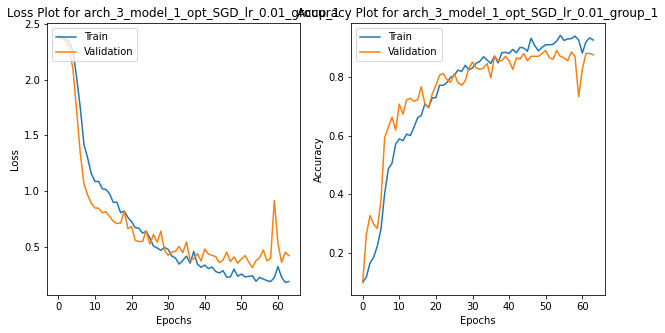

29/29 [==============================] - 1s 37ms/step - loss: 0.4414 - accuracy: 0.8912
arch_3_model_1_group_1_opt_Adam_lr_0.001
Epoch 1/250
26/26 [==============================] - 2s 53ms/step - loss: 2.4060 - accuracy: 0.1015 - val_loss: 2.3851 - val_accuracy: 0.0990
Epoch 2/250
26/26 [==============================] - 1s 47ms/step - loss: 2.3903 - accuracy: 0.0730 - val_loss: 2.3772 - val_accuracy: 0.1188
Epoch 3/250
26/26 [==============================] - 1s 46ms/step - loss: 2.3845 - accuracy: 0.0885 - val_loss: 2.3175 - val_accuracy: 0.1881
Epoch 4/250
26/26 [==============================] - 1s 47ms/step - loss: 2.2394 - accuracy: 0.1974 - val_loss: 1.7340 - val_accuracy: 0.3564
Epoch 5/250
26/26 [==============================] - 1s 46ms/step - loss: 1.6859 - accuracy: 0.3758 - val_loss: 1.1632 - val_accuracy: 0.5842
Epoch 6/250
26/26 [==============================] - 1s 47ms/step - loss: 1.2019 - accuracy: 0.5636 - val_loss: 0.9165 - val_accuracy: 0.6386
Epoch 7/250
26/26 [

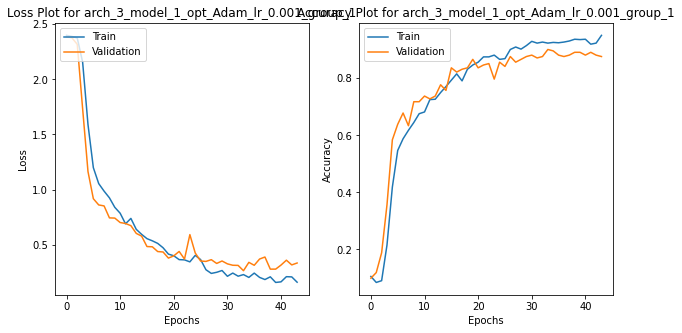

29/29 [==============================] - 1s 37ms/step - loss: 0.3252 - accuracy: 0.9192
arch_3_model_1_group_1_opt_Adam_lr_0.01
Epoch 1/250
26/26 [==============================] - 2s 53ms/step - loss: 2.3965 - accuracy: 0.1038 - val_loss: 2.0034 - val_accuracy: 0.3812
Epoch 2/250
26/26 [==============================] - 1s 46ms/step - loss: 1.9103 - accuracy: 0.3158 - val_loss: 1.5504 - val_accuracy: 0.3762
Epoch 3/250
26/26 [==============================] - 1s 47ms/step - loss: 1.5414 - accuracy: 0.3635 - val_loss: 1.4535 - val_accuracy: 0.3663
Epoch 4/250
26/26 [==============================] - 1s 47ms/step - loss: 1.4937 - accuracy: 0.3277 - val_loss: 1.3948 - val_accuracy: 0.3663
Epoch 5/250
26/26 [==============================] - 1s 47ms/step - loss: 1.4227 - accuracy: 0.3765 - val_loss: 1.3860 - val_accuracy: 0.3713
Epoch 6/250
26/26 [==============================] - 1s 52ms/step - loss: 1.3776 - accuracy: 0.3760 - val_loss: 1.3220 - val_accuracy: 0.4109
Epoch 7/250
26/26 [=

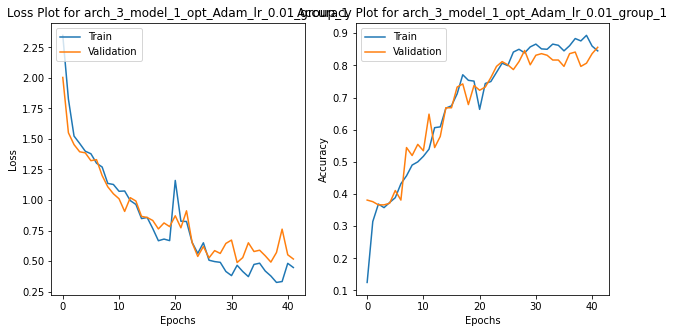

29/29 [==============================] - 1s 37ms/step - loss: 0.6205 - accuracy: 0.8621
arch_3_model_2_group_1_opt_SGD_lr_0.001
Epoch 1/250
26/26 [==============================] - 2s 52ms/step - loss: 2.4046 - accuracy: 0.0826 - val_loss: 2.3990 - val_accuracy: 0.0693
Epoch 2/250
26/26 [==============================] - 1s 47ms/step - loss: 2.3967 - accuracy: 0.1038 - val_loss: 2.3969 - val_accuracy: 0.0990
Epoch 3/250
26/26 [==============================] - 1s 47ms/step - loss: 2.3992 - accuracy: 0.0934 - val_loss: 2.3952 - val_accuracy: 0.1089
Epoch 4/250
26/26 [==============================] - 1s 48ms/step - loss: 2.3966 - accuracy: 0.1026 - val_loss: 2.3941 - val_accuracy: 0.0941
Epoch 5/250
26/26 [==============================] - 1s 48ms/step - loss: 2.3942 - accuracy: 0.1116 - val_loss: 2.3927 - val_accuracy: 0.0990
Epoch 6/250
26/26 [==============================] - 1s 47ms/step - loss: 2.3919 - accuracy: 0.1047 - val_loss: 2.3913 - val_accuracy: 0.0990
Epoch 7/250
26/26 [=

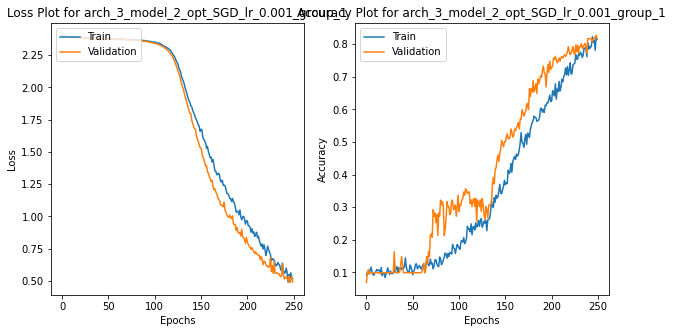

29/29 [==============================] - 1s 37ms/step - loss: 0.4382 - accuracy: 0.8534
arch_3_model_2_group_1_opt_SGD_lr_0.01
Epoch 1/250
26/26 [==============================] - 2s 55ms/step - loss: 2.3974 - accuracy: 0.0964 - val_loss: 2.3879 - val_accuracy: 0.0990
Epoch 2/250
26/26 [==============================] - 1s 53ms/step - loss: 2.3895 - accuracy: 0.1007 - val_loss: 2.3822 - val_accuracy: 0.0990
Epoch 3/250
26/26 [==============================] - 1s 46ms/step - loss: 2.3891 - accuracy: 0.0998 - val_loss: 2.3789 - val_accuracy: 0.1485
Epoch 4/250
26/26 [==============================] - 1s 47ms/step - loss: 2.3839 - accuracy: 0.1098 - val_loss: 2.3775 - val_accuracy: 0.1931
Epoch 5/250
26/26 [==============================] - 1s 47ms/step - loss: 2.3732 - accuracy: 0.1143 - val_loss: 2.3755 - val_accuracy: 0.0990
Epoch 6/250
26/26 [==============================] - 1s 49ms/step - loss: 2.3806 - accuracy: 0.1026 - val_loss: 2.3732 - val_accuracy: 0.0990
Epoch 7/250
26/26 [==

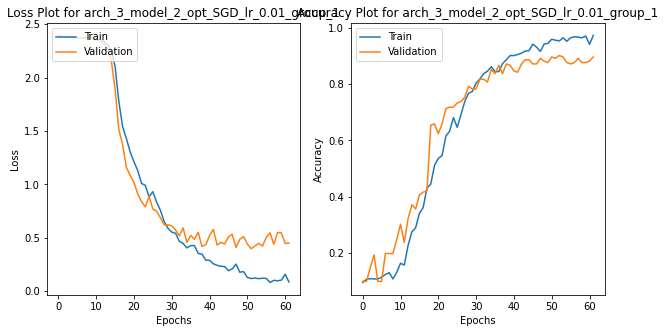

29/29 [==============================] - 1s 37ms/step - loss: 0.5972 - accuracy: 0.8739
arch_3_model_2_group_1_opt_Adam_lr_0.001
Epoch 1/250
26/26 [==============================] - 2s 55ms/step - loss: 2.3954 - accuracy: 0.0961 - val_loss: 2.3821 - val_accuracy: 0.1040
Epoch 2/250
26/26 [==============================] - 1s 48ms/step - loss: 2.3835 - accuracy: 0.0982 - val_loss: 2.3669 - val_accuracy: 0.1139
Epoch 3/250
26/26 [==============================] - 1s 48ms/step - loss: 2.3437 - accuracy: 0.1748 - val_loss: 1.9176 - val_accuracy: 0.2970
Epoch 4/250
26/26 [==============================] - 1s 53ms/step - loss: 1.8433 - accuracy: 0.2967 - val_loss: 1.3533 - val_accuracy: 0.4059
Epoch 5/250
26/26 [==============================] - 1s 46ms/step - loss: 1.4739 - accuracy: 0.3981 - val_loss: 1.1433 - val_accuracy: 0.5842
Epoch 6/250
26/26 [==============================] - 1s 48ms/step - loss: 1.1956 - accuracy: 0.5163 - val_loss: 0.9464 - val_accuracy: 0.6386
Epoch 7/250
26/26 [

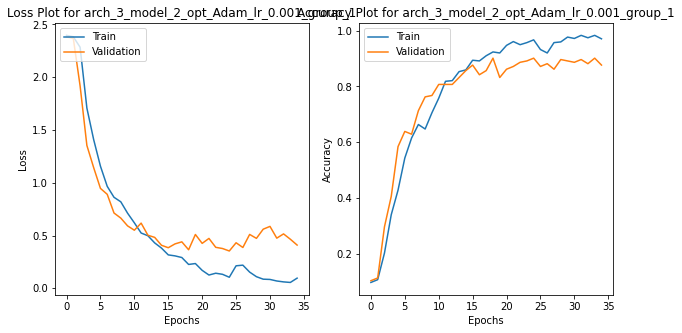

29/29 [==============================] - 1s 38ms/step - loss: 0.6136 - accuracy: 0.8869
arch_3_model_2_group_1_opt_Adam_lr_0.01
Epoch 1/250
26/26 [==============================] - 2s 53ms/step - loss: 2.5661 - accuracy: 0.1061 - val_loss: 2.3853 - val_accuracy: 0.0990
Epoch 2/250
26/26 [==============================] - 1s 47ms/step - loss: 2.3836 - accuracy: 0.0878 - val_loss: 2.3787 - val_accuracy: 0.0990
Epoch 3/250
26/26 [==============================] - 1s 46ms/step - loss: 2.3713 - accuracy: 0.0998 - val_loss: 2.3783 - val_accuracy: 0.0990
Epoch 4/250
26/26 [==============================] - 1s 46ms/step - loss: 2.3703 - accuracy: 0.0905 - val_loss: 2.3788 - val_accuracy: 0.0990
Epoch 5/250
26/26 [==============================] - 1s 48ms/step - loss: 2.3787 - accuracy: 0.1011 - val_loss: 2.3786 - val_accuracy: 0.0990
Epoch 6/250
26/26 [==============================] - 1s 48ms/step - loss: 2.3794 - accuracy: 0.0963 - val_loss: 2.3780 - val_accuracy: 0.0990
Epoch 7/250
26/26 [=

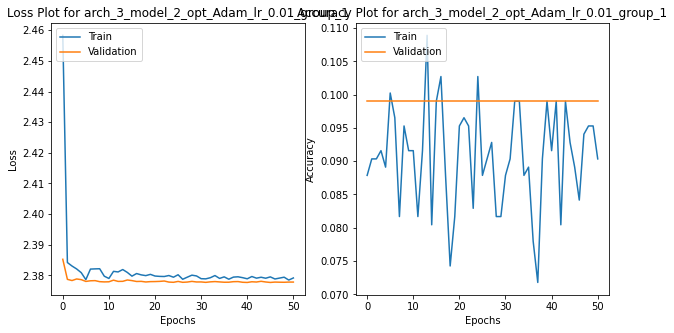

29/29 [==============================] - 1s 37ms/step - loss: 2.3321 - accuracy: 0.1078
arch_3_model_3_group_1_opt_SGD_lr_0.001
Epoch 1/250
26/26 [==============================] - 2s 56ms/step - loss: 2.4065 - accuracy: 0.0888 - val_loss: 2.3952 - val_accuracy: 0.1089
Epoch 2/250
26/26 [==============================] - 1s 49ms/step - loss: 2.3972 - accuracy: 0.0885 - val_loss: 2.3915 - val_accuracy: 0.1238
Epoch 3/250
26/26 [==============================] - 1s 48ms/step - loss: 2.3942 - accuracy: 0.0925 - val_loss: 2.3877 - val_accuracy: 0.1733
Epoch 4/250
26/26 [==============================] - 1s 49ms/step - loss: 2.3876 - accuracy: 0.1130 - val_loss: 2.3836 - val_accuracy: 0.1832
Epoch 5/250
26/26 [==============================] - 1s 46ms/step - loss: 2.3903 - accuracy: 0.1238 - val_loss: 2.3796 - val_accuracy: 0.1634
Epoch 6/250
26/26 [==============================] - 1s 49ms/step - loss: 2.3843 - accuracy: 0.1141 - val_loss: 2.3762 - val_accuracy: 0.1386
Epoch 7/250
26/26 [=

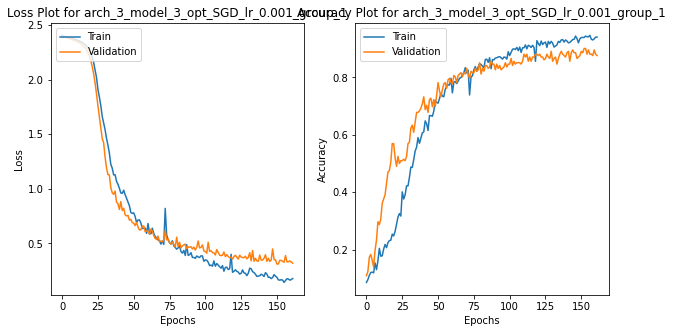

29/29 [==============================] - 1s 38ms/step - loss: 0.3573 - accuracy: 0.9116
arch_3_model_3_group_1_opt_SGD_lr_0.01
Epoch 1/250
26/26 [==============================] - 2s 55ms/step - loss: 2.3921 - accuracy: 0.1118 - val_loss: 2.3828 - val_accuracy: 0.0990
Epoch 2/250
26/26 [==============================] - 1s 47ms/step - loss: 2.3927 - accuracy: 0.1015 - val_loss: 2.3733 - val_accuracy: 0.0990
Epoch 3/250
26/26 [==============================] - 1s 47ms/step - loss: 2.3806 - accuracy: 0.0826 - val_loss: 2.3666 - val_accuracy: 0.2030
Epoch 4/250
26/26 [==============================] - 1s 47ms/step - loss: 2.3633 - accuracy: 0.1684 - val_loss: 2.3419 - val_accuracy: 0.3465
Epoch 5/250
26/26 [==============================] - 1s 48ms/step - loss: 2.3419 - accuracy: 0.2197 - val_loss: 2.2128 - val_accuracy: 0.3614
Epoch 6/250
26/26 [==============================] - 1s 46ms/step - loss: 2.1289 - accuracy: 0.2772 - val_loss: 1.5930 - val_accuracy: 0.4455
Epoch 7/250
26/26 [==

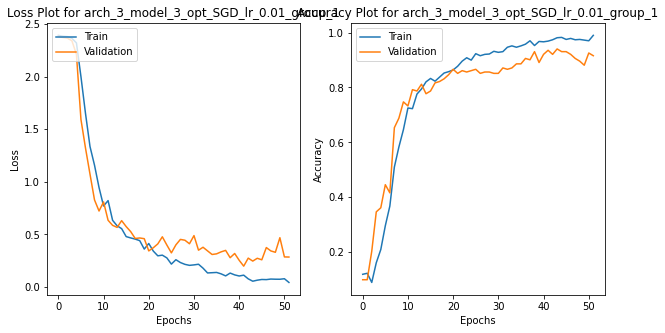

29/29 [==============================] - 1s 37ms/step - loss: 0.5499 - accuracy: 0.8858
arch_3_model_3_group_1_opt_Adam_lr_0.001
Epoch 1/250
26/26 [==============================] - 2s 54ms/step - loss: 2.3919 - accuracy: 0.1140 - val_loss: 2.1739 - val_accuracy: 0.2822
Epoch 2/250
26/26 [==============================] - 1s 48ms/step - loss: 1.7985 - accuracy: 0.3945 - val_loss: 0.9504 - val_accuracy: 0.7129
Epoch 3/250
26/26 [==============================] - 1s 47ms/step - loss: 1.0124 - accuracy: 0.6229 - val_loss: 0.7886 - val_accuracy: 0.7228
Epoch 4/250
26/26 [==============================] - 1s 48ms/step - loss: 0.8947 - accuracy: 0.6724 - val_loss: 0.5243 - val_accuracy: 0.8267
Epoch 5/250
26/26 [==============================] - 1s 46ms/step - loss: 0.5961 - accuracy: 0.7783 - val_loss: 0.6652 - val_accuracy: 0.7475
Epoch 6/250
26/26 [==============================] - 1s 48ms/step - loss: 0.4942 - accuracy: 0.8065 - val_loss: 0.4397 - val_accuracy: 0.8218
Epoch 7/250
26/26 [

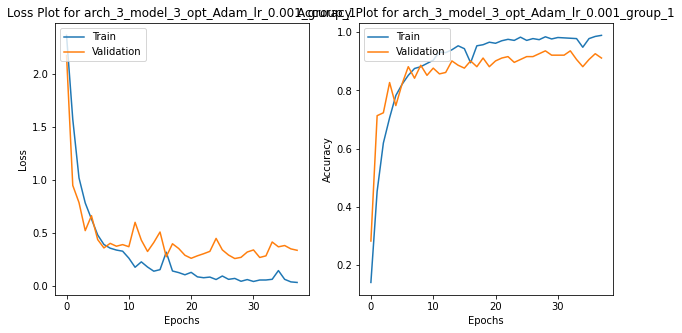

29/29 [==============================] - 1s 38ms/step - loss: 0.4675 - accuracy: 0.9127
arch_3_model_3_group_1_opt_Adam_lr_0.01
Epoch 1/250
26/26 [==============================] - 2s 54ms/step - loss: 3.8850 - accuracy: 0.0892 - val_loss: 2.3818 - val_accuracy: 0.0990
Epoch 2/250
26/26 [==============================] - 1s 48ms/step - loss: 2.3922 - accuracy: 0.0643 - val_loss: 2.3791 - val_accuracy: 0.0990
Epoch 3/250
26/26 [==============================] - 1s 47ms/step - loss: 2.3784 - accuracy: 0.1031 - val_loss: 2.3804 - val_accuracy: 0.0990
Epoch 4/250
26/26 [==============================] - 1s 52ms/step - loss: 2.3820 - accuracy: 0.0920 - val_loss: 2.3787 - val_accuracy: 0.0990
Epoch 5/250
26/26 [==============================] - 1s 51ms/step - loss: 2.3852 - accuracy: 0.0924 - val_loss: 2.3785 - val_accuracy: 0.0990
Epoch 6/250
26/26 [==============================] - 1s 49ms/step - loss: 2.3821 - accuracy: 0.1022 - val_loss: 2.3781 - val_accuracy: 0.0990
Epoch 7/250
26/26 [=

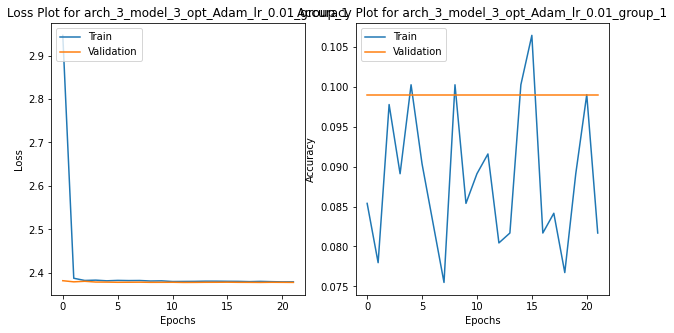

29/29 [==============================] - 1s 39ms/step - loss: 2.3314 - accuracy: 0.1078
Found 800 images belonging to 10 classes.
Found 200 images belonging to 10 classes.
Found 1000 images belonging to 10 classes.
arch_1_model_1_group_2_opt_SGD_lr_0.001
Epoch 1/250
25/25 [==============================] - 260s 10s/step - loss: 2.4147 - accuracy: 0.0968 - val_loss: 2.3034 - val_accuracy: 0.1200
Epoch 2/250
25/25 [==============================] - 1s 47ms/step - loss: 2.3475 - accuracy: 0.1159 - val_loss: 2.2940 - val_accuracy: 0.1000
Epoch 3/250
25/25 [==============================] - 1s 47ms/step - loss: 2.3170 - accuracy: 0.1094 - val_loss: 2.2990 - val_accuracy: 0.1350
Epoch 4/250
25/25 [==============================] - 1s 50ms/step - loss: 2.3176 - accuracy: 0.1150 - val_loss: 2.2933 - val_accuracy: 0.1650
Epoch 5/250
25/25 [==============================] - 1s 53ms/step - loss: 2.2972 - accuracy: 0.1189 - val_loss: 2.2856 - val_accuracy: 0.1100
Epoch 6/250
25/25 [===============

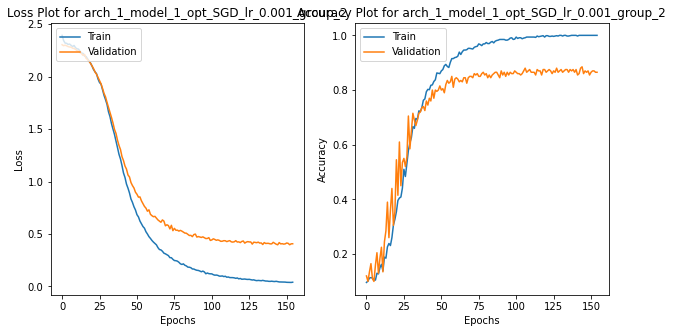

32/32 [==============================] - 176s 6s/step - loss: 0.5374 - accuracy: 0.8450
arch_1_model_1_group_2_opt_SGD_lr_0.01
Epoch 1/250
25/25 [==============================] - 2s 54ms/step - loss: 2.3448 - accuracy: 0.1007 - val_loss: 2.2798 - val_accuracy: 0.1750
Epoch 2/250
25/25 [==============================] - 1s 49ms/step - loss: 2.2632 - accuracy: 0.1746 - val_loss: 2.1779 - val_accuracy: 0.4750
Epoch 3/250
25/25 [==============================] - 1s 48ms/step - loss: 2.1141 - accuracy: 0.4482 - val_loss: 1.9332 - val_accuracy: 0.5150
Epoch 4/250
25/25 [==============================] - 1s 47ms/step - loss: 1.7924 - accuracy: 0.6157 - val_loss: 1.4844 - val_accuracy: 0.6400
Epoch 5/250
25/25 [==============================] - 1s 48ms/step - loss: 1.2489 - accuracy: 0.7291 - val_loss: 1.0201 - val_accuracy: 0.7400
Epoch 6/250
25/25 [==============================] - 1s 49ms/step - loss: 0.7722 - accuracy: 0.8432 - val_loss: 0.7989 - val_accuracy: 0.7750
Epoch 7/250
25/25 [==

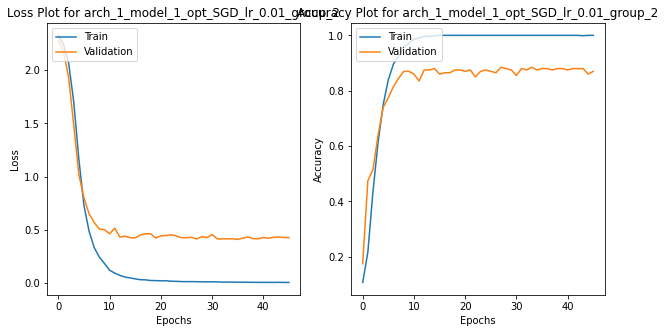

32/32 [==============================] - 1s 36ms/step - loss: 0.6030 - accuracy: 0.8400
arch_1_model_1_group_2_opt_Adam_lr_0.001
Epoch 1/250
25/25 [==============================] - 2s 60ms/step - loss: 2.7866 - accuracy: 0.1051 - val_loss: 2.1591 - val_accuracy: 0.2500
Epoch 2/250
25/25 [==============================] - 1s 49ms/step - loss: 2.0314 - accuracy: 0.3637 - val_loss: 1.7309 - val_accuracy: 0.5750
Epoch 3/250
25/25 [==============================] - 1s 49ms/step - loss: 1.4979 - accuracy: 0.7318 - val_loss: 1.3717 - val_accuracy: 0.6450
Epoch 4/250
25/25 [==============================] - 1s 48ms/step - loss: 1.1167 - accuracy: 0.7634 - val_loss: 1.1056 - val_accuracy: 0.7000
Epoch 5/250
25/25 [==============================] - 1s 49ms/step - loss: 0.7852 - accuracy: 0.8637 - val_loss: 0.8764 - val_accuracy: 0.7500
Epoch 6/250
25/25 [==============================] - 1s 49ms/step - loss: 0.5776 - accuracy: 0.8987 - val_loss: 0.7537 - val_accuracy: 0.7450
Epoch 7/250
25/25 [

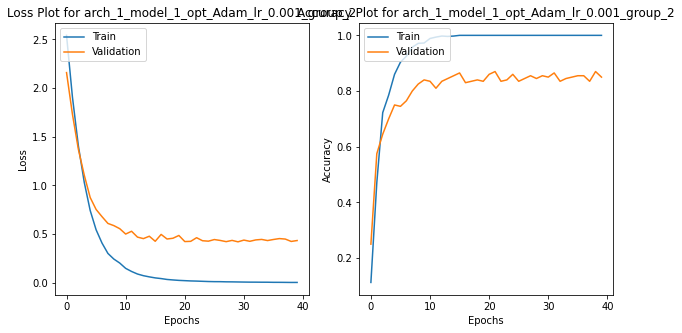

32/32 [==============================] - 1s 37ms/step - loss: 0.6472 - accuracy: 0.8370
arch_1_model_1_group_2_opt_Adam_lr_0.01
Epoch 1/250
25/25 [==============================] - 2s 58ms/step - loss: 8.1732 - accuracy: 0.1330 - val_loss: 1.9661 - val_accuracy: 0.4450
Epoch 2/250
25/25 [==============================] - 1s 49ms/step - loss: 1.5434 - accuracy: 0.5378 - val_loss: 0.9412 - val_accuracy: 0.7050
Epoch 3/250
25/25 [==============================] - 1s 49ms/step - loss: 0.4777 - accuracy: 0.8656 - val_loss: 0.6348 - val_accuracy: 0.8100
Epoch 4/250
25/25 [==============================] - 1s 50ms/step - loss: 0.2169 - accuracy: 0.9297 - val_loss: 0.6792 - val_accuracy: 0.7750
Epoch 5/250
25/25 [==============================] - 1s 49ms/step - loss: 0.1214 - accuracy: 0.9652 - val_loss: 0.7524 - val_accuracy: 0.7900
Epoch 6/250
25/25 [==============================] - 1s 48ms/step - loss: 0.0698 - accuracy: 0.9789 - val_loss: 0.7532 - val_accuracy: 0.8050
Epoch 7/250
25/25 [=

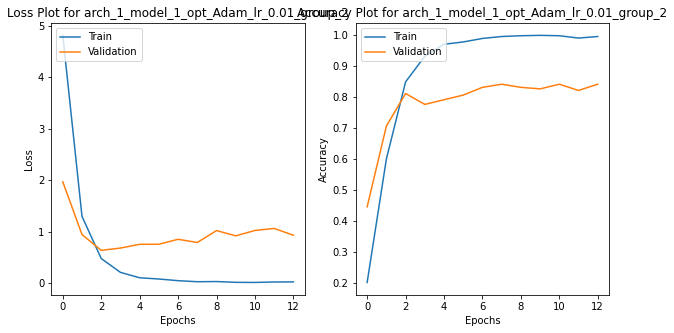

32/32 [==============================] - 1s 36ms/step - loss: 0.7948 - accuracy: 0.7520
arch_1_model_2_group_2_opt_SGD_lr_0.001
Epoch 1/250
25/25 [==============================] - 2s 61ms/step - loss: 2.3399 - accuracy: 0.1016 - val_loss: 2.3029 - val_accuracy: 0.0950
Epoch 2/250
25/25 [==============================] - 1s 50ms/step - loss: 2.3013 - accuracy: 0.1120 - val_loss: 2.2901 - val_accuracy: 0.1400
Epoch 3/250
25/25 [==============================] - 1s 48ms/step - loss: 2.2845 - accuracy: 0.1204 - val_loss: 2.2779 - val_accuracy: 0.1850
Epoch 4/250
25/25 [==============================] - 1s 50ms/step - loss: 2.2686 - accuracy: 0.1911 - val_loss: 2.2644 - val_accuracy: 0.2050
Epoch 5/250
25/25 [==============================] - 1s 49ms/step - loss: 2.2602 - accuracy: 0.1722 - val_loss: 2.2504 - val_accuracy: 0.2650
Epoch 6/250
25/25 [==============================] - 1s 48ms/step - loss: 2.2468 - accuracy: 0.1986 - val_loss: 2.2371 - val_accuracy: 0.3550
Epoch 7/250
25/25 [=

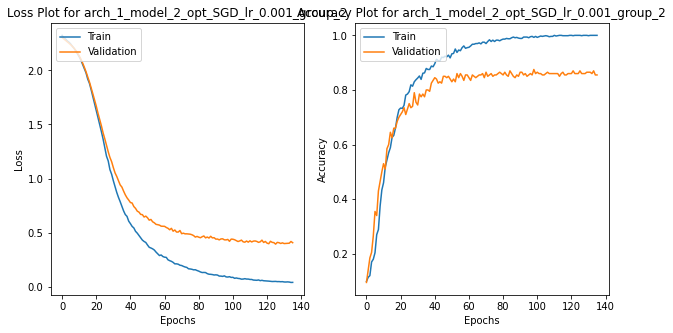

32/32 [==============================] - 1s 36ms/step - loss: 0.5622 - accuracy: 0.8310
arch_1_model_2_group_2_opt_SGD_lr_0.01
Epoch 1/250
25/25 [==============================] - 2s 54ms/step - loss: 2.3535 - accuracy: 0.1095 - val_loss: 2.2760 - val_accuracy: 0.1950
Epoch 2/250
25/25 [==============================] - 1s 49ms/step - loss: 2.2596 - accuracy: 0.2248 - val_loss: 2.1878 - val_accuracy: 0.3850
Epoch 3/250
25/25 [==============================] - 1s 49ms/step - loss: 2.1390 - accuracy: 0.3981 - val_loss: 1.9727 - val_accuracy: 0.6300
Epoch 4/250
25/25 [==============================] - 1s 49ms/step - loss: 1.8708 - accuracy: 0.6453 - val_loss: 1.5777 - val_accuracy: 0.6550
Epoch 5/250
25/25 [==============================] - 1s 49ms/step - loss: 1.3720 - accuracy: 0.7085 - val_loss: 1.1283 - val_accuracy: 0.7150
Epoch 6/250
25/25 [==============================] - 1s 49ms/step - loss: 0.8714 - accuracy: 0.8305 - val_loss: 0.8669 - val_accuracy: 0.7400
Epoch 7/250
25/25 [==

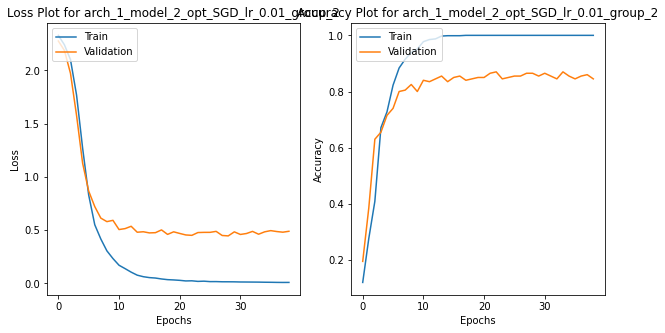

32/32 [==============================] - 1s 36ms/step - loss: 0.7164 - accuracy: 0.8020
arch_1_model_2_group_2_opt_Adam_lr_0.001
Epoch 1/250
25/25 [==============================] - 2s 54ms/step - loss: 2.6977 - accuracy: 0.1008 - val_loss: 2.1324 - val_accuracy: 0.2050
Epoch 2/250
25/25 [==============================] - 1s 48ms/step - loss: 1.9868 - accuracy: 0.4136 - val_loss: 1.7678 - val_accuracy: 0.5250
Epoch 3/250
25/25 [==============================] - 1s 50ms/step - loss: 1.5804 - accuracy: 0.6285 - val_loss: 1.4363 - val_accuracy: 0.6600
Epoch 4/250
25/25 [==============================] - 1s 49ms/step - loss: 1.2067 - accuracy: 0.7302 - val_loss: 1.2050 - val_accuracy: 0.6900
Epoch 5/250
25/25 [==============================] - 1s 50ms/step - loss: 0.9300 - accuracy: 0.8341 - val_loss: 0.9939 - val_accuracy: 0.7450
Epoch 6/250
25/25 [==============================] - 1s 49ms/step - loss: 0.7280 - accuracy: 0.8504 - val_loss: 0.8632 - val_accuracy: 0.7750
Epoch 7/250
25/25 [

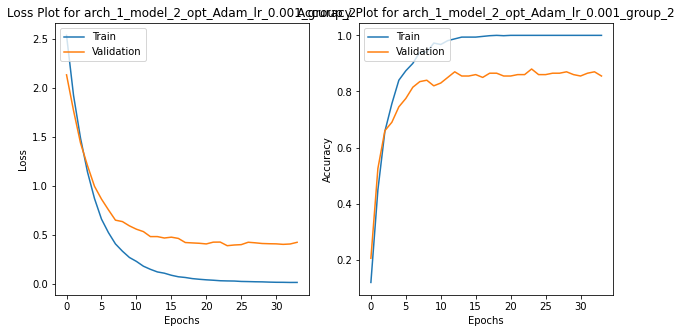

32/32 [==============================] - 1s 36ms/step - loss: 0.6203 - accuracy: 0.8250
arch_1_model_2_group_2_opt_Adam_lr_0.01
Epoch 1/250
25/25 [==============================] - 2s 56ms/step - loss: 4.1960 - accuracy: 0.2014 - val_loss: 1.7063 - val_accuracy: 0.6450
Epoch 2/250
25/25 [==============================] - 1s 49ms/step - loss: 1.2129 - accuracy: 0.6639 - val_loss: 0.7423 - val_accuracy: 0.7450
Epoch 3/250
25/25 [==============================] - 1s 51ms/step - loss: 0.3427 - accuracy: 0.9028 - val_loss: 0.6185 - val_accuracy: 0.8100
Epoch 4/250
25/25 [==============================] - 1s 50ms/step - loss: 0.0989 - accuracy: 0.9739 - val_loss: 0.6674 - val_accuracy: 0.8000
Epoch 5/250
25/25 [==============================] - 1s 48ms/step - loss: 0.0450 - accuracy: 0.9884 - val_loss: 0.6204 - val_accuracy: 0.8200
Epoch 6/250
25/25 [==============================] - 1s 47ms/step - loss: 0.0193 - accuracy: 0.9961 - val_loss: 0.9236 - val_accuracy: 0.7950
Epoch 7/250
25/25 [=

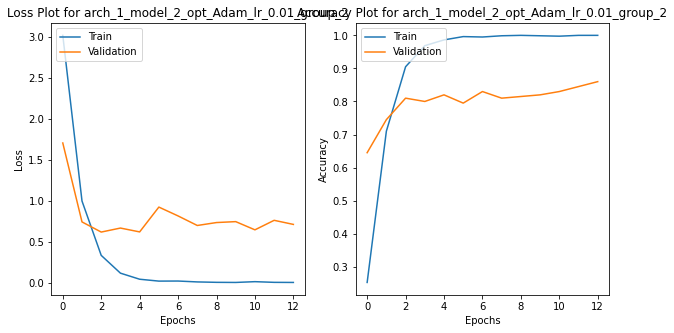

32/32 [==============================] - 1s 37ms/step - loss: 0.8028 - accuracy: 0.7660
arch_1_model_3_group_2_opt_SGD_lr_0.001
Epoch 1/250
25/25 [==============================] - 2s 54ms/step - loss: 2.3591 - accuracy: 0.1098 - val_loss: 2.3116 - val_accuracy: 0.1050
Epoch 2/250
25/25 [==============================] - 1s 49ms/step - loss: 2.3347 - accuracy: 0.0857 - val_loss: 2.3087 - val_accuracy: 0.1000
Epoch 3/250
25/25 [==============================] - 1s 48ms/step - loss: 2.3487 - accuracy: 0.0881 - val_loss: 2.3053 - val_accuracy: 0.1000
Epoch 4/250
25/25 [==============================] - 1s 50ms/step - loss: 2.3301 - accuracy: 0.1028 - val_loss: 2.3056 - val_accuracy: 0.1050
Epoch 5/250
25/25 [==============================] - 1s 49ms/step - loss: 2.3301 - accuracy: 0.0999 - val_loss: 2.3042 - val_accuracy: 0.1000
Epoch 6/250
25/25 [==============================] - 1s 48ms/step - loss: 2.3141 - accuracy: 0.1073 - val_loss: 2.3018 - val_accuracy: 0.1250
Epoch 7/250
25/25 [=

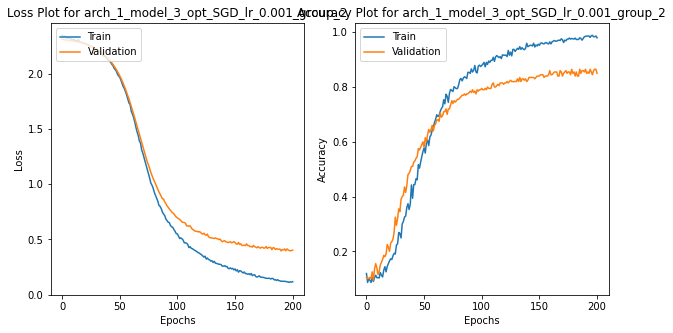

32/32 [==============================] - 1s 36ms/step - loss: 0.5394 - accuracy: 0.8300
arch_1_model_3_group_2_opt_SGD_lr_0.01
Epoch 1/250
25/25 [==============================] - 2s 55ms/step - loss: 2.3211 - accuracy: 0.0863 - val_loss: 2.2728 - val_accuracy: 0.1700
Epoch 2/250
25/25 [==============================] - 1s 47ms/step - loss: 2.2589 - accuracy: 0.1894 - val_loss: 2.2163 - val_accuracy: 0.3150
Epoch 3/250
25/25 [==============================] - 1s 50ms/step - loss: 2.1934 - accuracy: 0.3496 - val_loss: 2.1149 - val_accuracy: 0.4350
Epoch 4/250
25/25 [==============================] - 1s 49ms/step - loss: 2.0722 - accuracy: 0.4630 - val_loss: 1.9366 - val_accuracy: 0.5950
Epoch 5/250
25/25 [==============================] - 1s 49ms/step - loss: 1.8441 - accuracy: 0.5505 - val_loss: 1.6531 - val_accuracy: 0.6450
Epoch 6/250
25/25 [==============================] - 1s 49ms/step - loss: 1.5144 - accuracy: 0.6799 - val_loss: 1.3291 - val_accuracy: 0.7000
Epoch 7/250
25/25 [==

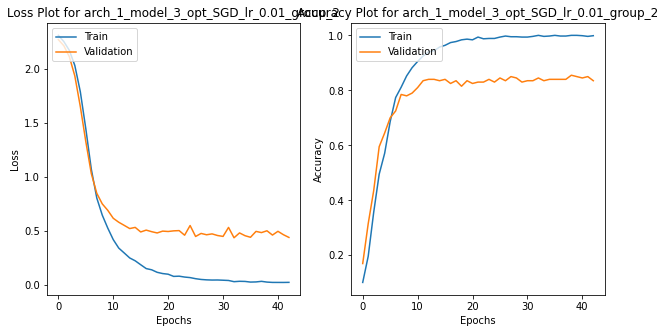

32/32 [==============================] - 1s 36ms/step - loss: 0.5686 - accuracy: 0.8280
arch_1_model_3_group_2_opt_Adam_lr_0.001
Epoch 1/250
25/25 [==============================] - 2s 55ms/step - loss: 2.3063 - accuracy: 0.1288 - val_loss: 2.0999 - val_accuracy: 0.2850
Epoch 2/250
25/25 [==============================] - 1s 49ms/step - loss: 1.9538 - accuracy: 0.4857 - val_loss: 1.6090 - val_accuracy: 0.6350
Epoch 3/250
25/25 [==============================] - 1s 49ms/step - loss: 1.3668 - accuracy: 0.7317 - val_loss: 1.1470 - val_accuracy: 0.7150
Epoch 4/250
25/25 [==============================] - 1s 49ms/step - loss: 0.8696 - accuracy: 0.8280 - val_loss: 0.8626 - val_accuracy: 0.7550
Epoch 5/250
25/25 [==============================] - 1s 49ms/step - loss: 0.5702 - accuracy: 0.8968 - val_loss: 0.7369 - val_accuracy: 0.7750
Epoch 6/250
25/25 [==============================] - 1s 49ms/step - loss: 0.4309 - accuracy: 0.8872 - val_loss: 0.5988 - val_accuracy: 0.8250
Epoch 7/250
25/25 [

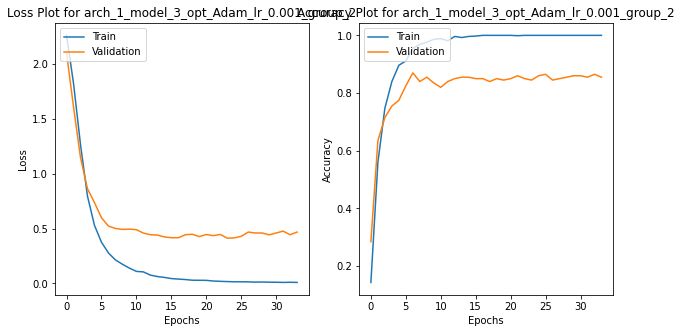

32/32 [==============================] - 1s 37ms/step - loss: 0.6779 - accuracy: 0.8270
arch_1_model_3_group_2_opt_Adam_lr_0.01
Epoch 1/250
25/25 [==============================] - 2s 55ms/step - loss: 2.4531 - accuracy: 0.1951 - val_loss: 1.1771 - val_accuracy: 0.6350
Epoch 2/250
25/25 [==============================] - 1s 49ms/step - loss: 0.8445 - accuracy: 0.7462 - val_loss: 0.6798 - val_accuracy: 0.7700
Epoch 3/250
25/25 [==============================] - 1s 52ms/step - loss: 0.3033 - accuracy: 0.9138 - val_loss: 0.6617 - val_accuracy: 0.8000
Epoch 4/250
25/25 [==============================] - 1s 49ms/step - loss: 0.1217 - accuracy: 0.9650 - val_loss: 0.5757 - val_accuracy: 0.8300
Epoch 5/250
25/25 [==============================] - 1s 48ms/step - loss: 0.0558 - accuracy: 0.9847 - val_loss: 0.5838 - val_accuracy: 0.8450
Epoch 6/250
25/25 [==============================] - 1s 47ms/step - loss: 0.0380 - accuracy: 0.9904 - val_loss: 0.4712 - val_accuracy: 0.8650
Epoch 7/250
25/25 [=

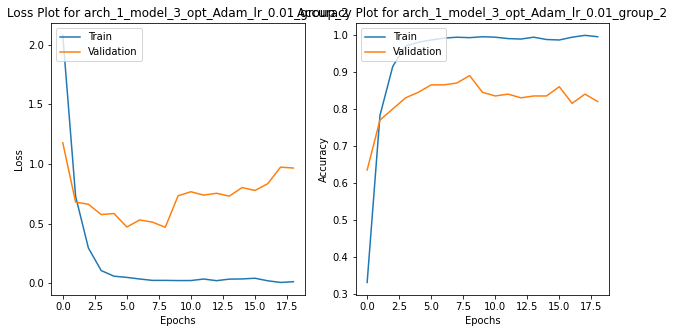

32/32 [==============================] - 1s 36ms/step - loss: 0.8384 - accuracy: 0.8020
arch_1_model_4_group_2_opt_SGD_lr_0.001
Epoch 1/250
25/25 [==============================] - 2s 60ms/step - loss: 2.4021 - accuracy: 0.0881 - val_loss: 2.2968 - val_accuracy: 0.1350
Epoch 2/250
25/25 [==============================] - 1s 50ms/step - loss: 2.3126 - accuracy: 0.1309 - val_loss: 2.2839 - val_accuracy: 0.1250
Epoch 3/250
25/25 [==============================] - 1s 51ms/step - loss: 2.3061 - accuracy: 0.1106 - val_loss: 2.2752 - val_accuracy: 0.1300
Epoch 4/250
25/25 [==============================] - 1s 51ms/step - loss: 2.2856 - accuracy: 0.1334 - val_loss: 2.2610 - val_accuracy: 0.1650
Epoch 5/250
25/25 [==============================] - 1s 50ms/step - loss: 2.2733 - accuracy: 0.1574 - val_loss: 2.2497 - val_accuracy: 0.2550
Epoch 6/250
25/25 [==============================] - 1s 50ms/step - loss: 2.2619 - accuracy: 0.1571 - val_loss: 2.2307 - val_accuracy: 0.3550
Epoch 7/250
25/25 [=

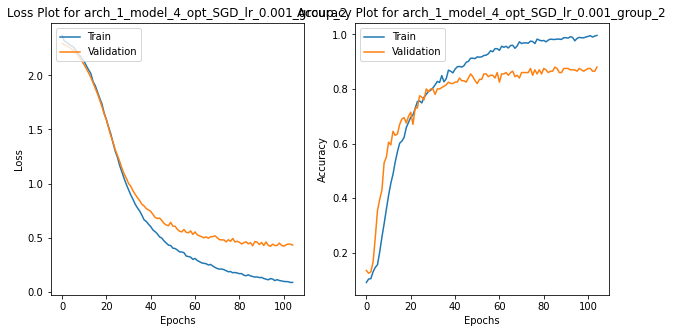

32/32 [==============================] - 1s 36ms/step - loss: 0.5819 - accuracy: 0.8140
arch_1_model_4_group_2_opt_SGD_lr_0.01
Epoch 1/250
25/25 [==============================] - 2s 54ms/step - loss: 2.3738 - accuracy: 0.1053 - val_loss: 2.2531 - val_accuracy: 0.3000
Epoch 2/250
25/25 [==============================] - 1s 50ms/step - loss: 2.2279 - accuracy: 0.2811 - val_loss: 2.1134 - val_accuracy: 0.3650
Epoch 3/250
25/25 [==============================] - 1s 50ms/step - loss: 2.0426 - accuracy: 0.3942 - val_loss: 1.7591 - val_accuracy: 0.5900
Epoch 4/250
25/25 [==============================] - 1s 48ms/step - loss: 1.5772 - accuracy: 0.6213 - val_loss: 1.2647 - val_accuracy: 0.7100
Epoch 5/250
25/25 [==============================] - 1s 50ms/step - loss: 1.0797 - accuracy: 0.7488 - val_loss: 0.9522 - val_accuracy: 0.7500
Epoch 6/250
25/25 [==============================] - 1s 49ms/step - loss: 0.6709 - accuracy: 0.8379 - val_loss: 0.7866 - val_accuracy: 0.7700
Epoch 7/250
25/25 [==

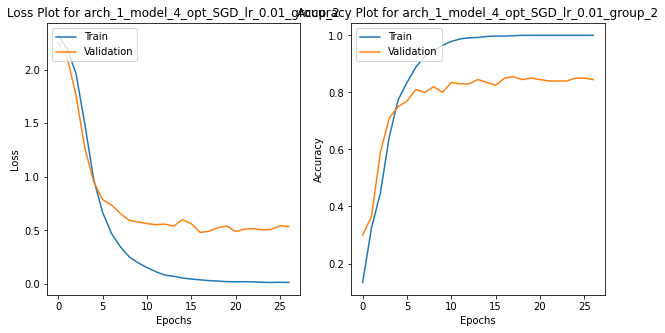

32/32 [==============================] - 1s 38ms/step - loss: 0.6602 - accuracy: 0.7970
arch_1_model_4_group_2_opt_Adam_lr_0.001
Epoch 1/250
25/25 [==============================] - 2s 55ms/step - loss: 2.3864 - accuracy: 0.1397 - val_loss: 1.9096 - val_accuracy: 0.5050
Epoch 2/250
25/25 [==============================] - 1s 50ms/step - loss: 1.6764 - accuracy: 0.5928 - val_loss: 1.3479 - val_accuracy: 0.6900
Epoch 3/250
25/25 [==============================] - 1s 51ms/step - loss: 1.0972 - accuracy: 0.7584 - val_loss: 0.9846 - val_accuracy: 0.7700
Epoch 4/250
25/25 [==============================] - 1s 47ms/step - loss: 0.6969 - accuracy: 0.8583 - val_loss: 0.9272 - val_accuracy: 0.7500
Epoch 5/250
25/25 [==============================] - 1s 48ms/step - loss: 0.6019 - accuracy: 0.8662 - val_loss: 0.7452 - val_accuracy: 0.7950
Epoch 6/250
25/25 [==============================] - 1s 51ms/step - loss: 0.4299 - accuracy: 0.9119 - val_loss: 0.6348 - val_accuracy: 0.8050
Epoch 7/250
25/25 [

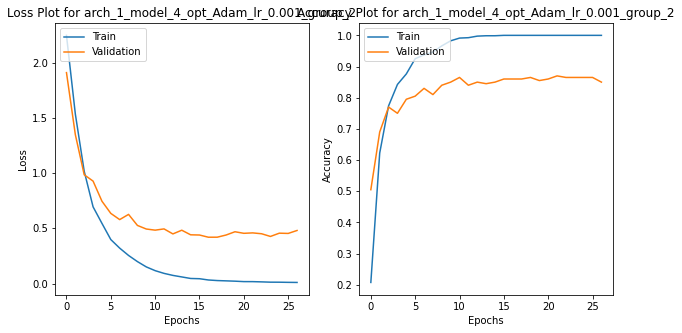

32/32 [==============================] - 1s 35ms/step - loss: 0.6146 - accuracy: 0.8270
arch_1_model_4_group_2_opt_Adam_lr_0.01
Epoch 1/250
25/25 [==============================] - 2s 56ms/step - loss: 2.9902 - accuracy: 0.1874 - val_loss: 2.0530 - val_accuracy: 0.4450
Epoch 2/250
25/25 [==============================] - 1s 48ms/step - loss: 1.7899 - accuracy: 0.4023 - val_loss: 1.0718 - val_accuracy: 0.6450
Epoch 3/250
25/25 [==============================] - 1s 48ms/step - loss: 0.8589 - accuracy: 0.7330 - val_loss: 0.8259 - val_accuracy: 0.7350
Epoch 4/250
25/25 [==============================] - 1s 50ms/step - loss: 0.5045 - accuracy: 0.8382 - val_loss: 0.7645 - val_accuracy: 0.7550
Epoch 5/250
25/25 [==============================] - 1s 51ms/step - loss: 0.3439 - accuracy: 0.8955 - val_loss: 0.6807 - val_accuracy: 0.7850
Epoch 6/250
25/25 [==============================] - 1s 48ms/step - loss: 0.2633 - accuracy: 0.9268 - val_loss: 0.7254 - val_accuracy: 0.7800
Epoch 7/250
25/25 [=

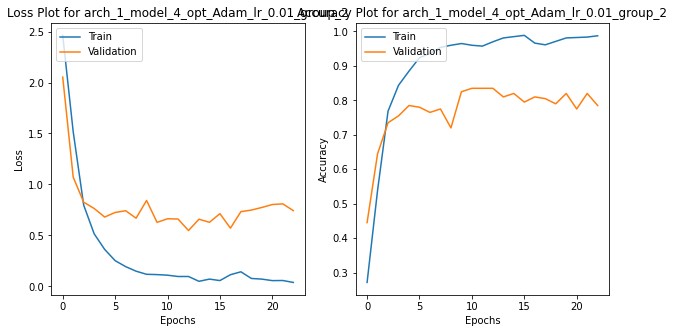

32/32 [==============================] - 1s 37ms/step - loss: 1.0150 - accuracy: 0.7710
arch_1_model_5_group_2_opt_SGD_lr_0.001
Epoch 1/250
25/25 [==============================] - 2s 56ms/step - loss: 2.3135 - accuracy: 0.0981 - val_loss: 2.2899 - val_accuracy: 0.1500
Epoch 2/250
25/25 [==============================] - 1s 51ms/step - loss: 2.2913 - accuracy: 0.1051 - val_loss: 2.2737 - val_accuracy: 0.2250
Epoch 3/250
25/25 [==============================] - 1s 49ms/step - loss: 2.2787 - accuracy: 0.1616 - val_loss: 2.2597 - val_accuracy: 0.3250
Epoch 4/250
25/25 [==============================] - 1s 50ms/step - loss: 2.2619 - accuracy: 0.2143 - val_loss: 2.2416 - val_accuracy: 0.3150
Epoch 5/250
25/25 [==============================] - 1s 50ms/step - loss: 2.2383 - accuracy: 0.2697 - val_loss: 2.2225 - val_accuracy: 0.4050
Epoch 6/250
25/25 [==============================] - 1s 49ms/step - loss: 2.2188 - accuracy: 0.3093 - val_loss: 2.1974 - val_accuracy: 0.4650
Epoch 7/250
25/25 [=

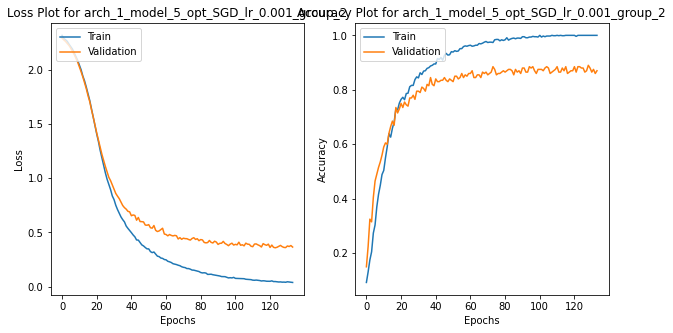

32/32 [==============================] - 1s 38ms/step - loss: 0.5136 - accuracy: 0.8480
arch_1_model_5_group_2_opt_SGD_lr_0.01
Epoch 1/250
25/25 [==============================] - 2s 54ms/step - loss: 2.3275 - accuracy: 0.1313 - val_loss: 2.2394 - val_accuracy: 0.3450
Epoch 2/250
25/25 [==============================] - 1s 49ms/step - loss: 2.2033 - accuracy: 0.3048 - val_loss: 2.0466 - val_accuracy: 0.4000
Epoch 3/250
25/25 [==============================] - 1s 48ms/step - loss: 1.9552 - accuracy: 0.4651 - val_loss: 1.6469 - val_accuracy: 0.5850
Epoch 4/250
25/25 [==============================] - 1s 49ms/step - loss: 1.4814 - accuracy: 0.6638 - val_loss: 1.1517 - val_accuracy: 0.7100
Epoch 5/250
25/25 [==============================] - 1s 48ms/step - loss: 0.9094 - accuracy: 0.7890 - val_loss: 1.0201 - val_accuracy: 0.6800
Epoch 6/250
25/25 [==============================] - 1s 51ms/step - loss: 0.6780 - accuracy: 0.8229 - val_loss: 0.7092 - val_accuracy: 0.7850
Epoch 7/250
25/25 [==

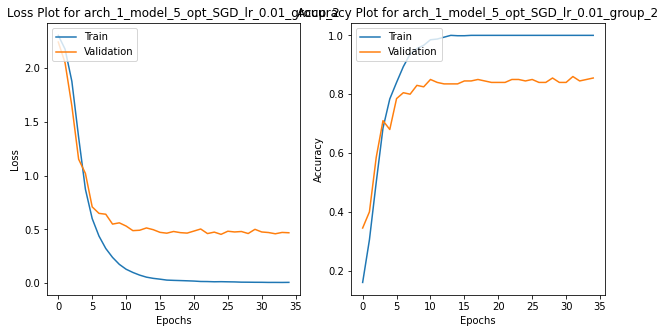

32/32 [==============================] - 1s 36ms/step - loss: 0.6357 - accuracy: 0.8250
arch_1_model_5_group_2_opt_Adam_lr_0.001
Epoch 1/250
25/25 [==============================] - 2s 59ms/step - loss: 2.4379 - accuracy: 0.1695 - val_loss: 1.7450 - val_accuracy: 0.6150
Epoch 2/250
25/25 [==============================] - 1s 50ms/step - loss: 1.4699 - accuracy: 0.6815 - val_loss: 1.1694 - val_accuracy: 0.7100
Epoch 3/250
25/25 [==============================] - 1s 49ms/step - loss: 0.8642 - accuracy: 0.7822 - val_loss: 0.8738 - val_accuracy: 0.7800
Epoch 4/250
25/25 [==============================] - 1s 51ms/step - loss: 0.5276 - accuracy: 0.8926 - val_loss: 0.6941 - val_accuracy: 0.8350
Epoch 5/250
25/25 [==============================] - 1s 49ms/step - loss: 0.4045 - accuracy: 0.9142 - val_loss: 0.6496 - val_accuracy: 0.8300
Epoch 6/250
25/25 [==============================] - 1s 52ms/step - loss: 0.2751 - accuracy: 0.9490 - val_loss: 0.5844 - val_accuracy: 0.8500
Epoch 7/250
25/25 [

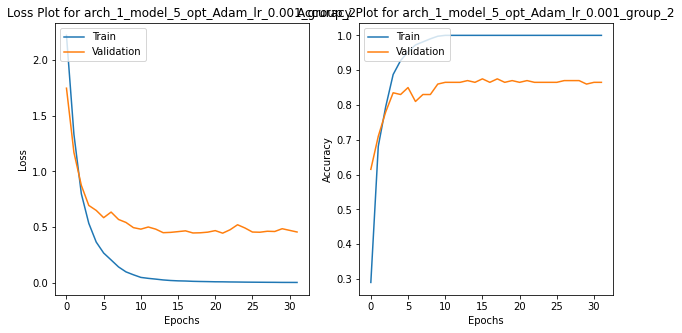

32/32 [==============================] - 1s 36ms/step - loss: 0.6719 - accuracy: 0.8180
arch_1_model_5_group_2_opt_Adam_lr_0.01
Epoch 1/250
25/25 [==============================] - 2s 56ms/step - loss: 5.5033 - accuracy: 0.1054 - val_loss: 2.3039 - val_accuracy: 0.1000
Epoch 2/250
25/25 [==============================] - 1s 51ms/step - loss: 2.3054 - accuracy: 0.0944 - val_loss: 2.3032 - val_accuracy: 0.1000
Epoch 3/250
25/25 [==============================] - 1s 50ms/step - loss: 2.3032 - accuracy: 0.1003 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 4/250
25/25 [==============================] - 1s 51ms/step - loss: 2.3036 - accuracy: 0.0939 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 5/250
25/25 [==============================] - 1s 47ms/step - loss: 2.3039 - accuracy: 0.0902 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 6/250
25/25 [==============================] - 1s 48ms/step - loss: 2.3032 - accuracy: 0.1092 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 7/250
25/25 [=

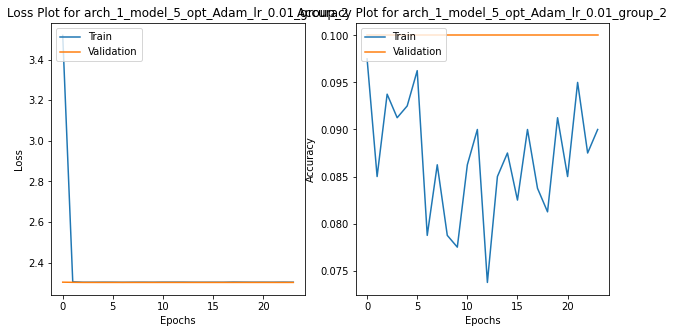

32/32 [==============================] - 1s 36ms/step - loss: 2.3026 - accuracy: 0.1000
arch_1_model_6_group_2_opt_SGD_lr_0.001
Epoch 1/250
25/25 [==============================] - 2s 58ms/step - loss: 2.3240 - accuracy: 0.1099 - val_loss: 2.3054 - val_accuracy: 0.0950
Epoch 2/250
25/25 [==============================] - 1s 51ms/step - loss: 2.3027 - accuracy: 0.1130 - val_loss: 2.2868 - val_accuracy: 0.1300
Epoch 3/250
25/25 [==============================] - 1s 49ms/step - loss: 2.2882 - accuracy: 0.1291 - val_loss: 2.2711 - val_accuracy: 0.1300
Epoch 4/250
25/25 [==============================] - 1s 52ms/step - loss: 2.2683 - accuracy: 0.1804 - val_loss: 2.2550 - val_accuracy: 0.1700
Epoch 5/250
25/25 [==============================] - 1s 50ms/step - loss: 2.2522 - accuracy: 0.1964 - val_loss: 2.2380 - val_accuracy: 0.3350
Epoch 6/250
25/25 [==============================] - 1s 52ms/step - loss: 2.2366 - accuracy: 0.2046 - val_loss: 2.2201 - val_accuracy: 0.5500
Epoch 7/250
25/25 [=

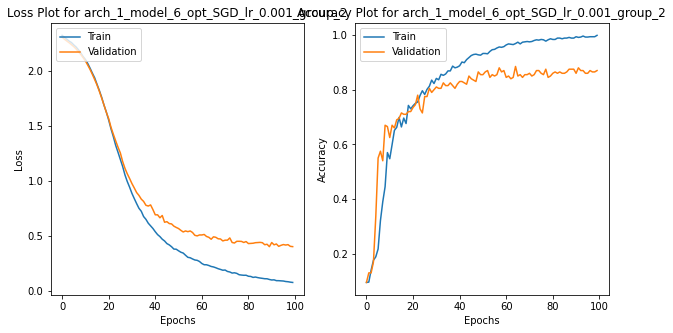

32/32 [==============================] - 1s 37ms/step - loss: 0.5614 - accuracy: 0.8300
arch_1_model_6_group_2_opt_SGD_lr_0.01
Epoch 1/250
25/25 [==============================] - 2s 56ms/step - loss: 2.3086 - accuracy: 0.1191 - val_loss: 2.2656 - val_accuracy: 0.1000
Epoch 2/250
25/25 [==============================] - 1s 50ms/step - loss: 2.2185 - accuracy: 0.2123 - val_loss: 2.0771 - val_accuracy: 0.5450
Epoch 3/250
25/25 [==============================] - 1s 49ms/step - loss: 1.9839 - accuracy: 0.4975 - val_loss: 1.6776 - val_accuracy: 0.6750
Epoch 4/250
25/25 [==============================] - 1s 49ms/step - loss: 1.4656 - accuracy: 0.6803 - val_loss: 1.1795 - val_accuracy: 0.7050
Epoch 5/250
25/25 [==============================] - 1s 47ms/step - loss: 0.8929 - accuracy: 0.7983 - val_loss: 0.8803 - val_accuracy: 0.7650
Epoch 6/250
25/25 [==============================] - 1s 51ms/step - loss: 0.6114 - accuracy: 0.8578 - val_loss: 0.7404 - val_accuracy: 0.7850
Epoch 7/250
25/25 [==

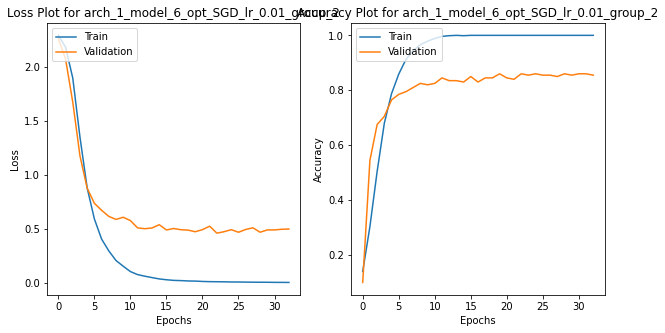

32/32 [==============================] - 1s 37ms/step - loss: 0.6465 - accuracy: 0.8120
arch_1_model_6_group_2_opt_Adam_lr_0.001
Epoch 1/250
25/25 [==============================] - 2s 55ms/step - loss: 3.5114 - accuracy: 0.1081 - val_loss: 1.9514 - val_accuracy: 0.5250
Epoch 2/250
25/25 [==============================] - 1s 49ms/step - loss: 1.6650 - accuracy: 0.6076 - val_loss: 1.1143 - val_accuracy: 0.7500
Epoch 3/250
25/25 [==============================] - 1s 51ms/step - loss: 0.9068 - accuracy: 0.7762 - val_loss: 0.7834 - val_accuracy: 0.8000
Epoch 4/250
25/25 [==============================] - 1s 50ms/step - loss: 0.4951 - accuracy: 0.8900 - val_loss: 0.6844 - val_accuracy: 0.7950
Epoch 5/250
25/25 [==============================] - 1s 51ms/step - loss: 0.3673 - accuracy: 0.9203 - val_loss: 0.6094 - val_accuracy: 0.8300
Epoch 6/250
25/25 [==============================] - 1s 50ms/step - loss: 0.1768 - accuracy: 0.9743 - val_loss: 0.5231 - val_accuracy: 0.8450
Epoch 7/250
25/25 [

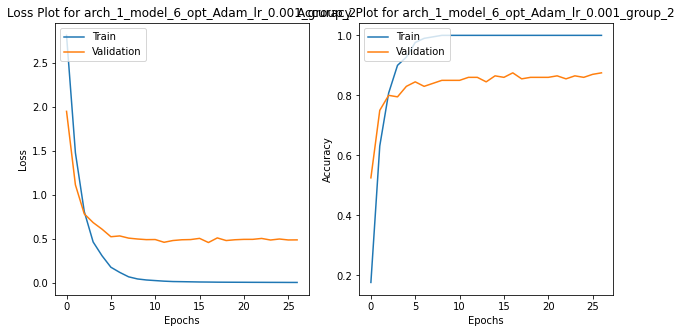

32/32 [==============================] - 1s 36ms/step - loss: 0.6753 - accuracy: 0.8240
arch_1_model_6_group_2_opt_Adam_lr_0.01
Epoch 1/250
25/25 [==============================] - 2s 56ms/step - loss: 11.1136 - accuracy: 0.0923 - val_loss: 2.3034 - val_accuracy: 0.1000
Epoch 2/250
25/25 [==============================] - 1s 51ms/step - loss: 2.3051 - accuracy: 0.0867 - val_loss: 2.3029 - val_accuracy: 0.1000
Epoch 3/250
25/25 [==============================] - 1s 50ms/step - loss: 2.3032 - accuracy: 0.0783 - val_loss: 2.3029 - val_accuracy: 0.1000
Epoch 4/250
25/25 [==============================] - 1s 48ms/step - loss: 2.3021 - accuracy: 0.1185 - val_loss: 2.3028 - val_accuracy: 0.1000
Epoch 5/250
25/25 [==============================] - 1s 49ms/step - loss: 2.3047 - accuracy: 0.0703 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 6/250
25/25 [==============================] - 1s 52ms/step - loss: 2.3032 - accuracy: 0.1011 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 7/250
25/25 [

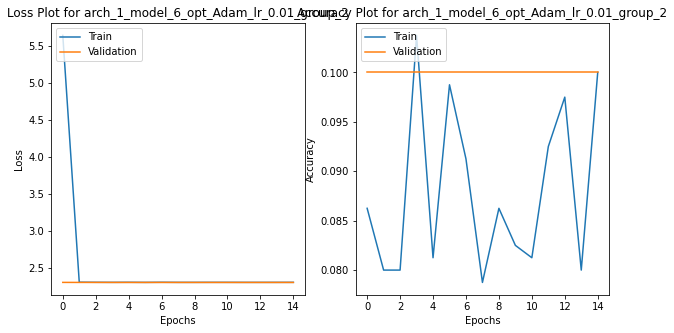

32/32 [==============================] - 1s 37ms/step - loss: 2.3026 - accuracy: 0.1000
arch_2_model_1_group_2_opt_SGD_lr_0.001
Epoch 1/250
25/25 [==============================] - 2s 56ms/step - loss: 2.3121 - accuracy: 0.1117 - val_loss: 2.3039 - val_accuracy: 0.1050
Epoch 2/250
25/25 [==============================] - 1s 50ms/step - loss: 2.3060 - accuracy: 0.1219 - val_loss: 2.2994 - val_accuracy: 0.1100
Epoch 3/250
25/25 [==============================] - 1s 50ms/step - loss: 2.3066 - accuracy: 0.0929 - val_loss: 2.2967 - val_accuracy: 0.1150
Epoch 4/250
25/25 [==============================] - 1s 48ms/step - loss: 2.2959 - accuracy: 0.1112 - val_loss: 2.2946 - val_accuracy: 0.1050
Epoch 5/250
25/25 [==============================] - 1s 48ms/step - loss: 2.3016 - accuracy: 0.1191 - val_loss: 2.2919 - val_accuracy: 0.1150
Epoch 6/250
25/25 [==============================] - 2s 61ms/step - loss: 2.2928 - accuracy: 0.1184 - val_loss: 2.2901 - val_accuracy: 0.1100
Epoch 7/250
25/25 [=

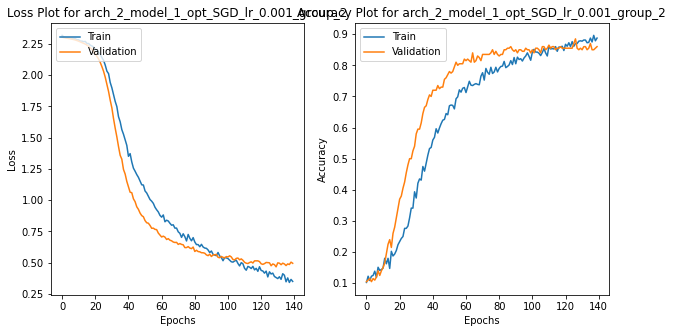

32/32 [==============================] - 1s 36ms/step - loss: 0.5991 - accuracy: 0.8100
arch_2_model_1_group_2_opt_SGD_lr_0.01
Epoch 1/250
25/25 [==============================] - 2s 57ms/step - loss: 2.3025 - accuracy: 0.1093 - val_loss: 2.2765 - val_accuracy: 0.2600
Epoch 2/250
25/25 [==============================] - 1s 52ms/step - loss: 2.2702 - accuracy: 0.1816 - val_loss: 2.2070 - val_accuracy: 0.2600
Epoch 3/250
25/25 [==============================] - 1s 49ms/step - loss: 2.2047 - accuracy: 0.2333 - val_loss: 2.0117 - val_accuracy: 0.3800
Epoch 4/250
25/25 [==============================] - 1s 55ms/step - loss: 1.9845 - accuracy: 0.3389 - val_loss: 1.4810 - val_accuracy: 0.5950
Epoch 5/250
25/25 [==============================] - 1s 50ms/step - loss: 1.5892 - accuracy: 0.4991 - val_loss: 1.0315 - val_accuracy: 0.7250
Epoch 6/250
25/25 [==============================] - 1s 51ms/step - loss: 1.2661 - accuracy: 0.5744 - val_loss: 0.9471 - val_accuracy: 0.6850
Epoch 7/250
25/25 [==

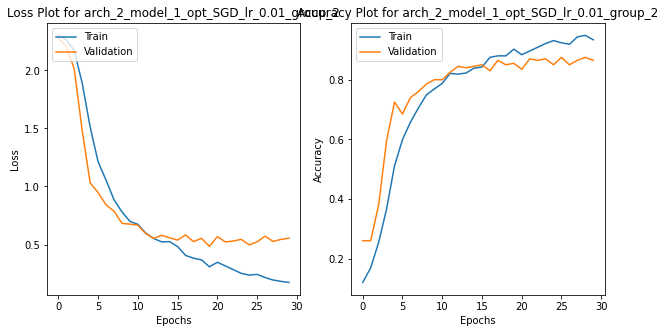

32/32 [==============================] - 1s 36ms/step - loss: 0.6828 - accuracy: 0.7880
arch_2_model_1_group_2_opt_Adam_lr_0.001
Epoch 1/250
25/25 [==============================] - 2s 62ms/step - loss: 2.3365 - accuracy: 0.1005 - val_loss: 2.2471 - val_accuracy: 0.3500
Epoch 2/250
25/25 [==============================] - 1s 50ms/step - loss: 2.1979 - accuracy: 0.2485 - val_loss: 1.7698 - val_accuracy: 0.5350
Epoch 3/250
25/25 [==============================] - 1s 48ms/step - loss: 1.7112 - accuracy: 0.4341 - val_loss: 1.1209 - val_accuracy: 0.6400
Epoch 4/250
25/25 [==============================] - 1s 47ms/step - loss: 1.1957 - accuracy: 0.6134 - val_loss: 0.9701 - val_accuracy: 0.7300
Epoch 5/250
25/25 [==============================] - 1s 49ms/step - loss: 0.9806 - accuracy: 0.7015 - val_loss: 0.7394 - val_accuracy: 0.7950
Epoch 6/250
25/25 [==============================] - 1s 49ms/step - loss: 0.7034 - accuracy: 0.7924 - val_loss: 0.6133 - val_accuracy: 0.8450
Epoch 7/250
25/25 [

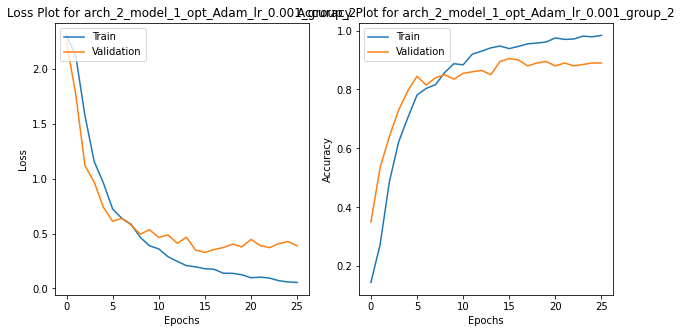

32/32 [==============================] - 1s 35ms/step - loss: 0.5529 - accuracy: 0.8450
arch_2_model_1_group_2_opt_Adam_lr_0.01
Epoch 1/250
25/25 [==============================] - 2s 61ms/step - loss: 2.4257 - accuracy: 0.1509 - val_loss: 1.5103 - val_accuracy: 0.5050
Epoch 2/250
25/25 [==============================] - 1s 50ms/step - loss: 1.5540 - accuracy: 0.4659 - val_loss: 1.3711 - val_accuracy: 0.5750
Epoch 3/250
25/25 [==============================] - 1s 48ms/step - loss: 1.2217 - accuracy: 0.5602 - val_loss: 1.0420 - val_accuracy: 0.6600
Epoch 4/250
25/25 [==============================] - 1s 48ms/step - loss: 1.0622 - accuracy: 0.6687 - val_loss: 0.9949 - val_accuracy: 0.7050
Epoch 5/250
25/25 [==============================] - 1s 50ms/step - loss: 0.8135 - accuracy: 0.7406 - val_loss: 0.6946 - val_accuracy: 0.7600
Epoch 6/250
25/25 [==============================] - 1s 52ms/step - loss: 0.6442 - accuracy: 0.7851 - val_loss: 0.5954 - val_accuracy: 0.8300
Epoch 7/250
25/25 [=

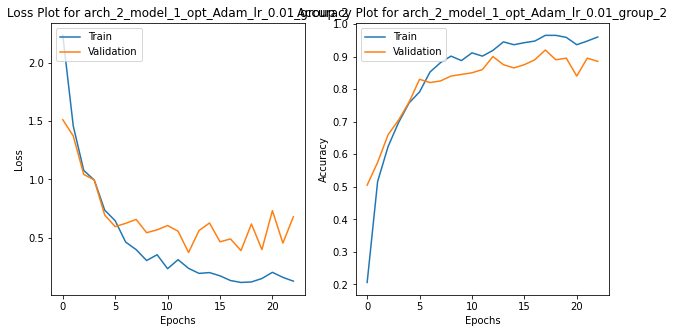

32/32 [==============================] - 1s 36ms/step - loss: 0.6127 - accuracy: 0.8330
arch_2_model_2_group_2_opt_SGD_lr_0.001
Epoch 1/250
25/25 [==============================] - 2s 60ms/step - loss: 2.3081 - accuracy: 0.0895 - val_loss: 2.2931 - val_accuracy: 0.1250
Epoch 2/250
25/25 [==============================] - 1s 48ms/step - loss: 2.3013 - accuracy: 0.1145 - val_loss: 2.2865 - val_accuracy: 0.1200
Epoch 3/250
25/25 [==============================] - 1s 50ms/step - loss: 2.2910 - accuracy: 0.1214 - val_loss: 2.2813 - val_accuracy: 0.1350
Epoch 4/250
25/25 [==============================] - 1s 48ms/step - loss: 2.2957 - accuracy: 0.1038 - val_loss: 2.2760 - val_accuracy: 0.1950
Epoch 5/250
25/25 [==============================] - 1s 49ms/step - loss: 2.2811 - accuracy: 0.1372 - val_loss: 2.2693 - val_accuracy: 0.2200
Epoch 6/250
25/25 [==============================] - 1s 49ms/step - loss: 2.2835 - accuracy: 0.1184 - val_loss: 2.2630 - val_accuracy: 0.2000
Epoch 7/250
25/25 [=

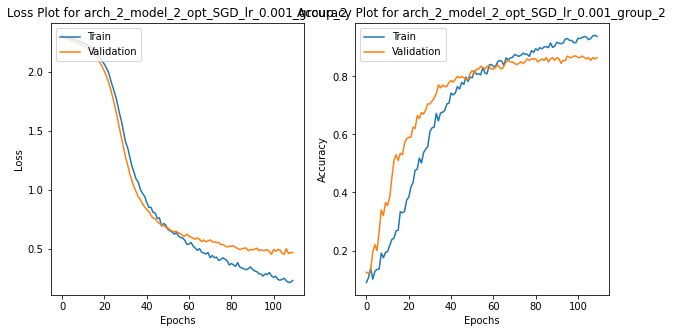

32/32 [==============================] - 1s 37ms/step - loss: 0.5492 - accuracy: 0.8290
arch_2_model_2_group_2_opt_SGD_lr_0.01
Epoch 1/250
25/25 [==============================] - 2s 55ms/step - loss: 2.3171 - accuracy: 0.0963 - val_loss: 2.2645 - val_accuracy: 0.2200
Epoch 2/250
25/25 [==============================] - 1s 49ms/step - loss: 2.2592 - accuracy: 0.2040 - val_loss: 2.1973 - val_accuracy: 0.4400
Epoch 3/250
25/25 [==============================] - 1s 50ms/step - loss: 2.1878 - accuracy: 0.2751 - val_loss: 1.9625 - val_accuracy: 0.5600
Epoch 4/250
25/25 [==============================] - 1s 49ms/step - loss: 1.9213 - accuracy: 0.4174 - val_loss: 1.3811 - val_accuracy: 0.6400
Epoch 5/250
25/25 [==============================] - 1s 49ms/step - loss: 1.3814 - accuracy: 0.5798 - val_loss: 0.9336 - val_accuracy: 0.7350
Epoch 6/250
25/25 [==============================] - 1s 50ms/step - loss: 0.9456 - accuracy: 0.6985 - val_loss: 0.8147 - val_accuracy: 0.7850
Epoch 7/250
25/25 [==

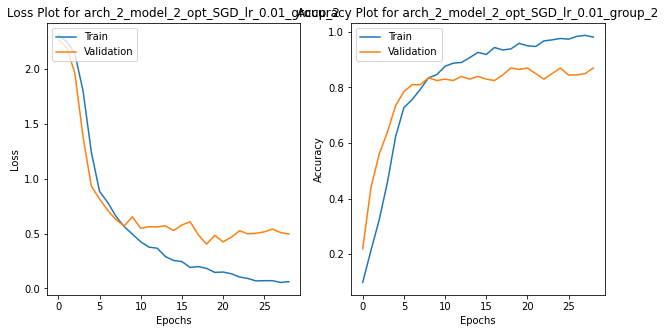

32/32 [==============================] - 1s 35ms/step - loss: 0.5696 - accuracy: 0.8330
arch_2_model_2_group_2_opt_Adam_lr_0.001
Epoch 1/250
25/25 [==============================] - 2s 56ms/step - loss: 2.2512 - accuracy: 0.1591 - val_loss: 1.6026 - val_accuracy: 0.5800
Epoch 2/250
25/25 [==============================] - 1s 49ms/step - loss: 1.3976 - accuracy: 0.5755 - val_loss: 0.8364 - val_accuracy: 0.7700
Epoch 3/250
25/25 [==============================] - 1s 52ms/step - loss: 0.7800 - accuracy: 0.7613 - val_loss: 0.7096 - val_accuracy: 0.7750
Epoch 4/250
25/25 [==============================] - 1s 50ms/step - loss: 0.5981 - accuracy: 0.8328 - val_loss: 0.5389 - val_accuracy: 0.8200
Epoch 5/250
25/25 [==============================] - 1s 48ms/step - loss: 0.3753 - accuracy: 0.8893 - val_loss: 0.4066 - val_accuracy: 0.8950
Epoch 6/250
25/25 [==============================] - 1s 55ms/step - loss: 0.2656 - accuracy: 0.9220 - val_loss: 0.4105 - val_accuracy: 0.8800
Epoch 7/250
25/25 [

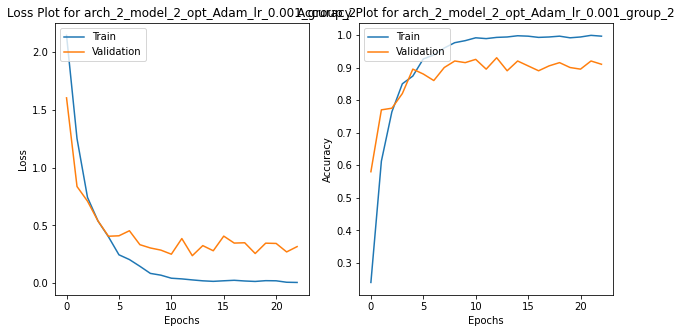

32/32 [==============================] - 1s 37ms/step - loss: 0.5768 - accuracy: 0.8530
arch_2_model_2_group_2_opt_Adam_lr_0.01
Epoch 1/250
25/25 [==============================] - 2s 59ms/step - loss: 3.2142 - accuracy: 0.0954 - val_loss: 1.7143 - val_accuracy: 0.4250
Epoch 2/250
25/25 [==============================] - 1s 48ms/step - loss: 1.5085 - accuracy: 0.4998 - val_loss: 0.7946 - val_accuracy: 0.7850
Epoch 3/250
25/25 [==============================] - 1s 47ms/step - loss: 0.7194 - accuracy: 0.7654 - val_loss: 0.7549 - val_accuracy: 0.7900
Epoch 4/250
25/25 [==============================] - 1s 55ms/step - loss: 0.4838 - accuracy: 0.8560 - val_loss: 0.6353 - val_accuracy: 0.8200
Epoch 5/250
25/25 [==============================] - 1s 49ms/step - loss: 0.3966 - accuracy: 0.8537 - val_loss: 0.4623 - val_accuracy: 0.8850
Epoch 6/250
25/25 [==============================] - 1s 49ms/step - loss: 0.2524 - accuracy: 0.9133 - val_loss: 0.6134 - val_accuracy: 0.8300
Epoch 7/250
25/25 [=

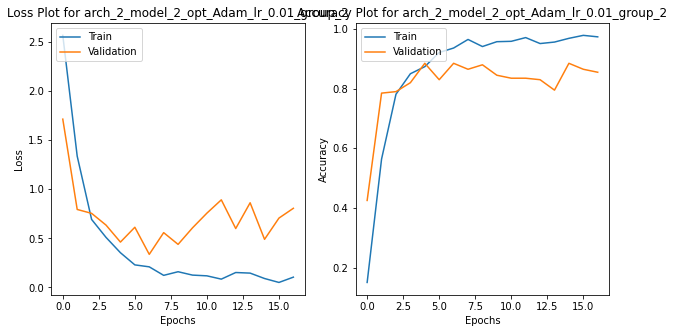

32/32 [==============================] - 1s 35ms/step - loss: 0.5957 - accuracy: 0.8420
arch_3_model_1_group_2_opt_SGD_lr_0.001
Epoch 1/250
25/25 [==============================] - 2s 58ms/step - loss: 2.3007 - accuracy: 0.1129 - val_loss: 2.3037 - val_accuracy: 0.1000
Epoch 2/250
25/25 [==============================] - 1s 49ms/step - loss: 2.3088 - accuracy: 0.0866 - val_loss: 2.3013 - val_accuracy: 0.1050
Epoch 3/250
25/25 [==============================] - 1s 48ms/step - loss: 2.3047 - accuracy: 0.1098 - val_loss: 2.3005 - val_accuracy: 0.1000
Epoch 4/250
25/25 [==============================] - 1s 47ms/step - loss: 2.2991 - accuracy: 0.1277 - val_loss: 2.2989 - val_accuracy: 0.1200
Epoch 5/250
25/25 [==============================] - 1s 46ms/step - loss: 2.3018 - accuracy: 0.1040 - val_loss: 2.2979 - val_accuracy: 0.1200
Epoch 6/250
25/25 [==============================] - 1s 49ms/step - loss: 2.2998 - accuracy: 0.1347 - val_loss: 2.2967 - val_accuracy: 0.1100
Epoch 7/250
25/25 [=

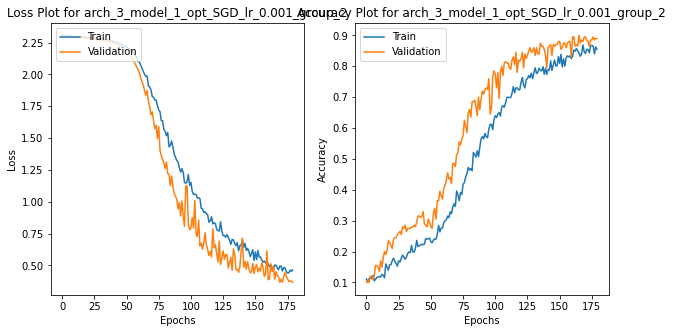

32/32 [==============================] - 1s 35ms/step - loss: 0.5336 - accuracy: 0.8340
arch_3_model_1_group_2_opt_SGD_lr_0.01
Epoch 1/250
25/25 [==============================] - 2s 53ms/step - loss: 2.3113 - accuracy: 0.1159 - val_loss: 2.2990 - val_accuracy: 0.1100
Epoch 2/250
25/25 [==============================] - 1s 49ms/step - loss: 2.2981 - accuracy: 0.1235 - val_loss: 2.2952 - val_accuracy: 0.1450
Epoch 3/250
25/25 [==============================] - 1s 49ms/step - loss: 2.2949 - accuracy: 0.1441 - val_loss: 2.2891 - val_accuracy: 0.1950
Epoch 4/250
25/25 [==============================] - 1s 49ms/step - loss: 2.2949 - accuracy: 0.1611 - val_loss: 2.2789 - val_accuracy: 0.2950
Epoch 5/250
25/25 [==============================] - 1s 52ms/step - loss: 2.2863 - accuracy: 0.1238 - val_loss: 2.2584 - val_accuracy: 0.3150
Epoch 6/250
25/25 [==============================] - 1s 51ms/step - loss: 2.2681 - accuracy: 0.1817 - val_loss: 2.2202 - val_accuracy: 0.2850
Epoch 7/250
25/25 [==

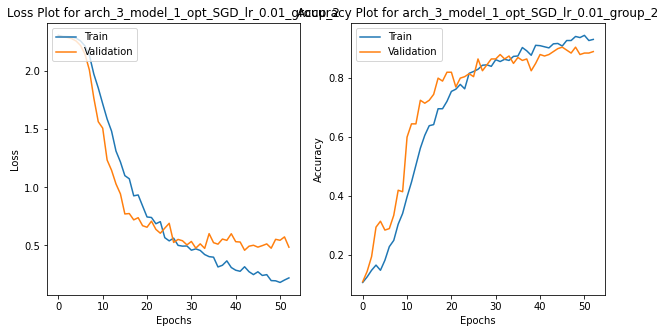

32/32 [==============================] - 1s 35ms/step - loss: 0.5526 - accuracy: 0.8530
arch_3_model_1_group_2_opt_Adam_lr_0.001
Epoch 1/250
25/25 [==============================] - 2s 53ms/step - loss: 2.3030 - accuracy: 0.0916 - val_loss: 2.2785 - val_accuracy: 0.3250
Epoch 2/250
25/25 [==============================] - 1s 48ms/step - loss: 2.2445 - accuracy: 0.2262 - val_loss: 1.9053 - val_accuracy: 0.3850
Epoch 3/250
25/25 [==============================] - 1s 52ms/step - loss: 1.9363 - accuracy: 0.3232 - val_loss: 1.6519 - val_accuracy: 0.4800
Epoch 4/250
25/25 [==============================] - 1s 55ms/step - loss: 1.6548 - accuracy: 0.4360 - val_loss: 1.1071 - val_accuracy: 0.6550
Epoch 5/250
25/25 [==============================] - 1s 48ms/step - loss: 1.2856 - accuracy: 0.5719 - val_loss: 0.8610 - val_accuracy: 0.7400
Epoch 6/250
25/25 [==============================] - 1s 49ms/step - loss: 1.0486 - accuracy: 0.6676 - val_loss: 0.7539 - val_accuracy: 0.7800
Epoch 7/250
25/25 [

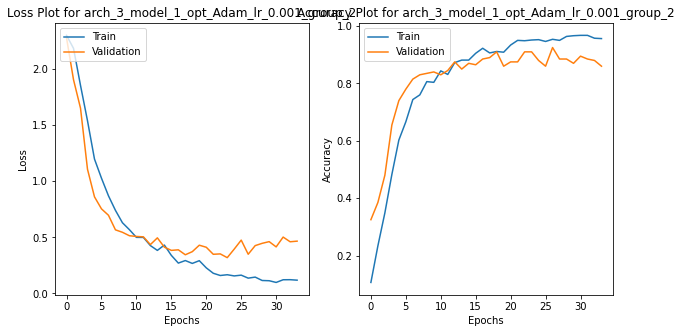

32/32 [==============================] - 1s 34ms/step - loss: 0.5073 - accuracy: 0.8540
arch_3_model_1_group_2_opt_Adam_lr_0.01
Epoch 1/250
25/25 [==============================] - 2s 56ms/step - loss: 2.5272 - accuracy: 0.0867 - val_loss: 2.3032 - val_accuracy: 0.1000
Epoch 2/250
25/25 [==============================] - 1s 49ms/step - loss: 2.3039 - accuracy: 0.0978 - val_loss: 2.3032 - val_accuracy: 0.1000
Epoch 3/250
25/25 [==============================] - 1s 50ms/step - loss: 2.3022 - accuracy: 0.1059 - val_loss: 2.3029 - val_accuracy: 0.1000
Epoch 4/250
25/25 [==============================] - 1s 48ms/step - loss: 2.3036 - accuracy: 0.0958 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 5/250
25/25 [==============================] - 1s 49ms/step - loss: 2.3037 - accuracy: 0.0875 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 6/250
25/25 [==============================] - 1s 50ms/step - loss: 2.3034 - accuracy: 0.1222 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 7/250
25/25 [=

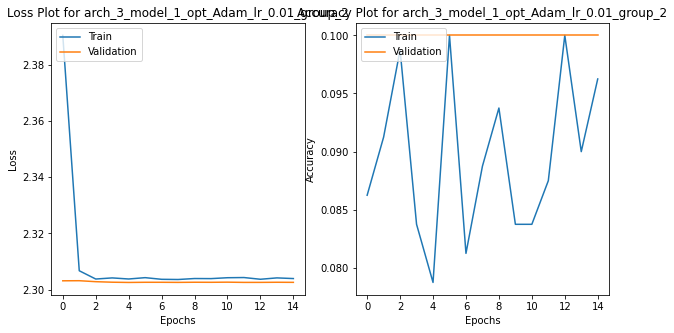

32/32 [==============================] - 1s 35ms/step - loss: 2.3026 - accuracy: 0.1000
arch_3_model_2_group_2_opt_SGD_lr_0.001
Epoch 1/250
25/25 [==============================] - 2s 62ms/step - loss: 2.3037 - accuracy: 0.0956 - val_loss: 2.3030 - val_accuracy: 0.0950
Epoch 2/250
25/25 [==============================] - 1s 51ms/step - loss: 2.3020 - accuracy: 0.0991 - val_loss: 2.3027 - val_accuracy: 0.0950
Epoch 3/250
25/25 [==============================] - 1s 49ms/step - loss: 2.3045 - accuracy: 0.1063 - val_loss: 2.3024 - val_accuracy: 0.1000
Epoch 4/250
25/25 [==============================] - 1s 51ms/step - loss: 2.3032 - accuracy: 0.0952 - val_loss: 2.3022 - val_accuracy: 0.1150
Epoch 5/250
25/25 [==============================] - 1s 49ms/step - loss: 2.3034 - accuracy: 0.1180 - val_loss: 2.3020 - val_accuracy: 0.1200
Epoch 6/250
25/25 [==============================] - 1s 48ms/step - loss: 2.3019 - accuracy: 0.0948 - val_loss: 2.3017 - val_accuracy: 0.0900
Epoch 7/250
25/25 [=

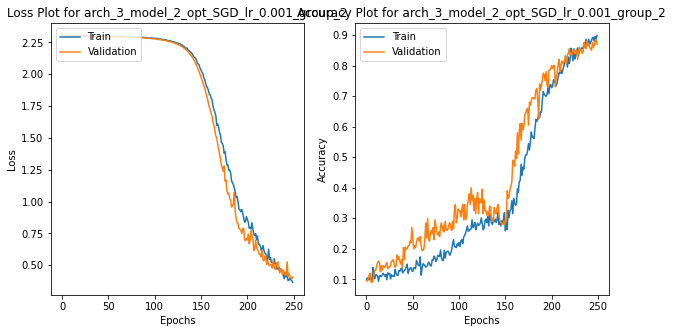

32/32 [==============================] - 1s 37ms/step - loss: 0.5244 - accuracy: 0.8480
arch_3_model_2_group_2_opt_SGD_lr_0.01
Epoch 1/250
25/25 [==============================] - 2s 58ms/step - loss: 2.3032 - accuracy: 0.0779 - val_loss: 2.3022 - val_accuracy: 0.1000
Epoch 2/250
25/25 [==============================] - 1s 50ms/step - loss: 2.3025 - accuracy: 0.1112 - val_loss: 2.3016 - val_accuracy: 0.1050
Epoch 3/250
25/25 [==============================] - 1s 50ms/step - loss: 2.3005 - accuracy: 0.1139 - val_loss: 2.3010 - val_accuracy: 0.1050
Epoch 4/250
25/25 [==============================] - 1s 57ms/step - loss: 2.3003 - accuracy: 0.1109 - val_loss: 2.3006 - val_accuracy: 0.0950
Epoch 5/250
25/25 [==============================] - 1s 49ms/step - loss: 2.3005 - accuracy: 0.1099 - val_loss: 2.2999 - val_accuracy: 0.1450
Epoch 6/250
25/25 [==============================] - 1s 48ms/step - loss: 2.3001 - accuracy: 0.1193 - val_loss: 2.2994 - val_accuracy: 0.1200
Epoch 7/250
25/25 [==

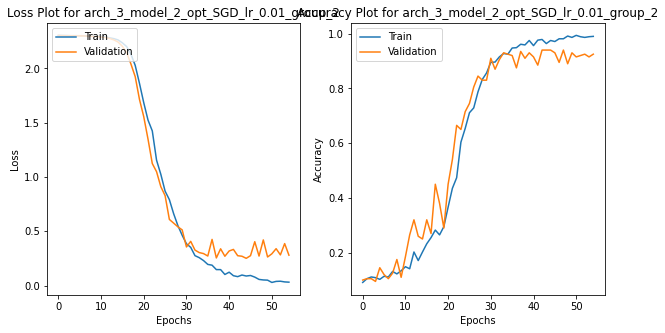

32/32 [==============================] - 1s 35ms/step - loss: 0.3507 - accuracy: 0.8940
arch_3_model_2_group_2_opt_Adam_lr_0.001
Epoch 1/250
25/25 [==============================] - 2s 56ms/step - loss: 2.3059 - accuracy: 0.0926 - val_loss: 2.3002 - val_accuracy: 0.1000
Epoch 2/250
25/25 [==============================] - 1s 49ms/step - loss: 2.2972 - accuracy: 0.1173 - val_loss: 2.2470 - val_accuracy: 0.1450
Epoch 3/250
25/25 [==============================] - 1s 46ms/step - loss: 2.1610 - accuracy: 0.1816 - val_loss: 1.8122 - val_accuracy: 0.3300
Epoch 4/250
25/25 [==============================] - 1s 49ms/step - loss: 1.8131 - accuracy: 0.3055 - val_loss: 1.4771 - val_accuracy: 0.4450
Epoch 5/250
25/25 [==============================] - 1s 46ms/step - loss: 1.5035 - accuracy: 0.4484 - val_loss: 1.3288 - val_accuracy: 0.5500
Epoch 6/250
25/25 [==============================] - 1s 47ms/step - loss: 1.2201 - accuracy: 0.5467 - val_loss: 0.8364 - val_accuracy: 0.6950
Epoch 7/250
25/25 [

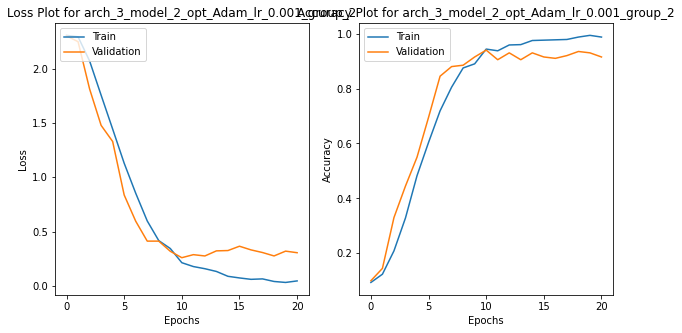

32/32 [==============================] - 1s 34ms/step - loss: 0.3773 - accuracy: 0.8910
arch_3_model_2_group_2_opt_Adam_lr_0.01
Epoch 1/250
25/25 [==============================] - 2s 57ms/step - loss: 2.3231 - accuracy: 0.1008 - val_loss: 2.3028 - val_accuracy: 0.1000
Epoch 2/250
25/25 [==============================] - 1s 47ms/step - loss: 2.3053 - accuracy: 0.0616 - val_loss: 2.3032 - val_accuracy: 0.1000
Epoch 3/250
25/25 [==============================] - 1s 47ms/step - loss: 2.3038 - accuracy: 0.0872 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 4/250
25/25 [==============================] - 1s 48ms/step - loss: 2.3031 - accuracy: 0.1021 - val_loss: 2.3028 - val_accuracy: 0.1000
Epoch 5/250
25/25 [==============================] - 1s 49ms/step - loss: 2.3050 - accuracy: 0.0911 - val_loss: 2.3028 - val_accuracy: 0.1000
Epoch 6/250
25/25 [==============================] - 1s 47ms/step - loss: 2.3026 - accuracy: 0.0930 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 7/250
25/25 [=

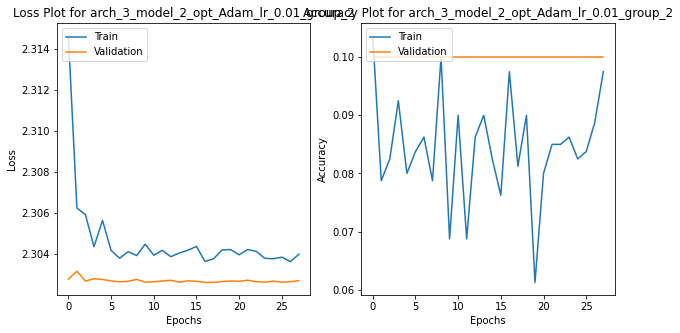

32/32 [==============================] - 1s 35ms/step - loss: 2.3026 - accuracy: 0.1000
arch_3_model_3_group_2_opt_SGD_lr_0.001
Epoch 1/250
25/25 [==============================] - 2s 57ms/step - loss: 2.3056 - accuracy: 0.1097 - val_loss: 2.3030 - val_accuracy: 0.1000
Epoch 2/250
25/25 [==============================] - 1s 56ms/step - loss: 2.3030 - accuracy: 0.1099 - val_loss: 2.3009 - val_accuracy: 0.1050
Epoch 3/250
25/25 [==============================] - 1s 50ms/step - loss: 2.3052 - accuracy: 0.1032 - val_loss: 2.2996 - val_accuracy: 0.1150
Epoch 4/250
25/25 [==============================] - 1s 48ms/step - loss: 2.3034 - accuracy: 0.1070 - val_loss: 2.2987 - val_accuracy: 0.1200
Epoch 5/250
25/25 [==============================] - 1s 46ms/step - loss: 2.2991 - accuracy: 0.1360 - val_loss: 2.2973 - val_accuracy: 0.1100
Epoch 6/250
25/25 [==============================] - 1s 47ms/step - loss: 2.2979 - accuracy: 0.1228 - val_loss: 2.2959 - val_accuracy: 0.0950
Epoch 7/250
25/25 [=

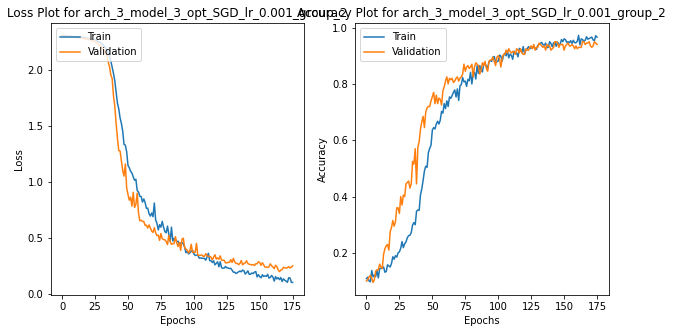

32/32 [==============================] - 1s 35ms/step - loss: 0.3130 - accuracy: 0.9060
arch_3_model_3_group_2_opt_SGD_lr_0.01
Epoch 1/250
25/25 [==============================] - 2s 53ms/step - loss: 2.3060 - accuracy: 0.0963 - val_loss: 2.3023 - val_accuracy: 0.1050
Epoch 2/250
25/25 [==============================] - 1s 47ms/step - loss: 2.3023 - accuracy: 0.1082 - val_loss: 2.2999 - val_accuracy: 0.1300
Epoch 3/250
25/25 [==============================] - 1s 48ms/step - loss: 2.3013 - accuracy: 0.1084 - val_loss: 2.2969 - val_accuracy: 0.2050
Epoch 4/250
25/25 [==============================] - 1s 47ms/step - loss: 2.2967 - accuracy: 0.1391 - val_loss: 2.2908 - val_accuracy: 0.3600
Epoch 5/250
25/25 [==============================] - 1s 48ms/step - loss: 2.2914 - accuracy: 0.1888 - val_loss: 2.2804 - val_accuracy: 0.2600
Epoch 6/250
25/25 [==============================] - 1s 48ms/step - loss: 2.2780 - accuracy: 0.2121 - val_loss: 2.2364 - val_accuracy: 0.2700
Epoch 7/250
25/25 [==

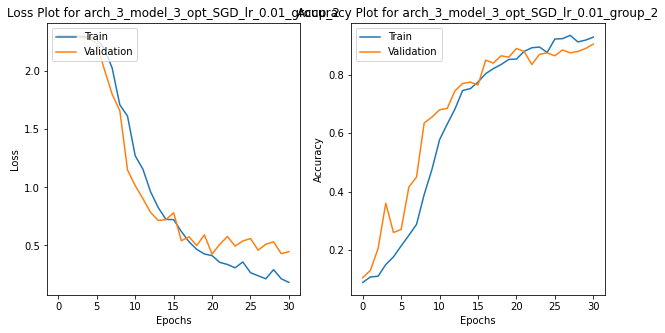

32/32 [==============================] - 1s 35ms/step - loss: 0.6123 - accuracy: 0.7970
arch_3_model_3_group_2_opt_Adam_lr_0.001
Epoch 1/250
25/25 [==============================] - 2s 53ms/step - loss: 2.3162 - accuracy: 0.0811 - val_loss: 2.2778 - val_accuracy: 0.2750
Epoch 2/250
25/25 [==============================] - 1s 46ms/step - loss: 2.1905 - accuracy: 0.2129 - val_loss: 1.3776 - val_accuracy: 0.5150
Epoch 3/250
25/25 [==============================] - 1s 47ms/step - loss: 1.3020 - accuracy: 0.5755 - val_loss: 0.7104 - val_accuracy: 0.7900
Epoch 4/250
25/25 [==============================] - 1s 47ms/step - loss: 0.8311 - accuracy: 0.7481 - val_loss: 0.6503 - val_accuracy: 0.8200
Epoch 5/250
25/25 [==============================] - 1s 46ms/step - loss: 0.5486 - accuracy: 0.8408 - val_loss: 0.4352 - val_accuracy: 0.8700
Epoch 6/250
25/25 [==============================] - 1s 47ms/step - loss: 0.4507 - accuracy: 0.8494 - val_loss: 0.5563 - val_accuracy: 0.8300
Epoch 7/250
25/25 [

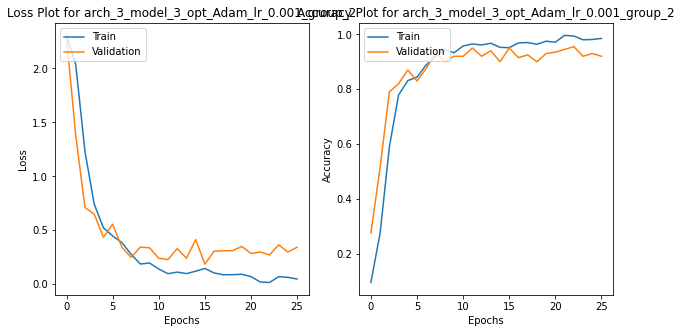

32/32 [==============================] - 1s 34ms/step - loss: 0.2917 - accuracy: 0.9110
arch_3_model_3_group_2_opt_Adam_lr_0.01
Epoch 1/250
25/25 [==============================] - 2s 56ms/step - loss: 4.6599 - accuracy: 0.1105 - val_loss: 2.3032 - val_accuracy: 0.1000
Epoch 2/250
25/25 [==============================] - 1s 47ms/step - loss: 2.3044 - accuracy: 0.0714 - val_loss: 2.3032 - val_accuracy: 0.1000
Epoch 3/250
25/25 [==============================] - 1s 50ms/step - loss: 2.3058 - accuracy: 0.1026 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 4/250
25/25 [==============================] - 1s 50ms/step - loss: 2.3036 - accuracy: 0.0889 - val_loss: 2.3030 - val_accuracy: 0.1000
Epoch 5/250
25/25 [==============================] - 1s 46ms/step - loss: 2.3059 - accuracy: 0.0716 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 6/250
25/25 [==============================] - 1s 49ms/step - loss: 2.3034 - accuracy: 0.1092 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 7/250
25/25 [=

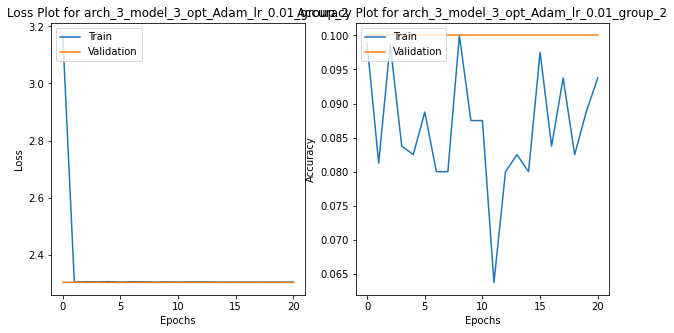

32/32 [==============================] - 1s 35ms/step - loss: 2.3026 - accuracy: 0.1000
Found 1040 images belonging to 13 classes.
Found 260 images belonging to 13 classes.
Found 1300 images belonging to 13 classes.
arch_1_model_1_group_3_opt_SGD_lr_0.001
Epoch 1/250
33/33 [==============================] - 333s 10s/step - loss: 2.5995 - accuracy: 0.0674 - val_loss: 2.5578 - val_accuracy: 0.1192
Epoch 2/250
33/33 [==============================] - 2s 47ms/step - loss: 2.5627 - accuracy: 0.1141 - val_loss: 2.5463 - val_accuracy: 0.1692
Epoch 3/250
33/33 [==============================] - 2s 46ms/step - loss: 2.5457 - accuracy: 0.1082 - val_loss: 2.5351 - val_accuracy: 0.1462
Epoch 4/250
33/33 [==============================] - 1s 45ms/step - loss: 2.5396 - accuracy: 0.1112 - val_loss: 2.5227 - val_accuracy: 0.1577
Epoch 5/250
33/33 [==============================] - 2s 46ms/step - loss: 2.5115 - accuracy: 0.1798 - val_loss: 2.5090 - val_accuracy: 0.2462
Epoch 6/250
33/33 [==============

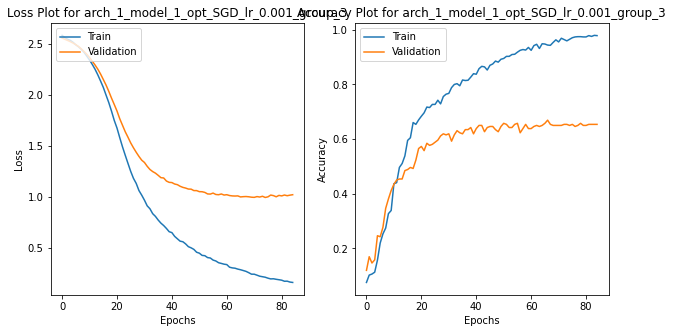

41/41 [==============================] - 296s 7s/step - loss: 1.1591 - accuracy: 0.6546
arch_1_model_1_group_3_opt_SGD_lr_0.01
Epoch 1/250
33/33 [==============================] - 2s 52ms/step - loss: 2.5673 - accuracy: 0.0982 - val_loss: 2.4826 - val_accuracy: 0.2654
Epoch 2/250
33/33 [==============================] - 2s 47ms/step - loss: 2.3882 - accuracy: 0.3625 - val_loss: 2.1536 - val_accuracy: 0.4154
Epoch 3/250
33/33 [==============================] - 2s 46ms/step - loss: 1.8416 - accuracy: 0.5690 - val_loss: 1.6270 - val_accuracy: 0.5077
Epoch 4/250
33/33 [==============================] - 2s 47ms/step - loss: 1.1711 - accuracy: 0.7196 - val_loss: 1.3047 - val_accuracy: 0.6269
Epoch 5/250
33/33 [==============================] - 2s 49ms/step - loss: 0.7471 - accuracy: 0.8292 - val_loss: 1.2369 - val_accuracy: 0.6154
Epoch 6/250
33/33 [==============================] - 2s 48ms/step - loss: 0.5225 - accuracy: 0.8742 - val_loss: 1.1123 - val_accuracy: 0.6192
Epoch 7/250
33/33 [==

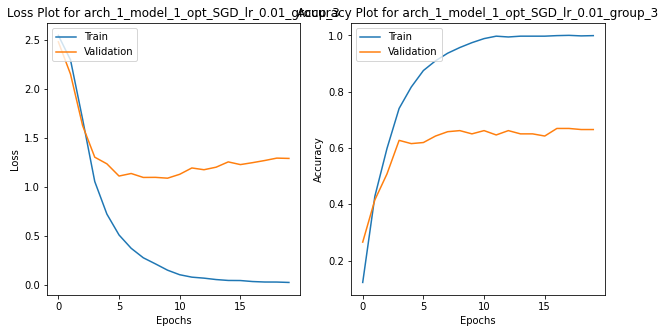

41/41 [==============================] - 2s 37ms/step - loss: 1.1873 - accuracy: 0.6654
arch_1_model_1_group_3_opt_Adam_lr_0.001
Epoch 1/250
33/33 [==============================] - 2s 52ms/step - loss: 2.4955 - accuracy: 0.1708 - val_loss: 1.8448 - val_accuracy: 0.5231
Epoch 2/250
33/33 [==============================] - 2s 46ms/step - loss: 1.3400 - accuracy: 0.6768 - val_loss: 1.3865 - val_accuracy: 0.5846
Epoch 3/250
33/33 [==============================] - 2s 48ms/step - loss: 0.8138 - accuracy: 0.7821 - val_loss: 1.2424 - val_accuracy: 0.6308
Epoch 4/250
33/33 [==============================] - 2s 46ms/step - loss: 0.5262 - accuracy: 0.8761 - val_loss: 1.0926 - val_accuracy: 0.6462
Epoch 5/250
33/33 [==============================] - 2s 47ms/step - loss: 0.3995 - accuracy: 0.9187 - val_loss: 1.0605 - val_accuracy: 0.6577
Epoch 6/250
33/33 [==============================] - 1s 44ms/step - loss: 0.2909 - accuracy: 0.9506 - val_loss: 1.0611 - val_accuracy: 0.6577
Epoch 7/250
33/33 [

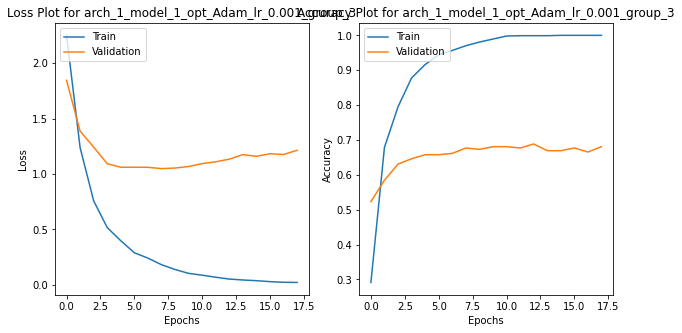

41/41 [==============================] - 1s 34ms/step - loss: 1.1664 - accuracy: 0.6685
arch_1_model_1_group_3_opt_Adam_lr_0.01
Epoch 1/250
33/33 [==============================] - 2s 51ms/step - loss: 5.3297 - accuracy: 0.1672 - val_loss: 1.5017 - val_accuracy: 0.5154
Epoch 2/250
33/33 [==============================] - 1s 45ms/step - loss: 0.9433 - accuracy: 0.7273 - val_loss: 1.1409 - val_accuracy: 0.6038
Epoch 3/250
33/33 [==============================] - 2s 49ms/step - loss: 0.4473 - accuracy: 0.8548 - val_loss: 1.1204 - val_accuracy: 0.6769
Epoch 4/250
33/33 [==============================] - 2s 48ms/step - loss: 0.1547 - accuracy: 0.9627 - val_loss: 1.2962 - val_accuracy: 0.6885
Epoch 5/250
33/33 [==============================] - 2s 46ms/step - loss: 0.0903 - accuracy: 0.9724 - val_loss: 1.3192 - val_accuracy: 0.6885
Epoch 6/250
33/33 [==============================] - 2s 47ms/step - loss: 0.0268 - accuracy: 0.9922 - val_loss: 1.3556 - val_accuracy: 0.7115
Epoch 7/250
33/33 [=

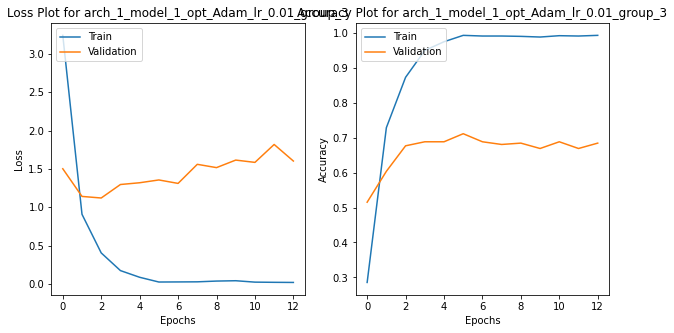

41/41 [==============================] - 1s 33ms/step - loss: 1.1985 - accuracy: 0.6615
arch_1_model_2_group_3_opt_SGD_lr_0.001
Epoch 1/250
33/33 [==============================] - 2s 57ms/step - loss: 2.6362 - accuracy: 0.0588 - val_loss: 2.5805 - val_accuracy: 0.0500
Epoch 2/250
33/33 [==============================] - 2s 46ms/step - loss: 2.5927 - accuracy: 0.0755 - val_loss: 2.5610 - val_accuracy: 0.0692
Epoch 3/250
33/33 [==============================] - 2s 47ms/step - loss: 2.5839 - accuracy: 0.0879 - val_loss: 2.5545 - val_accuracy: 0.1154
Epoch 4/250
33/33 [==============================] - 2s 46ms/step - loss: 2.5641 - accuracy: 0.0958 - val_loss: 2.5500 - val_accuracy: 0.1038
Epoch 5/250
33/33 [==============================] - 2s 47ms/step - loss: 2.5595 - accuracy: 0.0889 - val_loss: 2.5547 - val_accuracy: 0.0731
Epoch 6/250
33/33 [==============================] - 2s 46ms/step - loss: 2.5719 - accuracy: 0.0928 - val_loss: 2.5490 - val_accuracy: 0.1269
Epoch 7/250
33/33 [=

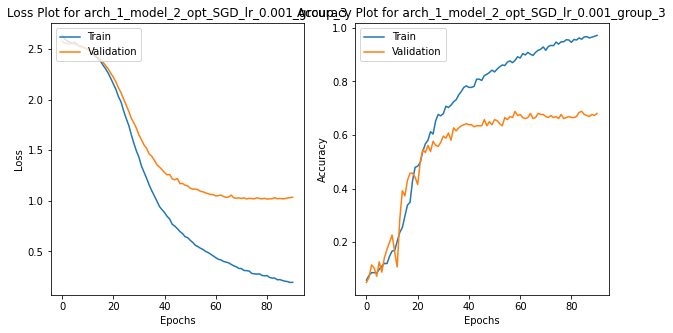

41/41 [==============================] - 1s 33ms/step - loss: 1.1693 - accuracy: 0.6469
arch_1_model_2_group_3_opt_SGD_lr_0.01
Epoch 1/250
33/33 [==============================] - 2s 50ms/step - loss: 2.5949 - accuracy: 0.0869 - val_loss: 2.5161 - val_accuracy: 0.2154
Epoch 2/250
33/33 [==============================] - 1s 44ms/step - loss: 2.4676 - accuracy: 0.2671 - val_loss: 2.3685 - val_accuracy: 0.3192
Epoch 3/250
33/33 [==============================] - 1s 45ms/step - loss: 2.1612 - accuracy: 0.4656 - val_loss: 1.8891 - val_accuracy: 0.4231
Epoch 4/250
33/33 [==============================] - 1s 45ms/step - loss: 1.4866 - accuracy: 0.6239 - val_loss: 1.5572 - val_accuracy: 0.5000
Epoch 5/250
33/33 [==============================] - 1s 45ms/step - loss: 0.9822 - accuracy: 0.7293 - val_loss: 1.2816 - val_accuracy: 0.5885
Epoch 6/250
33/33 [==============================] - 2s 47ms/step - loss: 0.7191 - accuracy: 0.7992 - val_loss: 1.1995 - val_accuracy: 0.6154
Epoch 7/250
33/33 [==

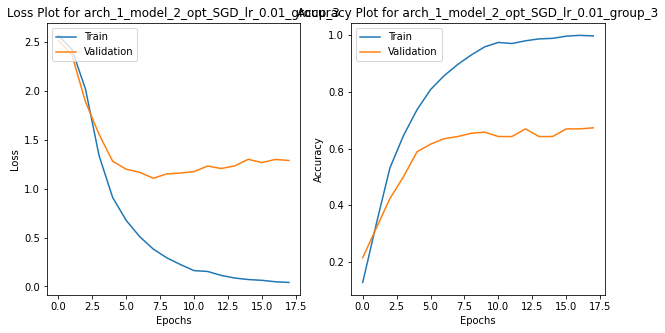

41/41 [==============================] - 1s 34ms/step - loss: 1.2419 - accuracy: 0.6208
arch_1_model_2_group_3_opt_Adam_lr_0.001
Epoch 1/250
33/33 [==============================] - 2s 51ms/step - loss: 2.4965 - accuracy: 0.1785 - val_loss: 1.8156 - val_accuracy: 0.5423
Epoch 2/250
33/33 [==============================] - 2s 48ms/step - loss: 1.3198 - accuracy: 0.7024 - val_loss: 1.3490 - val_accuracy: 0.6423
Epoch 3/250
33/33 [==============================] - 2s 46ms/step - loss: 0.7942 - accuracy: 0.8196 - val_loss: 1.1466 - val_accuracy: 0.6385
Epoch 4/250
33/33 [==============================] - 2s 47ms/step - loss: 0.5523 - accuracy: 0.8748 - val_loss: 1.1008 - val_accuracy: 0.6308
Epoch 5/250
33/33 [==============================] - 2s 47ms/step - loss: 0.3788 - accuracy: 0.9216 - val_loss: 1.0514 - val_accuracy: 0.6577
Epoch 6/250
33/33 [==============================] - 1s 44ms/step - loss: 0.2972 - accuracy: 0.9459 - val_loss: 1.0171 - val_accuracy: 0.6538
Epoch 7/250
33/33 [

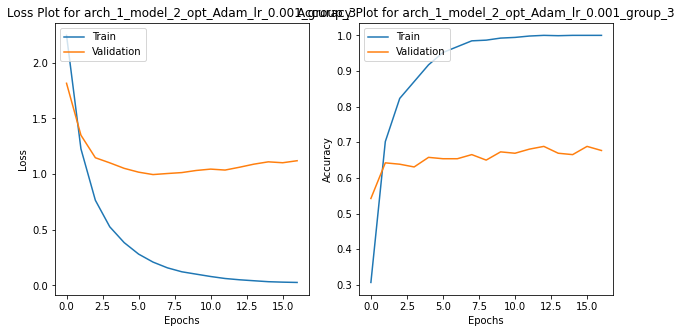

41/41 [==============================] - 1s 35ms/step - loss: 1.1275 - accuracy: 0.6677
arch_1_model_2_group_3_opt_Adam_lr_0.01
Epoch 1/250
33/33 [==============================] - 2s 52ms/step - loss: 10.6387 - accuracy: 0.0907 - val_loss: 2.5653 - val_accuracy: 0.0769
Epoch 2/250
33/33 [==============================] - 2s 46ms/step - loss: 2.5420 - accuracy: 0.1070 - val_loss: 2.0791 - val_accuracy: 0.3538
Epoch 3/250
33/33 [==============================] - 2s 48ms/step - loss: 1.4335 - accuracy: 0.5528 - val_loss: 1.4165 - val_accuracy: 0.5308
Epoch 4/250
33/33 [==============================] - 2s 48ms/step - loss: 0.5756 - accuracy: 0.7989 - val_loss: 1.3809 - val_accuracy: 0.5385
Epoch 5/250
33/33 [==============================] - 2s 46ms/step - loss: 0.2829 - accuracy: 0.9103 - val_loss: 1.5389 - val_accuracy: 0.6077
Epoch 6/250
33/33 [==============================] - 2s 47ms/step - loss: 0.1524 - accuracy: 0.9549 - val_loss: 1.5664 - val_accuracy: 0.6269
Epoch 7/250
33/33 [

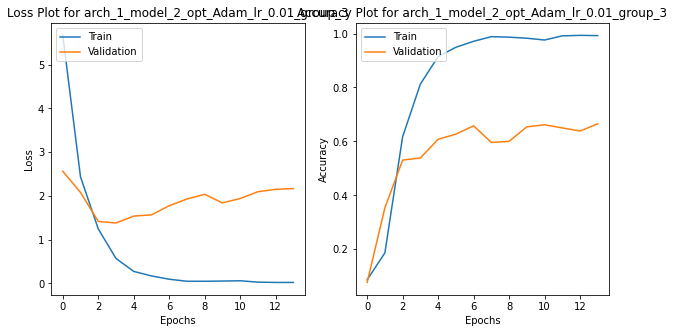

41/41 [==============================] - 2s 36ms/step - loss: 1.3065 - accuracy: 0.6008
arch_1_model_3_group_3_opt_SGD_lr_0.001
Epoch 1/250
33/33 [==============================] - 2s 52ms/step - loss: 2.6380 - accuracy: 0.0575 - val_loss: 2.5624 - val_accuracy: 0.0731
Epoch 2/250
33/33 [==============================] - 1s 44ms/step - loss: 2.5727 - accuracy: 0.0598 - val_loss: 2.5551 - val_accuracy: 0.0885
Epoch 3/250
33/33 [==============================] - 2s 47ms/step - loss: 2.5609 - accuracy: 0.0939 - val_loss: 2.5522 - val_accuracy: 0.1192
Epoch 4/250
33/33 [==============================] - 2s 46ms/step - loss: 2.5680 - accuracy: 0.0709 - val_loss: 2.5483 - val_accuracy: 0.1269
Epoch 5/250
33/33 [==============================] - 2s 46ms/step - loss: 2.5560 - accuracy: 0.0952 - val_loss: 2.5450 - val_accuracy: 0.1462
Epoch 6/250
33/33 [==============================] - 2s 46ms/step - loss: 2.5545 - accuracy: 0.1192 - val_loss: 2.5417 - val_accuracy: 0.1577
Epoch 7/250
33/33 [=

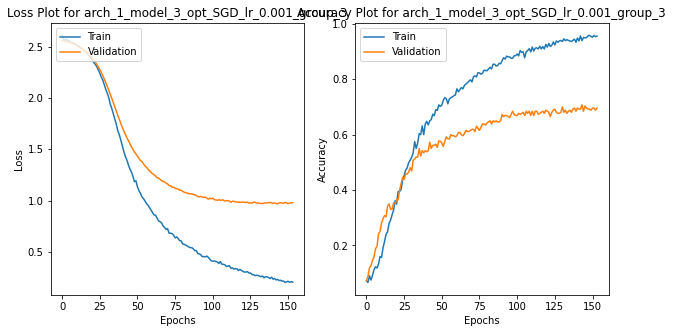

41/41 [==============================] - 1s 35ms/step - loss: 1.1421 - accuracy: 0.6677
arch_1_model_3_group_3_opt_SGD_lr_0.01
Epoch 1/250
33/33 [==============================] - 2s 55ms/step - loss: 2.5856 - accuracy: 0.0832 - val_loss: 2.5388 - val_accuracy: 0.1269
Epoch 2/250
33/33 [==============================] - 2s 47ms/step - loss: 2.5170 - accuracy: 0.1457 - val_loss: 2.4767 - val_accuracy: 0.2923
Epoch 3/250
33/33 [==============================] - 2s 47ms/step - loss: 2.4315 - accuracy: 0.3354 - val_loss: 2.3666 - val_accuracy: 0.3885
Epoch 4/250
33/33 [==============================] - 2s 46ms/step - loss: 2.2681 - accuracy: 0.3989 - val_loss: 2.1518 - val_accuracy: 0.4115
Epoch 5/250
33/33 [==============================] - 2s 46ms/step - loss: 1.9393 - accuracy: 0.5455 - val_loss: 1.7832 - val_accuracy: 0.5385
Epoch 6/250
33/33 [==============================] - 2s 46ms/step - loss: 1.5186 - accuracy: 0.6246 - val_loss: 1.5376 - val_accuracy: 0.4808
Epoch 7/250
33/33 [==

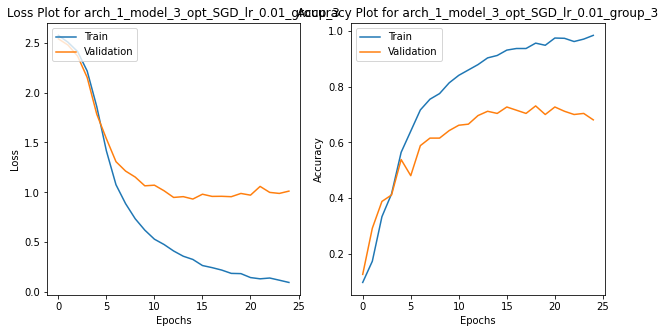

41/41 [==============================] - 1s 35ms/step - loss: 1.0905 - accuracy: 0.6877
arch_1_model_3_group_3_opt_Adam_lr_0.001
Epoch 1/250
33/33 [==============================] - 2s 51ms/step - loss: 2.6242 - accuracy: 0.1039 - val_loss: 2.4319 - val_accuracy: 0.2192
Epoch 2/250
33/33 [==============================] - 2s 47ms/step - loss: 2.2631 - accuracy: 0.3877 - val_loss: 1.9975 - val_accuracy: 0.5077
Epoch 3/250
33/33 [==============================] - 2s 50ms/step - loss: 1.6742 - accuracy: 0.6576 - val_loss: 1.5775 - val_accuracy: 0.5808
Epoch 4/250
33/33 [==============================] - 1s 44ms/step - loss: 1.1725 - accuracy: 0.7518 - val_loss: 1.3237 - val_accuracy: 0.6231
Epoch 5/250
33/33 [==============================] - 2s 46ms/step - loss: 0.8817 - accuracy: 0.7750 - val_loss: 1.1728 - val_accuracy: 0.6423
Epoch 6/250
33/33 [==============================] - 1s 44ms/step - loss: 0.7107 - accuracy: 0.8280 - val_loss: 1.1199 - val_accuracy: 0.6269
Epoch 7/250
33/33 [

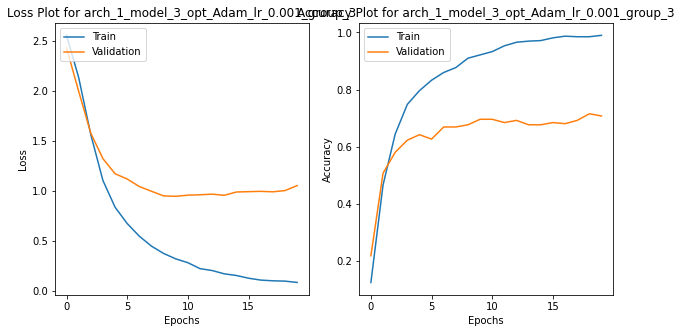

41/41 [==============================] - 1s 34ms/step - loss: 1.1112 - accuracy: 0.6762
arch_1_model_3_group_3_opt_Adam_lr_0.01
Epoch 1/250
33/33 [==============================] - 2s 51ms/step - loss: 2.5215 - accuracy: 0.2244 - val_loss: 1.4228 - val_accuracy: 0.5769
Epoch 2/250
33/33 [==============================] - 2s 46ms/step - loss: 0.8083 - accuracy: 0.7927 - val_loss: 1.1498 - val_accuracy: 0.6115
Epoch 3/250
33/33 [==============================] - 2s 48ms/step - loss: 0.4131 - accuracy: 0.8565 - val_loss: 1.1474 - val_accuracy: 0.6500
Epoch 4/250
33/33 [==============================] - 2s 46ms/step - loss: 0.2126 - accuracy: 0.9357 - val_loss: 1.2057 - val_accuracy: 0.6692
Epoch 5/250
33/33 [==============================] - 1s 44ms/step - loss: 0.1221 - accuracy: 0.9698 - val_loss: 1.3032 - val_accuracy: 0.6808
Epoch 6/250
33/33 [==============================] - 2s 47ms/step - loss: 0.1044 - accuracy: 0.9626 - val_loss: 1.1727 - val_accuracy: 0.6846
Epoch 7/250
33/33 [=

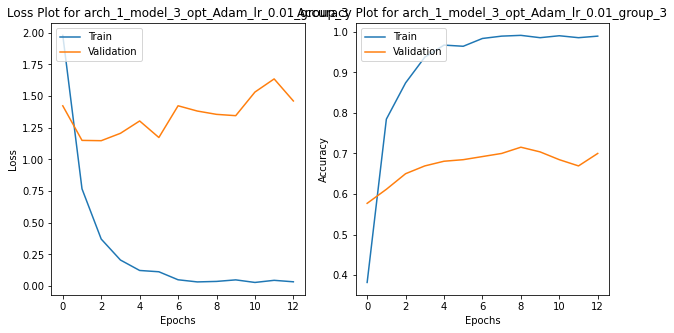

41/41 [==============================] - 1s 34ms/step - loss: 1.1548 - accuracy: 0.6754
arch_1_model_4_group_3_opt_SGD_lr_0.001
Epoch 1/250
33/33 [==============================] - 2s 53ms/step - loss: 2.6169 - accuracy: 0.0844 - val_loss: 2.5599 - val_accuracy: 0.0885
Epoch 2/250
33/33 [==============================] - 2s 46ms/step - loss: 2.5669 - accuracy: 0.0870 - val_loss: 2.5559 - val_accuracy: 0.0808
Epoch 3/250
33/33 [==============================] - 1s 45ms/step - loss: 2.5630 - accuracy: 0.1076 - val_loss: 2.5494 - val_accuracy: 0.1269
Epoch 4/250
33/33 [==============================] - 2s 48ms/step - loss: 2.5426 - accuracy: 0.1208 - val_loss: 2.5401 - val_accuracy: 0.1500
Epoch 5/250
33/33 [==============================] - 1s 45ms/step - loss: 2.5335 - accuracy: 0.1425 - val_loss: 2.5253 - val_accuracy: 0.2000
Epoch 6/250
33/33 [==============================] - 1s 45ms/step - loss: 2.5117 - accuracy: 0.1802 - val_loss: 2.5071 - val_accuracy: 0.2077
Epoch 7/250
33/33 [=

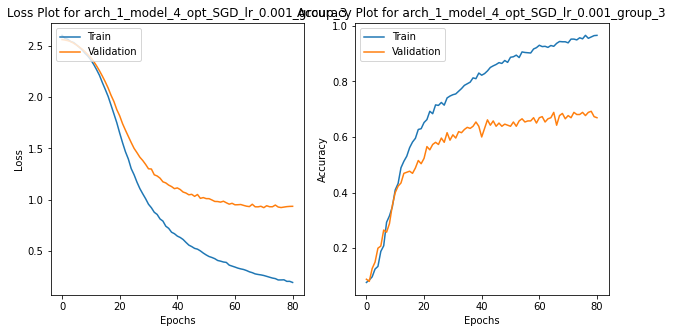

41/41 [==============================] - 1s 34ms/step - loss: 1.1180 - accuracy: 0.6500
arch_1_model_4_group_3_opt_SGD_lr_0.01
Epoch 1/250
33/33 [==============================] - 2s 51ms/step - loss: 2.6142 - accuracy: 0.0793 - val_loss: 2.4893 - val_accuracy: 0.2346
Epoch 2/250
33/33 [==============================] - 2s 48ms/step - loss: 2.4129 - accuracy: 0.2894 - val_loss: 2.2267 - val_accuracy: 0.3231
Epoch 3/250
33/33 [==============================] - 1s 45ms/step - loss: 1.9595 - accuracy: 0.4822 - val_loss: 1.7371 - val_accuracy: 0.5115
Epoch 4/250
33/33 [==============================] - 1s 45ms/step - loss: 1.3114 - accuracy: 0.6287 - val_loss: 1.4720 - val_accuracy: 0.5423
Epoch 5/250
33/33 [==============================] - 2s 46ms/step - loss: 0.9450 - accuracy: 0.7195 - val_loss: 1.3583 - val_accuracy: 0.5769
Epoch 6/250
33/33 [==============================] - 1s 45ms/step - loss: 0.7054 - accuracy: 0.7857 - val_loss: 1.2556 - val_accuracy: 0.6077
Epoch 7/250
33/33 [==

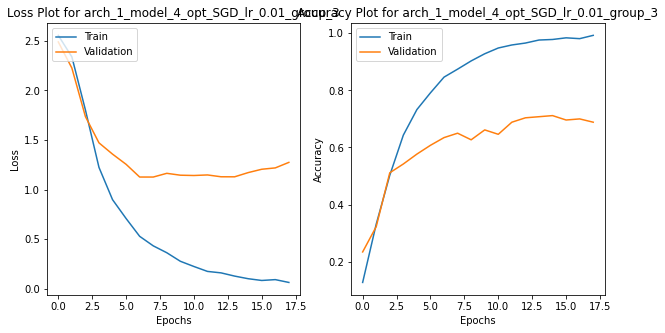

41/41 [==============================] - 1s 35ms/step - loss: 1.1956 - accuracy: 0.6215
arch_1_model_4_group_3_opt_Adam_lr_0.001
Epoch 1/250
33/33 [==============================] - 2s 52ms/step - loss: 2.6004 - accuracy: 0.1380 - val_loss: 2.1136 - val_accuracy: 0.4038
Epoch 2/250
33/33 [==============================] - 1s 45ms/step - loss: 1.7994 - accuracy: 0.5139 - val_loss: 1.5807 - val_accuracy: 0.4962
Epoch 3/250
33/33 [==============================] - 2s 46ms/step - loss: 1.1493 - accuracy: 0.7095 - val_loss: 1.4087 - val_accuracy: 0.5808
Epoch 4/250
33/33 [==============================] - 1s 44ms/step - loss: 0.8932 - accuracy: 0.7620 - val_loss: 1.2334 - val_accuracy: 0.6385
Epoch 5/250
33/33 [==============================] - 2s 48ms/step - loss: 0.6518 - accuracy: 0.8159 - val_loss: 1.1577 - val_accuracy: 0.6385
Epoch 6/250
33/33 [==============================] - 1s 45ms/step - loss: 0.4859 - accuracy: 0.8857 - val_loss: 1.0861 - val_accuracy: 0.6538
Epoch 7/250
33/33 [

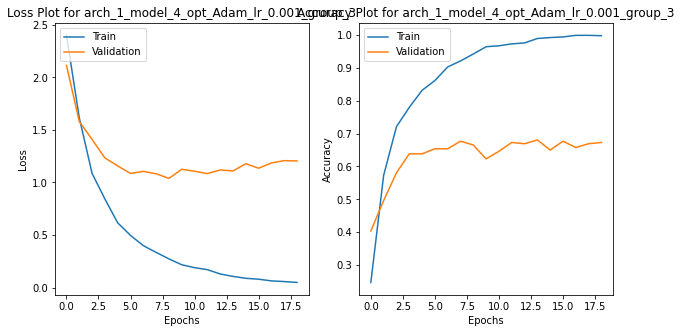

41/41 [==============================] - 1s 34ms/step - loss: 1.1508 - accuracy: 0.6485
arch_1_model_4_group_3_opt_Adam_lr_0.01
Epoch 1/250
33/33 [==============================] - 2s 50ms/step - loss: 4.7333 - accuracy: 0.1996 - val_loss: 1.6935 - val_accuracy: 0.4654
Epoch 2/250
33/33 [==============================] - 2s 46ms/step - loss: 1.2398 - accuracy: 0.6114 - val_loss: 1.5077 - val_accuracy: 0.5462
Epoch 3/250
33/33 [==============================] - 2s 52ms/step - loss: 0.8150 - accuracy: 0.7352 - val_loss: 1.4521 - val_accuracy: 0.5500
Epoch 4/250
33/33 [==============================] - 2s 45ms/step - loss: 0.6851 - accuracy: 0.8045 - val_loss: 1.2531 - val_accuracy: 0.6269
Epoch 5/250
33/33 [==============================] - 1s 45ms/step - loss: 0.4324 - accuracy: 0.8511 - val_loss: 1.1960 - val_accuracy: 0.6000
Epoch 6/250
33/33 [==============================] - 1s 43ms/step - loss: 0.3667 - accuracy: 0.8696 - val_loss: 1.2528 - val_accuracy: 0.5615
Epoch 7/250
33/33 [=

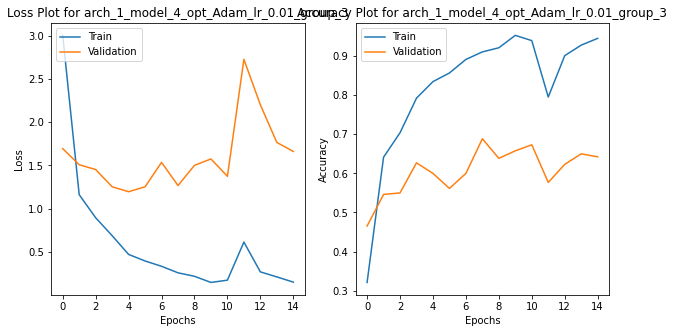

41/41 [==============================] - 1s 35ms/step - loss: 1.4054 - accuracy: 0.5846
arch_1_model_5_group_3_opt_SGD_lr_0.001
Epoch 1/250
33/33 [==============================] - 2s 52ms/step - loss: 2.6065 - accuracy: 0.0683 - val_loss: 2.5536 - val_accuracy: 0.0769
Epoch 2/250
33/33 [==============================] - 2s 47ms/step - loss: 2.5632 - accuracy: 0.0728 - val_loss: 2.5370 - val_accuracy: 0.1423
Epoch 3/250
33/33 [==============================] - 2s 48ms/step - loss: 2.5386 - accuracy: 0.1191 - val_loss: 2.5239 - val_accuracy: 0.1769
Epoch 4/250
33/33 [==============================] - 1s 45ms/step - loss: 2.5207 - accuracy: 0.1740 - val_loss: 2.5064 - val_accuracy: 0.2654
Epoch 5/250
33/33 [==============================] - 2s 46ms/step - loss: 2.4974 - accuracy: 0.2142 - val_loss: 2.4901 - val_accuracy: 0.2308
Epoch 6/250
33/33 [==============================] - 2s 46ms/step - loss: 2.4746 - accuracy: 0.2459 - val_loss: 2.4666 - val_accuracy: 0.3962
Epoch 7/250
33/33 [=

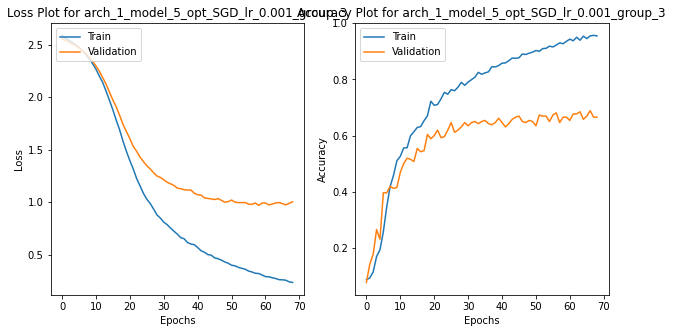

41/41 [==============================] - 1s 34ms/step - loss: 1.1246 - accuracy: 0.6469
arch_1_model_5_group_3_opt_SGD_lr_0.01
Epoch 1/250
33/33 [==============================] - 2s 52ms/step - loss: 2.5742 - accuracy: 0.1042 - val_loss: 2.4852 - val_accuracy: 0.2731
Epoch 2/250
33/33 [==============================] - 1s 45ms/step - loss: 2.4014 - accuracy: 0.3163 - val_loss: 2.2004 - val_accuracy: 0.3077
Epoch 3/250
33/33 [==============================] - 1s 45ms/step - loss: 1.9137 - accuracy: 0.4576 - val_loss: 1.5981 - val_accuracy: 0.5346
Epoch 4/250
33/33 [==============================] - 1s 44ms/step - loss: 1.2647 - accuracy: 0.6339 - val_loss: 1.3954 - val_accuracy: 0.5038
Epoch 5/250
33/33 [==============================] - 2s 48ms/step - loss: 0.9049 - accuracy: 0.7194 - val_loss: 1.3154 - val_accuracy: 0.5769
Epoch 6/250
33/33 [==============================] - 1s 45ms/step - loss: 0.6502 - accuracy: 0.8128 - val_loss: 1.1715 - val_accuracy: 0.5923
Epoch 7/250
33/33 [==

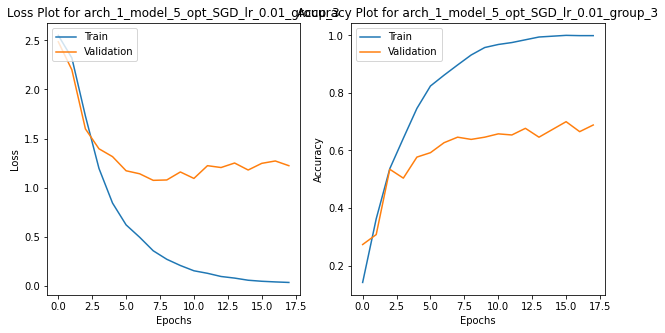

41/41 [==============================] - 1s 34ms/step - loss: 1.2308 - accuracy: 0.6308
arch_1_model_5_group_3_opt_Adam_lr_0.001
Epoch 1/250
33/33 [==============================] - 2s 52ms/step - loss: 2.5957 - accuracy: 0.2271 - val_loss: 1.9515 - val_accuracy: 0.4385
Epoch 2/250
33/33 [==============================] - 1s 45ms/step - loss: 1.5429 - accuracy: 0.6099 - val_loss: 1.4498 - val_accuracy: 0.5423
Epoch 3/250
33/33 [==============================] - 1s 45ms/step - loss: 0.9658 - accuracy: 0.7517 - val_loss: 1.1877 - val_accuracy: 0.6308
Epoch 4/250
33/33 [==============================] - 2s 47ms/step - loss: 0.7267 - accuracy: 0.7908 - val_loss: 1.1083 - val_accuracy: 0.6462
Epoch 5/250
33/33 [==============================] - 2s 47ms/step - loss: 0.5467 - accuracy: 0.8515 - val_loss: 1.0487 - val_accuracy: 0.6846
Epoch 6/250
33/33 [==============================] - 2s 48ms/step - loss: 0.4263 - accuracy: 0.8834 - val_loss: 1.0320 - val_accuracy: 0.6615
Epoch 7/250
33/33 [

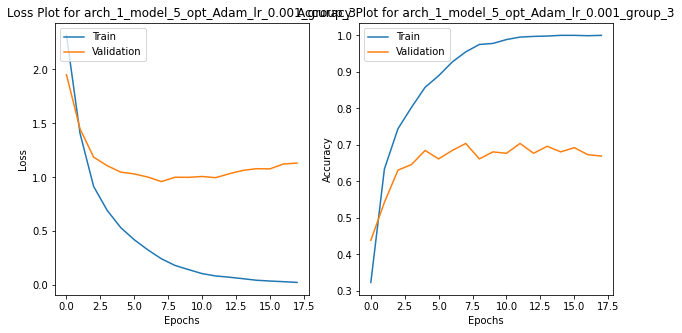

41/41 [==============================] - 1s 34ms/step - loss: 1.1227 - accuracy: 0.6569
arch_1_model_5_group_3_opt_Adam_lr_0.01
Epoch 1/250
33/33 [==============================] - 2s 51ms/step - loss: 6.2916 - accuracy: 0.1475 - val_loss: 1.9481 - val_accuracy: 0.3654
Epoch 2/250
33/33 [==============================] - 2s 45ms/step - loss: 1.3831 - accuracy: 0.6002 - val_loss: 1.5026 - val_accuracy: 0.5423
Epoch 3/250
33/33 [==============================] - 2s 47ms/step - loss: 0.8643 - accuracy: 0.7529 - val_loss: 1.6509 - val_accuracy: 0.5769
Epoch 4/250
33/33 [==============================] - 1s 43ms/step - loss: 0.5751 - accuracy: 0.7851 - val_loss: 1.4805 - val_accuracy: 0.5769
Epoch 5/250
33/33 [==============================] - 2s 48ms/step - loss: 0.4361 - accuracy: 0.8582 - val_loss: 1.4698 - val_accuracy: 0.5885
Epoch 6/250
33/33 [==============================] - 1s 45ms/step - loss: 0.3096 - accuracy: 0.9154 - val_loss: 1.5129 - val_accuracy: 0.6115
Epoch 7/250
33/33 [=

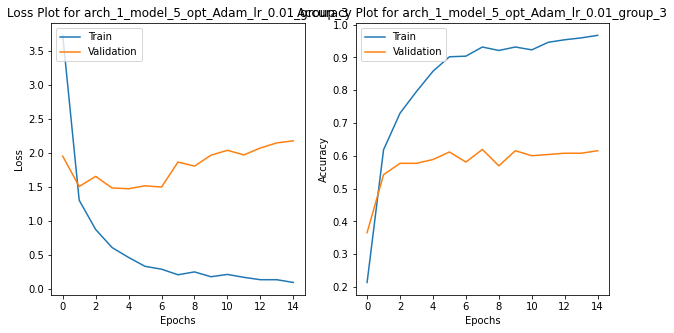

41/41 [==============================] - 1s 34ms/step - loss: 1.4562 - accuracy: 0.5731
arch_1_model_6_group_3_opt_SGD_lr_0.001
Epoch 1/250
33/33 [==============================] - 2s 53ms/step - loss: 2.5884 - accuracy: 0.0683 - val_loss: 2.5602 - val_accuracy: 0.0615
Epoch 2/250
33/33 [==============================] - 2s 49ms/step - loss: 2.5624 - accuracy: 0.0849 - val_loss: 2.5471 - val_accuracy: 0.1423
Epoch 3/250
33/33 [==============================] - 2s 46ms/step - loss: 2.5385 - accuracy: 0.1474 - val_loss: 2.5316 - val_accuracy: 0.2231
Epoch 4/250
33/33 [==============================] - 1s 44ms/step - loss: 2.5218 - accuracy: 0.1830 - val_loss: 2.5172 - val_accuracy: 0.2654
Epoch 5/250
33/33 [==============================] - 2s 52ms/step - loss: 2.4962 - accuracy: 0.2470 - val_loss: 2.4996 - val_accuracy: 0.3038
Epoch 6/250
33/33 [==============================] - 2s 46ms/step - loss: 2.4723 - accuracy: 0.2735 - val_loss: 2.4756 - val_accuracy: 0.3962
Epoch 7/250
33/33 [=

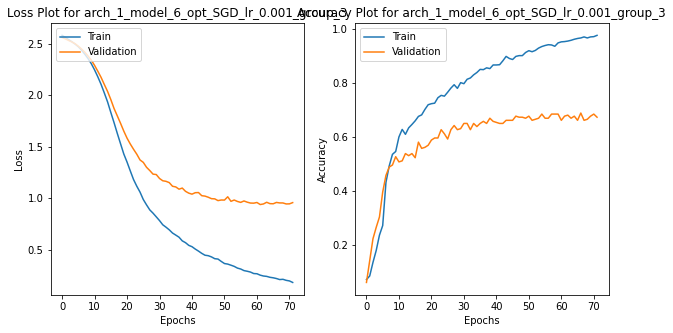

41/41 [==============================] - 1s 33ms/step - loss: 1.0720 - accuracy: 0.6646
arch_1_model_6_group_3_opt_SGD_lr_0.01
Epoch 1/250
33/33 [==============================] - 2s 52ms/step - loss: 2.5766 - accuracy: 0.1118 - val_loss: 2.4800 - val_accuracy: 0.2962
Epoch 2/250
33/33 [==============================] - 2s 50ms/step - loss: 2.3904 - accuracy: 0.4020 - val_loss: 2.1362 - val_accuracy: 0.4385
Epoch 3/250
33/33 [==============================] - 2s 46ms/step - loss: 1.8711 - accuracy: 0.5254 - val_loss: 1.6374 - val_accuracy: 0.4962
Epoch 4/250
33/33 [==============================] - 2s 47ms/step - loss: 1.1521 - accuracy: 0.6767 - val_loss: 1.5721 - val_accuracy: 0.5077
Epoch 5/250
33/33 [==============================] - 2s 55ms/step - loss: 0.8318 - accuracy: 0.7450 - val_loss: 1.1731 - val_accuracy: 0.6269
Epoch 6/250
33/33 [==============================] - 2s 46ms/step - loss: 0.6290 - accuracy: 0.8170 - val_loss: 1.2568 - val_accuracy: 0.6077
Epoch 7/250
33/33 [==

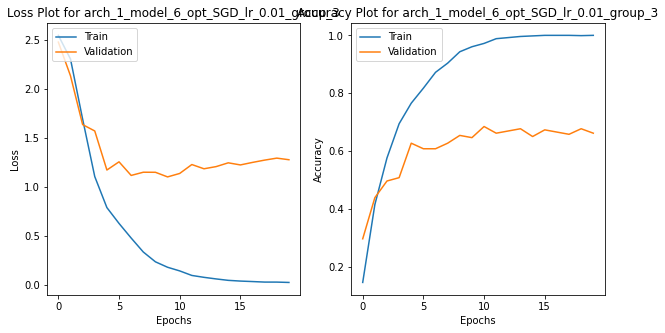

41/41 [==============================] - 1s 34ms/step - loss: 1.2368 - accuracy: 0.6415
arch_1_model_6_group_3_opt_Adam_lr_0.001
Epoch 1/250
33/33 [==============================] - 2s 54ms/step - loss: 2.5402 - accuracy: 0.2311 - val_loss: 1.5450 - val_accuracy: 0.5346
Epoch 2/250
33/33 [==============================] - 2s 49ms/step - loss: 0.9631 - accuracy: 0.7378 - val_loss: 1.1695 - val_accuracy: 0.6038
Epoch 3/250
33/33 [==============================] - 2s 46ms/step - loss: 0.4945 - accuracy: 0.8874 - val_loss: 1.0946 - val_accuracy: 0.6269
Epoch 4/250
33/33 [==============================] - 2s 46ms/step - loss: 0.2520 - accuracy: 0.9403 - val_loss: 1.0399 - val_accuracy: 0.6692
Epoch 5/250
33/33 [==============================] - 2s 55ms/step - loss: 0.1522 - accuracy: 0.9714 - val_loss: 1.0467 - val_accuracy: 0.6846
Epoch 6/250
33/33 [==============================] - 2s 48ms/step - loss: 0.0804 - accuracy: 0.9911 - val_loss: 1.1420 - val_accuracy: 0.6769
Epoch 7/250
33/33 [

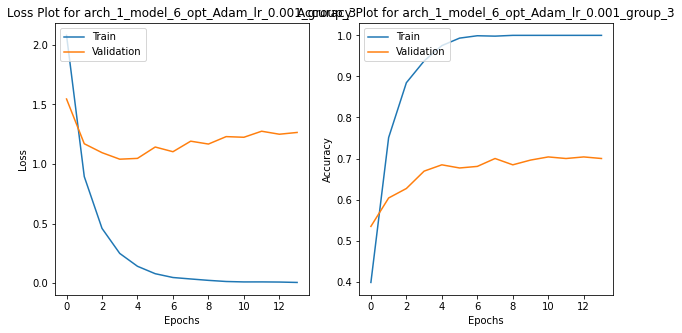

41/41 [==============================] - 1s 35ms/step - loss: 1.1908 - accuracy: 0.6754
arch_1_model_6_group_3_opt_Adam_lr_0.01
Epoch 1/250
33/33 [==============================] - 2s 54ms/step - loss: 12.9517 - accuracy: 0.0786 - val_loss: 2.5672 - val_accuracy: 0.0769
Epoch 2/250
33/33 [==============================] - 2s 48ms/step - loss: 2.5710 - accuracy: 0.0676 - val_loss: 2.5653 - val_accuracy: 0.0769
Epoch 3/250
33/33 [==============================] - 2s 46ms/step - loss: 2.5657 - accuracy: 0.0781 - val_loss: 2.5653 - val_accuracy: 0.0769
Epoch 4/250
33/33 [==============================] - 2s 48ms/step - loss: 2.5668 - accuracy: 0.0756 - val_loss: 2.5652 - val_accuracy: 0.0769
Epoch 5/250
33/33 [==============================] - 2s 55ms/step - loss: 2.5660 - accuracy: 0.0583 - val_loss: 2.5650 - val_accuracy: 0.0769
Epoch 6/250
33/33 [==============================] - 2s 48ms/step - loss: 2.5659 - accuracy: 0.0662 - val_loss: 2.5651 - val_accuracy: 0.0769
Epoch 7/250
33/33 [

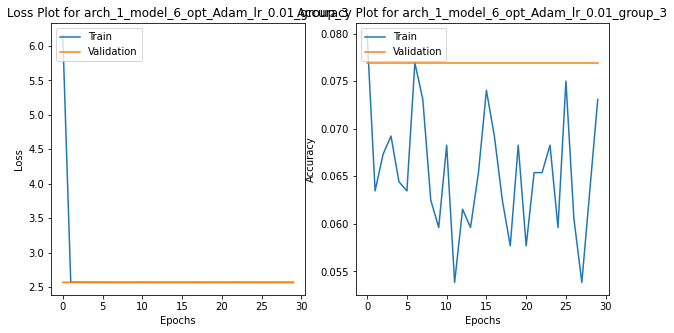

41/41 [==============================] - 1s 35ms/step - loss: 2.5650 - accuracy: 0.0769
arch_2_model_1_group_3_opt_SGD_lr_0.001
Epoch 1/250
33/33 [==============================] - 2s 54ms/step - loss: 2.5768 - accuracy: 0.0736 - val_loss: 2.5591 - val_accuracy: 0.0808
Epoch 2/250
33/33 [==============================] - 1s 45ms/step - loss: 2.5689 - accuracy: 0.0974 - val_loss: 2.5545 - val_accuracy: 0.1115
Epoch 3/250
33/33 [==============================] - 2s 47ms/step - loss: 2.5601 - accuracy: 0.0853 - val_loss: 2.5512 - val_accuracy: 0.1192
Epoch 4/250
33/33 [==============================] - 2s 46ms/step - loss: 2.5627 - accuracy: 0.0728 - val_loss: 2.5490 - val_accuracy: 0.1500
Epoch 5/250
33/33 [==============================] - 2s 53ms/step - loss: 2.5609 - accuracy: 0.0830 - val_loss: 2.5464 - val_accuracy: 0.1654
Epoch 6/250
33/33 [==============================] - 2s 46ms/step - loss: 2.5547 - accuracy: 0.1123 - val_loss: 2.5432 - val_accuracy: 0.1615
Epoch 7/250
33/33 [=

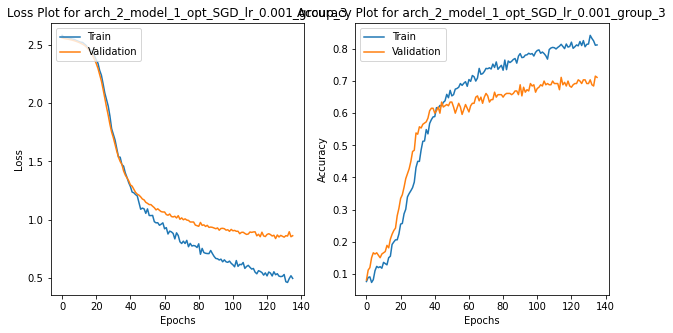

41/41 [==============================] - 1s 35ms/step - loss: 1.0257 - accuracy: 0.6608
arch_2_model_1_group_3_opt_SGD_lr_0.01
Epoch 1/250
33/33 [==============================] - 2s 52ms/step - loss: 2.5687 - accuracy: 0.0832 - val_loss: 2.5376 - val_accuracy: 0.2000
Epoch 2/250
33/33 [==============================] - 1s 45ms/step - loss: 2.5125 - accuracy: 0.1687 - val_loss: 2.4170 - val_accuracy: 0.3346
Epoch 3/250
33/33 [==============================] - 2s 47ms/step - loss: 2.2978 - accuracy: 0.2677 - val_loss: 2.0162 - val_accuracy: 0.4500
Epoch 4/250
33/33 [==============================] - 2s 47ms/step - loss: 1.7904 - accuracy: 0.4321 - val_loss: 1.7172 - val_accuracy: 0.4923
Epoch 5/250
33/33 [==============================] - 2s 48ms/step - loss: 1.5012 - accuracy: 0.5587 - val_loss: 1.4674 - val_accuracy: 0.5538
Epoch 6/250
33/33 [==============================] - 2s 48ms/step - loss: 1.2077 - accuracy: 0.6234 - val_loss: 1.2146 - val_accuracy: 0.6000
Epoch 7/250
33/33 [==

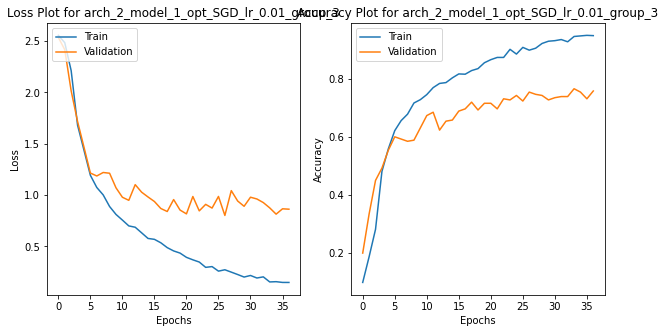

41/41 [==============================] - 2s 35ms/step - loss: 1.0325 - accuracy: 0.7246
arch_2_model_1_group_3_opt_Adam_lr_0.001
Epoch 1/250
33/33 [==============================] - 2s 53ms/step - loss: 2.5310 - accuracy: 0.1218 - val_loss: 2.0480 - val_accuracy: 0.3308
Epoch 2/250
33/33 [==============================] - 2s 47ms/step - loss: 1.7896 - accuracy: 0.4436 - val_loss: 1.4411 - val_accuracy: 0.5577
Epoch 3/250
33/33 [==============================] - 2s 46ms/step - loss: 1.3357 - accuracy: 0.5673 - val_loss: 1.2737 - val_accuracy: 0.5808
Epoch 4/250
33/33 [==============================] - 2s 46ms/step - loss: 1.0391 - accuracy: 0.6725 - val_loss: 1.1432 - val_accuracy: 0.6346
Epoch 5/250
33/33 [==============================] - 2s 46ms/step - loss: 0.8283 - accuracy: 0.7274 - val_loss: 1.1255 - val_accuracy: 0.6269
Epoch 6/250
33/33 [==============================] - 2s 46ms/step - loss: 0.7294 - accuracy: 0.7632 - val_loss: 0.9617 - val_accuracy: 0.6769
Epoch 7/250
33/33 [

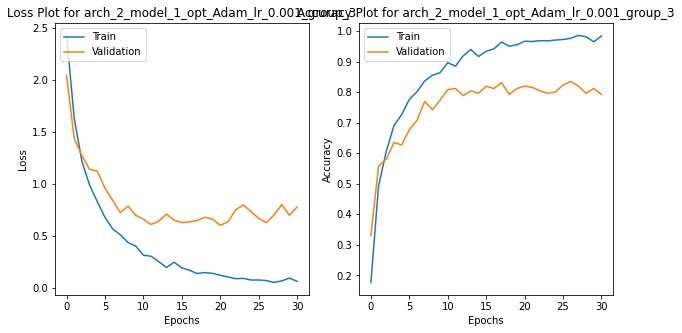

41/41 [==============================] - 1s 34ms/step - loss: 0.8747 - accuracy: 0.7631
arch_2_model_1_group_3_opt_Adam_lr_0.01
Epoch 1/250
33/33 [==============================] - 2s 52ms/step - loss: 2.5229 - accuracy: 0.1208 - val_loss: 1.9957 - val_accuracy: 0.3731
Epoch 2/250
33/33 [==============================] - 1s 45ms/step - loss: 1.6057 - accuracy: 0.4597 - val_loss: 1.3803 - val_accuracy: 0.5231
Epoch 3/250
33/33 [==============================] - 2s 48ms/step - loss: 1.1955 - accuracy: 0.6383 - val_loss: 1.2795 - val_accuracy: 0.5808
Epoch 4/250
33/33 [==============================] - 2s 46ms/step - loss: 0.9202 - accuracy: 0.6881 - val_loss: 1.1563 - val_accuracy: 0.6038
Epoch 5/250
33/33 [==============================] - 2s 48ms/step - loss: 0.7184 - accuracy: 0.7602 - val_loss: 1.1464 - val_accuracy: 0.6192
Epoch 6/250
33/33 [==============================] - 1s 45ms/step - loss: 0.6509 - accuracy: 0.7709 - val_loss: 0.9438 - val_accuracy: 0.6962
Epoch 7/250
33/33 [=

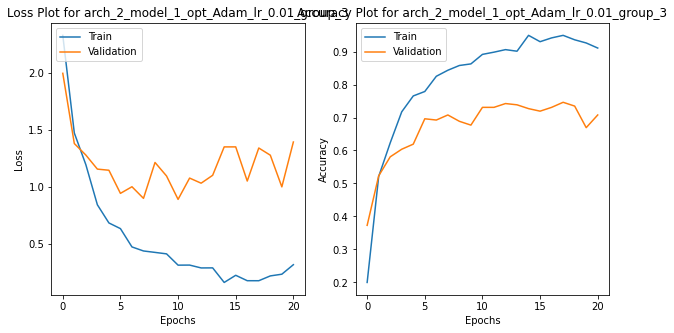

41/41 [==============================] - 1s 34ms/step - loss: 1.2207 - accuracy: 0.7154
arch_2_model_2_group_3_opt_SGD_lr_0.001
Epoch 1/250
33/33 [==============================] - 2s 53ms/step - loss: 2.5805 - accuracy: 0.0838 - val_loss: 2.5628 - val_accuracy: 0.0923
Epoch 2/250
33/33 [==============================] - 2s 47ms/step - loss: 2.5624 - accuracy: 0.0893 - val_loss: 2.5579 - val_accuracy: 0.1077
Epoch 3/250
33/33 [==============================] - 2s 48ms/step - loss: 2.5602 - accuracy: 0.1082 - val_loss: 2.5535 - val_accuracy: 0.1269
Epoch 4/250
33/33 [==============================] - 2s 48ms/step - loss: 2.5520 - accuracy: 0.1166 - val_loss: 2.5488 - val_accuracy: 0.1385
Epoch 5/250
33/33 [==============================] - 2s 49ms/step - loss: 2.5471 - accuracy: 0.1368 - val_loss: 2.5439 - val_accuracy: 0.1538
Epoch 6/250
33/33 [==============================] - 1s 45ms/step - loss: 2.5345 - accuracy: 0.1325 - val_loss: 2.5382 - val_accuracy: 0.1808
Epoch 7/250
33/33 [=

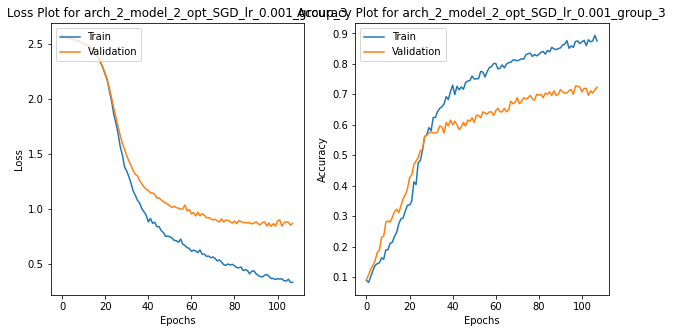

41/41 [==============================] - 1s 34ms/step - loss: 1.0054 - accuracy: 0.6785
arch_2_model_2_group_3_opt_SGD_lr_0.01
Epoch 1/250
33/33 [==============================] - 2s 55ms/step - loss: 2.5798 - accuracy: 0.1052 - val_loss: 2.5509 - val_accuracy: 0.1231
Epoch 2/250
33/33 [==============================] - 1s 45ms/step - loss: 2.5475 - accuracy: 0.1284 - val_loss: 2.5182 - val_accuracy: 0.2615
Epoch 3/250
33/33 [==============================] - 2s 46ms/step - loss: 2.4908 - accuracy: 0.2308 - val_loss: 2.3820 - val_accuracy: 0.3000
Epoch 4/250
33/33 [==============================] - 1s 44ms/step - loss: 2.2140 - accuracy: 0.3391 - val_loss: 1.8430 - val_accuracy: 0.4423
Epoch 5/250
33/33 [==============================] - 2s 49ms/step - loss: 1.5348 - accuracy: 0.5294 - val_loss: 1.4232 - val_accuracy: 0.5692
Epoch 6/250
33/33 [==============================] - 2s 47ms/step - loss: 1.1288 - accuracy: 0.6703 - val_loss: 1.1835 - val_accuracy: 0.5923
Epoch 7/250
33/33 [==

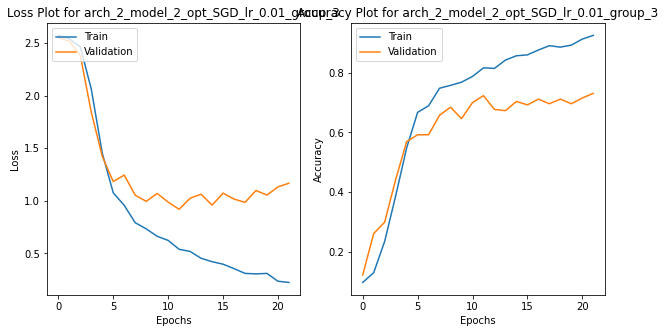

41/41 [==============================] - 1s 35ms/step - loss: 1.0960 - accuracy: 0.6492
arch_2_model_2_group_3_opt_Adam_lr_0.001
Epoch 1/250
33/33 [==============================] - 2s 51ms/step - loss: 2.5886 - accuracy: 0.1091 - val_loss: 2.2163 - val_accuracy: 0.2962
Epoch 2/250
33/33 [==============================] - 2s 46ms/step - loss: 1.8389 - accuracy: 0.4450 - val_loss: 1.5274 - val_accuracy: 0.5269
Epoch 3/250
33/33 [==============================] - 2s 46ms/step - loss: 1.1354 - accuracy: 0.6360 - val_loss: 1.1878 - val_accuracy: 0.5885
Epoch 4/250
33/33 [==============================] - 1s 45ms/step - loss: 0.8656 - accuracy: 0.7083 - val_loss: 1.1575 - val_accuracy: 0.6192
Epoch 5/250
33/33 [==============================] - 2s 46ms/step - loss: 0.6939 - accuracy: 0.7544 - val_loss: 1.0324 - val_accuracy: 0.6769
Epoch 6/250
33/33 [==============================] - 2s 48ms/step - loss: 0.6058 - accuracy: 0.7977 - val_loss: 1.0309 - val_accuracy: 0.7038
Epoch 7/250
33/33 [

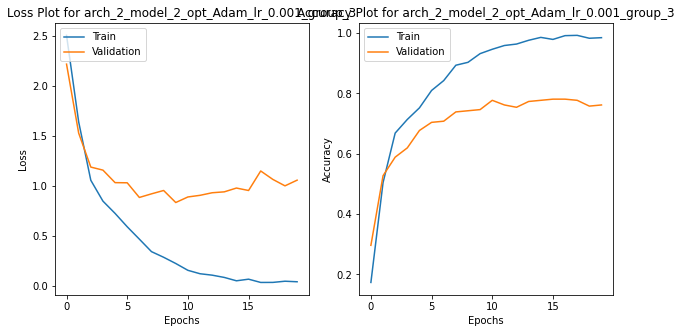

41/41 [==============================] - 1s 34ms/step - loss: 1.0539 - accuracy: 0.7131
arch_2_model_2_group_3_opt_Adam_lr_0.01
Epoch 1/250
33/33 [==============================] - 2s 53ms/step - loss: 2.9615 - accuracy: 0.0733 - val_loss: 2.2711 - val_accuracy: 0.2000
Epoch 2/250
33/33 [==============================] - 2s 49ms/step - loss: 1.8987 - accuracy: 0.4293 - val_loss: 1.4608 - val_accuracy: 0.5231
Epoch 3/250
33/33 [==============================] - 2s 47ms/step - loss: 1.0914 - accuracy: 0.6278 - val_loss: 1.0035 - val_accuracy: 0.6346
Epoch 4/250
33/33 [==============================] - 1s 45ms/step - loss: 0.7006 - accuracy: 0.7687 - val_loss: 1.1715 - val_accuracy: 0.6346
Epoch 5/250
33/33 [==============================] - 2s 49ms/step - loss: 0.5692 - accuracy: 0.8108 - val_loss: 1.0612 - val_accuracy: 0.6615
Epoch 6/250
33/33 [==============================] - 2s 47ms/step - loss: 0.4526 - accuracy: 0.8367 - val_loss: 1.0393 - val_accuracy: 0.7077
Epoch 7/250
33/33 [=

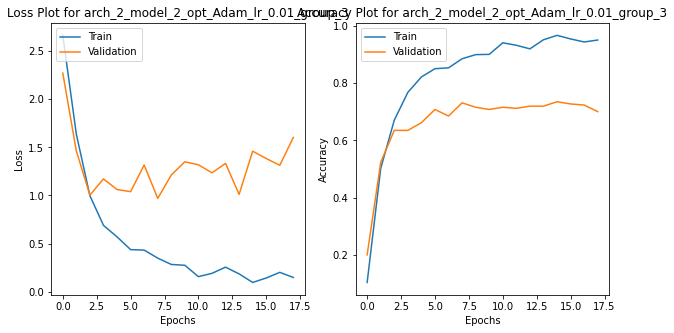

41/41 [==============================] - 1s 35ms/step - loss: 0.9975 - accuracy: 0.7423
arch_3_model_1_group_3_opt_SGD_lr_0.001
Epoch 1/250
33/33 [==============================] - 2s 55ms/step - loss: 2.5694 - accuracy: 0.0821 - val_loss: 2.5696 - val_accuracy: 0.0231
Epoch 2/250
33/33 [==============================] - 1s 45ms/step - loss: 2.5660 - accuracy: 0.0795 - val_loss: 2.5679 - val_accuracy: 0.0385
Epoch 3/250
33/33 [==============================] - 1s 44ms/step - loss: 2.5657 - accuracy: 0.0795 - val_loss: 2.5664 - val_accuracy: 0.0577
Epoch 4/250
33/33 [==============================] - 2s 48ms/step - loss: 2.5632 - accuracy: 0.0704 - val_loss: 2.5660 - val_accuracy: 0.0692
Epoch 5/250
33/33 [==============================] - 2s 48ms/step - loss: 2.5637 - accuracy: 0.0705 - val_loss: 2.5654 - val_accuracy: 0.0731
Epoch 6/250
33/33 [==============================] - 2s 47ms/step - loss: 2.5648 - accuracy: 0.0694 - val_loss: 2.5649 - val_accuracy: 0.0769
Epoch 7/250
33/33 [=

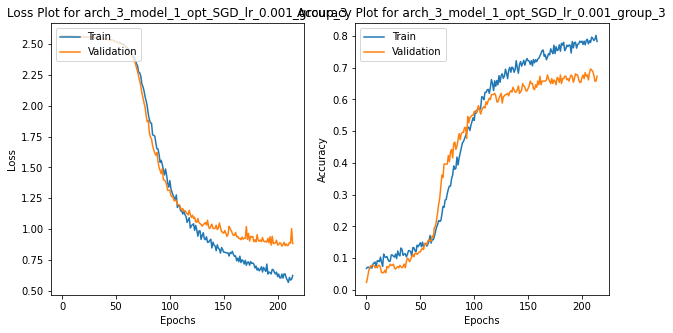

41/41 [==============================] - 2s 36ms/step - loss: 0.9114 - accuracy: 0.6762
arch_3_model_1_group_3_opt_SGD_lr_0.01
Epoch 1/250
33/33 [==============================] - 2s 57ms/step - loss: 2.5694 - accuracy: 0.0881 - val_loss: 2.5629 - val_accuracy: 0.0808
Epoch 2/250
33/33 [==============================] - 2s 47ms/step - loss: 2.5657 - accuracy: 0.0848 - val_loss: 2.5632 - val_accuracy: 0.1038
Epoch 3/250
33/33 [==============================] - 2s 47ms/step - loss: 2.5631 - accuracy: 0.1028 - val_loss: 2.5618 - val_accuracy: 0.0962
Epoch 4/250
33/33 [==============================] - 2s 46ms/step - loss: 2.5629 - accuracy: 0.0958 - val_loss: 2.5598 - val_accuracy: 0.0808
Epoch 5/250
33/33 [==============================] - 2s 48ms/step - loss: 2.5603 - accuracy: 0.0992 - val_loss: 2.5560 - val_accuracy: 0.0923
Epoch 6/250
33/33 [==============================] - 2s 49ms/step - loss: 2.5565 - accuracy: 0.1226 - val_loss: 2.5484 - val_accuracy: 0.1269
Epoch 7/250
33/33 [==

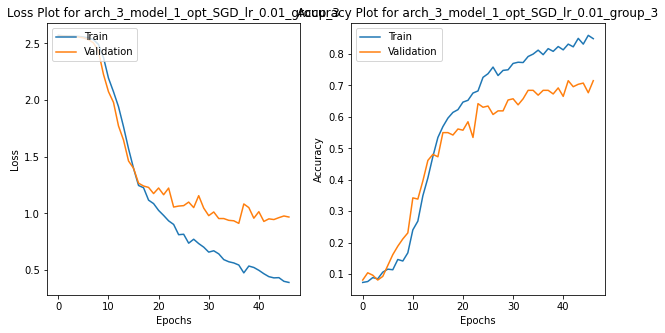

41/41 [==============================] - 1s 33ms/step - loss: 0.9962 - accuracy: 0.6731
arch_3_model_1_group_3_opt_Adam_lr_0.001
Epoch 1/250
33/33 [==============================] - 3s 59ms/step - loss: 2.5576 - accuracy: 0.0671 - val_loss: 2.5158 - val_accuracy: 0.1692
Epoch 2/250
33/33 [==============================] - 1s 44ms/step - loss: 2.4347 - accuracy: 0.1705 - val_loss: 2.1023 - val_accuracy: 0.3615
Epoch 3/250
33/33 [==============================] - 2s 46ms/step - loss: 2.0846 - accuracy: 0.3021 - val_loss: 1.7578 - val_accuracy: 0.5077
Epoch 4/250
33/33 [==============================] - 2s 46ms/step - loss: 1.7063 - accuracy: 0.4573 - val_loss: 1.5118 - val_accuracy: 0.5154
Epoch 5/250
33/33 [==============================] - 2s 47ms/step - loss: 1.3829 - accuracy: 0.5574 - val_loss: 1.3058 - val_accuracy: 0.5808
Epoch 6/250
33/33 [==============================] - 1s 45ms/step - loss: 1.2901 - accuracy: 0.5955 - val_loss: 1.2660 - val_accuracy: 0.5769
Epoch 7/250
33/33 [

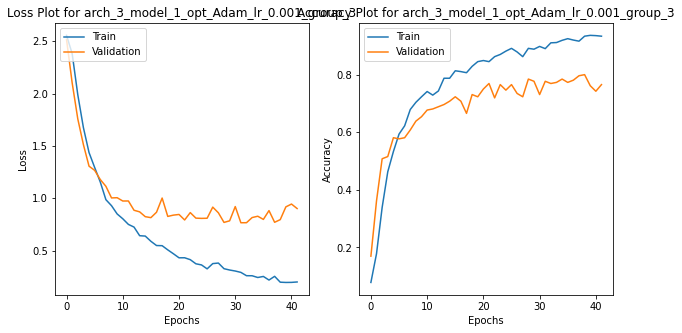

41/41 [==============================] - 1s 34ms/step - loss: 0.8720 - accuracy: 0.7338
arch_3_model_1_group_3_opt_Adam_lr_0.01
Epoch 1/250
33/33 [==============================] - 2s 54ms/step - loss: 2.6144 - accuracy: 0.0612 - val_loss: 2.5572 - val_accuracy: 0.0769
Epoch 2/250
33/33 [==============================] - 2s 48ms/step - loss: 2.5437 - accuracy: 0.1152 - val_loss: 2.3557 - val_accuracy: 0.1500
Epoch 3/250
33/33 [==============================] - 1s 45ms/step - loss: 2.3595 - accuracy: 0.1866 - val_loss: 2.1539 - val_accuracy: 0.2308
Epoch 4/250
33/33 [==============================] - 1s 45ms/step - loss: 1.9788 - accuracy: 0.2821 - val_loss: 1.7930 - val_accuracy: 0.4423
Epoch 5/250
33/33 [==============================] - 2s 50ms/step - loss: 1.8107 - accuracy: 0.3693 - val_loss: 1.6842 - val_accuracy: 0.3385
Epoch 6/250
33/33 [==============================] - 2s 47ms/step - loss: 1.6109 - accuracy: 0.3825 - val_loss: 1.8030 - val_accuracy: 0.3500
Epoch 7/250
33/33 [=

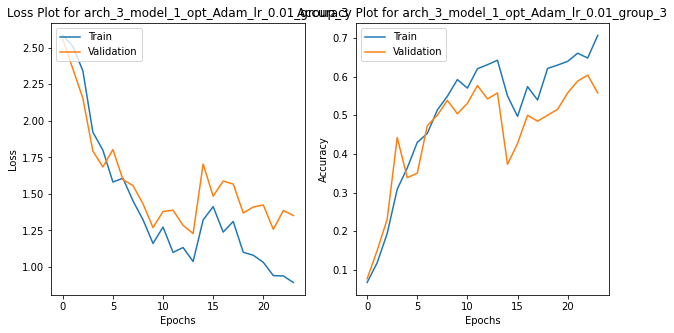

41/41 [==============================] - 1s 34ms/step - loss: 1.2028 - accuracy: 0.5938
arch_3_model_2_group_3_opt_SGD_lr_0.001
Epoch 1/250
33/33 [==============================] - 2s 57ms/step - loss: 2.5673 - accuracy: 0.0904 - val_loss: 2.5656 - val_accuracy: 0.0731
Epoch 2/250
33/33 [==============================] - 2s 47ms/step - loss: 2.5657 - accuracy: 0.0789 - val_loss: 2.5653 - val_accuracy: 0.0615
Epoch 3/250
33/33 [==============================] - 2s 48ms/step - loss: 2.5666 - accuracy: 0.0877 - val_loss: 2.5650 - val_accuracy: 0.0692
Epoch 4/250
33/33 [==============================] - 1s 45ms/step - loss: 2.5660 - accuracy: 0.0754 - val_loss: 2.5648 - val_accuracy: 0.0654
Epoch 5/250
33/33 [==============================] - 2s 48ms/step - loss: 2.5665 - accuracy: 0.0716 - val_loss: 2.5645 - val_accuracy: 0.0462
Epoch 6/250
33/33 [==============================] - 1s 45ms/step - loss: 2.5631 - accuracy: 0.0908 - val_loss: 2.5643 - val_accuracy: 0.0462
Epoch 7/250
33/33 [=

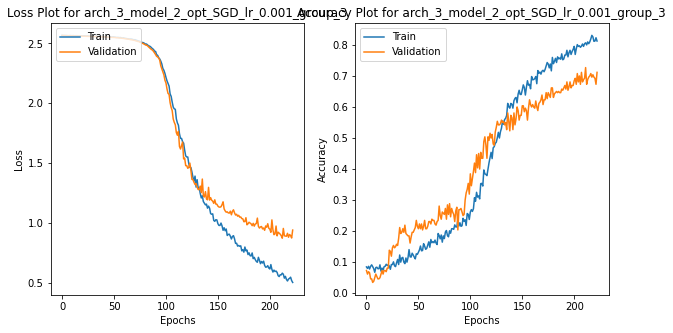

41/41 [==============================] - 1s 35ms/step - loss: 1.0227 - accuracy: 0.6800
arch_3_model_2_group_3_opt_SGD_lr_0.01
Epoch 1/250
33/33 [==============================] - 2s 53ms/step - loss: 2.5669 - accuracy: 0.0679 - val_loss: 2.5639 - val_accuracy: 0.0846
Epoch 2/250
33/33 [==============================] - 1s 45ms/step - loss: 2.5648 - accuracy: 0.0761 - val_loss: 2.5637 - val_accuracy: 0.0769
Epoch 3/250
33/33 [==============================] - 2s 46ms/step - loss: 2.5651 - accuracy: 0.0832 - val_loss: 2.5629 - val_accuracy: 0.0808
Epoch 4/250
33/33 [==============================] - 1s 44ms/step - loss: 2.5647 - accuracy: 0.0928 - val_loss: 2.5614 - val_accuracy: 0.1231
Epoch 5/250
33/33 [==============================] - 2s 49ms/step - loss: 2.5613 - accuracy: 0.1149 - val_loss: 2.5599 - val_accuracy: 0.1115
Epoch 6/250
33/33 [==============================] - 2s 50ms/step - loss: 2.5600 - accuracy: 0.0929 - val_loss: 2.5579 - val_accuracy: 0.1462
Epoch 7/250
33/33 [==

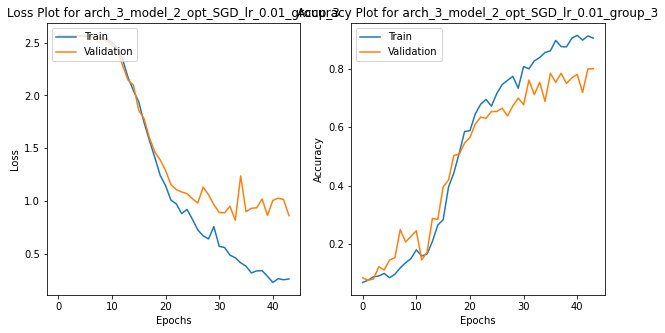

41/41 [==============================] - 1s 34ms/step - loss: 0.9950 - accuracy: 0.7115
arch_3_model_2_group_3_opt_Adam_lr_0.001
Epoch 1/250
33/33 [==============================] - 3s 53ms/step - loss: 2.5669 - accuracy: 0.0770 - val_loss: 2.5615 - val_accuracy: 0.1115
Epoch 2/250
33/33 [==============================] - 2s 46ms/step - loss: 2.5587 - accuracy: 0.1071 - val_loss: 2.4852 - val_accuracy: 0.0769
Epoch 3/250
33/33 [==============================] - 2s 46ms/step - loss: 2.3956 - accuracy: 0.1515 - val_loss: 1.9176 - val_accuracy: 0.3269
Epoch 4/250
33/33 [==============================] - 2s 47ms/step - loss: 1.8269 - accuracy: 0.3843 - val_loss: 1.6400 - val_accuracy: 0.4577
Epoch 5/250
33/33 [==============================] - 2s 49ms/step - loss: 1.4764 - accuracy: 0.4853 - val_loss: 1.3456 - val_accuracy: 0.5577
Epoch 6/250
33/33 [==============================] - 2s 46ms/step - loss: 1.1251 - accuracy: 0.6109 - val_loss: 1.1949 - val_accuracy: 0.6154
Epoch 7/250
33/33 [

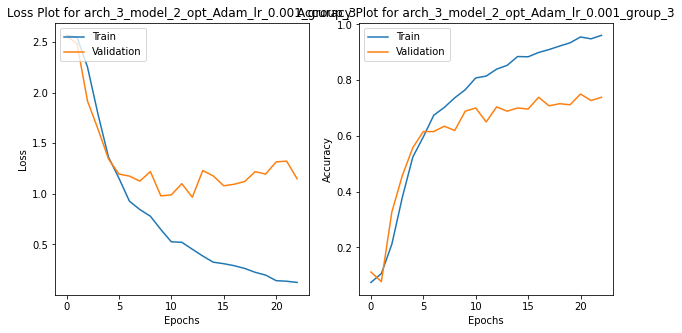

41/41 [==============================] - 1s 34ms/step - loss: 0.8880 - accuracy: 0.6977
arch_3_model_2_group_3_opt_Adam_lr_0.01
Epoch 1/250
33/33 [==============================] - 2s 53ms/step - loss: 2.5894 - accuracy: 0.0806 - val_loss: 2.5651 - val_accuracy: 0.0769
Epoch 2/250
33/33 [==============================] - 2s 50ms/step - loss: 2.5663 - accuracy: 0.0774 - val_loss: 2.5651 - val_accuracy: 0.0769
Epoch 3/250
33/33 [==============================] - 2s 46ms/step - loss: 2.5669 - accuracy: 0.0786 - val_loss: 2.5651 - val_accuracy: 0.0769
Epoch 4/250
33/33 [==============================] - 1s 45ms/step - loss: 2.5656 - accuracy: 0.0884 - val_loss: 2.5651 - val_accuracy: 0.0769
Epoch 5/250
33/33 [==============================] - 2s 48ms/step - loss: 2.5666 - accuracy: 0.0520 - val_loss: 2.5651 - val_accuracy: 0.0769
Epoch 6/250
33/33 [==============================] - 2s 48ms/step - loss: 2.5658 - accuracy: 0.0632 - val_loss: 2.5652 - val_accuracy: 0.0769
Epoch 7/250
33/33 [=

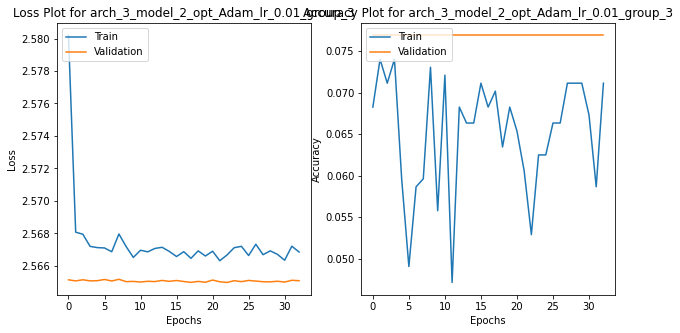

41/41 [==============================] - 1s 35ms/step - loss: 2.5650 - accuracy: 0.0769
arch_3_model_3_group_3_opt_SGD_lr_0.001
Epoch 1/250
33/33 [==============================] - 3s 60ms/step - loss: 2.5661 - accuracy: 0.0618 - val_loss: 2.5627 - val_accuracy: 0.0769
Epoch 2/250
33/33 [==============================] - 2s 46ms/step - loss: 2.5636 - accuracy: 0.0798 - val_loss: 2.5609 - val_accuracy: 0.0885
Epoch 3/250
33/33 [==============================] - 2s 49ms/step - loss: 2.5618 - accuracy: 0.0765 - val_loss: 2.5585 - val_accuracy: 0.1000
Epoch 4/250
33/33 [==============================] - 2s 48ms/step - loss: 2.5603 - accuracy: 0.0818 - val_loss: 2.5567 - val_accuracy: 0.1077
Epoch 5/250
33/33 [==============================] - 2s 46ms/step - loss: 2.5559 - accuracy: 0.1034 - val_loss: 2.5539 - val_accuracy: 0.1231
Epoch 6/250
33/33 [==============================] - 2s 48ms/step - loss: 2.5558 - accuracy: 0.1048 - val_loss: 2.5520 - val_accuracy: 0.1346
Epoch 7/250
33/33 [=

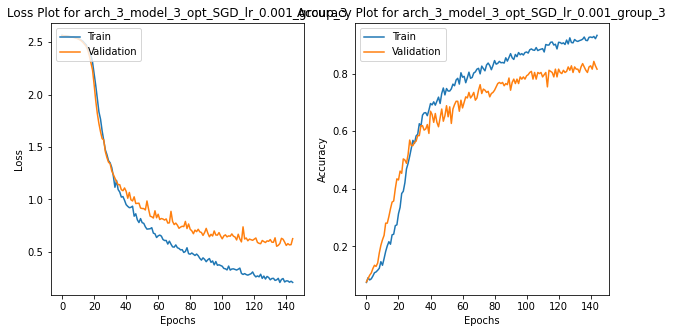

41/41 [==============================] - 1s 35ms/step - loss: 0.7052 - accuracy: 0.7877
arch_3_model_3_group_3_opt_SGD_lr_0.01
Epoch 1/250
33/33 [==============================] - 2s 53ms/step - loss: 2.5821 - accuracy: 0.0511 - val_loss: 2.5648 - val_accuracy: 0.0731
Epoch 2/250
33/33 [==============================] - 2s 47ms/step - loss: 2.5652 - accuracy: 0.0942 - val_loss: 2.5636 - val_accuracy: 0.1077
Epoch 3/250
33/33 [==============================] - 2s 46ms/step - loss: 2.5649 - accuracy: 0.0810 - val_loss: 2.5622 - val_accuracy: 0.1000
Epoch 4/250
33/33 [==============================] - 2s 47ms/step - loss: 2.5614 - accuracy: 0.0985 - val_loss: 2.5585 - val_accuracy: 0.1385
Epoch 5/250
33/33 [==============================] - 2s 47ms/step - loss: 2.5582 - accuracy: 0.1296 - val_loss: 2.5524 - val_accuracy: 0.1846
Epoch 6/250
33/33 [==============================] - 1s 44ms/step - loss: 2.5459 - accuracy: 0.1702 - val_loss: 2.5233 - val_accuracy: 0.2500
Epoch 7/250
33/33 [==

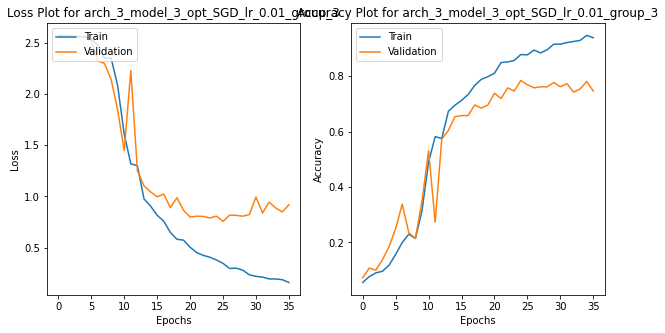

41/41 [==============================] - 1s 34ms/step - loss: 0.9354 - accuracy: 0.7254
arch_3_model_3_group_3_opt_Adam_lr_0.001
Epoch 1/250
33/33 [==============================] - 2s 54ms/step - loss: 2.5572 - accuracy: 0.0975 - val_loss: 2.2563 - val_accuracy: 0.3269
Epoch 2/250
33/33 [==============================] - 2s 47ms/step - loss: 1.9322 - accuracy: 0.3500 - val_loss: 1.4571 - val_accuracy: 0.5615
Epoch 3/250
33/33 [==============================] - 2s 47ms/step - loss: 1.2307 - accuracy: 0.6077 - val_loss: 1.0402 - val_accuracy: 0.6577
Epoch 4/250
33/33 [==============================] - 2s 45ms/step - loss: 0.8551 - accuracy: 0.7118 - val_loss: 0.8794 - val_accuracy: 0.7192
Epoch 5/250
33/33 [==============================] - 2s 45ms/step - loss: 0.7230 - accuracy: 0.7503 - val_loss: 0.7518 - val_accuracy: 0.7462
Epoch 6/250
33/33 [==============================] - 2s 47ms/step - loss: 0.5756 - accuracy: 0.7995 - val_loss: 0.8685 - val_accuracy: 0.7231
Epoch 7/250
33/33 [

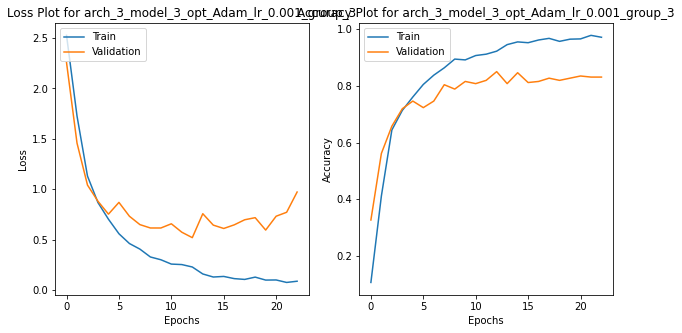

41/41 [==============================] - 2s 36ms/step - loss: 0.6833 - accuracy: 0.8062
arch_3_model_3_group_3_opt_Adam_lr_0.01
Epoch 1/250
33/33 [==============================] - 2s 54ms/step - loss: 2.5830 - accuracy: 0.0643 - val_loss: 2.5655 - val_accuracy: 0.0769
Epoch 2/250
33/33 [==============================] - 1s 45ms/step - loss: 2.5653 - accuracy: 0.0812 - val_loss: 2.5652 - val_accuracy: 0.0769
Epoch 3/250
33/33 [==============================] - 2s 47ms/step - loss: 2.5662 - accuracy: 0.0778 - val_loss: 2.5653 - val_accuracy: 0.0769
Epoch 4/250
33/33 [==============================] - 1s 44ms/step - loss: 2.5669 - accuracy: 0.0736 - val_loss: 2.5652 - val_accuracy: 0.0769
Epoch 5/250
33/33 [==============================] - 2s 47ms/step - loss: 2.5657 - accuracy: 0.0788 - val_loss: 2.5651 - val_accuracy: 0.0769
Epoch 6/250
33/33 [==============================] - 2s 51ms/step - loss: 2.5660 - accuracy: 0.0866 - val_loss: 2.5651 - val_accuracy: 0.0769
Epoch 7/250
33/33 [=

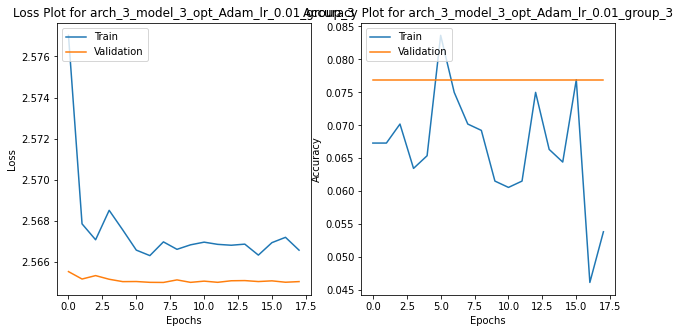

41/41 [==============================] - 1s 33ms/step - loss: 2.5650 - accuracy: 0.0769


In [10]:
main_path = '/content/gdrive/My Drive/Springboard Projects/Capstone_Three'
group_list = ['group_1', 'group_2', 'group_3']
input_shape=(45,45,1)
result_dict = dict()
result_dict['architecture'] = list()
result_dict['model_num'] = list()
result_dict['group'] = list()
result_dict['optimizer'] = list()
result_dict['learning_rate'] = list()
result_dict['valid_accuracy']=list()
result_dict['test_accuracy'] = list()
for group in group_list:
  path = main_path + '/' + group
  data = datagen(path, validation_split=0.2)
  train_data = data.train_data
  valid_data = data.valid_data
  test_data = data.test_data
  num_class = train_data.num_classes
  for arch in experiments['Architecture'].unique():
    for modelnum in experiments[experiments['Architecture']==arch]['Model_Number']:
      for optimizer in ['SGD', 'Adam']:
        for lr in [.001, .01]:
          tf.keras.backend.clear_session()
          model = model_create(arch, modelnum, experiments, input_shape, num_class).model_generate()
          my_optimizer, early_stopping_monitor = opt_callbacks(optimizer, lr, patience=10)
          model.compile(optimizer=my_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
          print(arch+'_'+modelnum+'_'+group+'_opt_'+optimizer+'_lr_'+str(lr))
          training = model.fit(train_data, epochs=250, validation_data=valid_data, callbacks=[early_stopping_monitor])
          print(arch+'_'+modelnum+'_'+group+'_opt_'+optimizer+'_lr_'+str(lr))
          model.summary()
          save_plot = save_plot_model(model, (arch+'_'+modelnum+'_opt_'+optimizer+'_lr_'+str(lr)), training, group, main_path+'/models')
          save_plot.save_model()
          save_plot.plot_model_hist()
          result_dict['architecture'].append(arch)
          result_dict['model_num'].append(modelnum)
          result_dict['group'].append(group)
          result_dict['optimizer'].append(optimizer)
          result_dict['learning_rate'].append(lr)
          result_dict['valid_accuracy'].append(model.evaluate(valid_data)[1])
          result_dict['test_accuracy'].append(model.evaluate(test_data)[1])

In [11]:
# Creating the dataframe for future study of finding the best model and effect of different parameters
df = pd.DataFrame(result_dict)
df.to_csv('/content/gdrive/My Drive/Springboard Projects/Capstone_Three/models/accuracies_1.csv')